In [4]:
library(mice)
library(finalfit)
library(ggplot2)
library(dplyr)
library(stats)
library(miceadds)
library(missMethods)
library(cowplot)
library(mlr)
library(DMwR2)
library(mlmi)
library(ggmice)
# library(Hmisc)
# library(corrplot)

Warning message:
"pakiet 'mice' został zbudowany w wersji R 4.3.2"



Dołączanie pakietu: 'mice'


Następujący obiekt został zakryty z 'package:stats':

    filter


Następujące obiekty zostały zakryte z 'package:base':

    cbind, rbind


Warning message:
"pakiet 'ggplot2' został zbudowany w wersji R 4.3.3"

Dołączanie pakietu: 'dplyr'


Następujące obiekty zostały zakryte z 'package:stats':

    filter, lag


Następujące obiekty zostały zakryte z 'package:base':

    intersect, setdiff, setequal, union


* miceadds 3.16-18 (2023-01-06 10:54:00)

Warning message:
"pakiet 'cowplot' został zbudowany w wersji R 4.3.2"
Warning message:
"pakiet 'mlr' został zbudowany w wersji R 4.3.2"
Ładowanie wymaganego pakietu: ParamHelpers

Warning message:
"pakiet 'ParamHelpers' został zbudowany w wersji R 4.3.2"
Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.

Warning m

### Data load & cleanup, EDA

In [4]:
fram <- read.csv("Framingham.csv")

In [5]:
fcols <- c("male", "education", "currentSmoker", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes", "TenYearCHD")
ccols <- c("age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose")

In [6]:
fram[fcols] <- fram[fcols] %>% lapply(factor)

In [7]:
fram %>% ff_glimpse()

Warning message:
"`fct_explicit_na()` was deprecated in forcats 1.0.0.
ℹ Please use `fct_na_value_to_level()` instead.
ℹ The deprecated feature was likely used in the finalfit package.
  Please report the issue at <https://github.com/ewenharrison/finalfit/issues>."


$Continuous
                label var_type    n missing_n missing_percent  mean   sd   min
age               age    <int> 2561         0             0.0  49.5  8.6  32.0
cigsPerDay cigsPerDay    <int> 2561         0             0.0   9.0 11.9   0.0
totChol       totChol    <int> 2561         0             0.0 237.2 44.6 113.0
sysBP           sysBP    <dbl> 2561         0             0.0 132.2 22.1  83.5
diaBP           diaBP    <dbl> 2561         0             0.0  82.8 11.9  51.0
BMI               BMI    <dbl> 2561         0             0.0  25.8  4.1  15.5
heartRate   heartRate    <int> 2561         0             0.0  75.4 11.9  44.0
glucose       glucose    <int> 2561         0             0.0  81.7 22.7  40.0
           quartile_25 median quartile_75   max
age               42.0   49.0        56.0  68.0
cigsPerDay         0.0    0.0        20.0  60.0
totChol          207.0  234.0       264.0 600.0
sysBP            116.5  128.0       143.5 295.0
diaBP             74.0   82.0        89.5 142.5
BMI               23.1   25.3        28.1  56.8
heartRate         67.0   75.0        82.0 140.0
glucose           71.0   78.0        87.0 394.0

$Categorical
                          label var_type    n missing_n missing_percent
male                       male    <fct> 2561         0             0.0
education             education    <fct> 2561         0             0.0
currentSmoker     currentSmoker    <fct> 2561         0             0.0
BPMeds                   BPMeds    <fct> 2561         0             0.0
prevalentStroke prevalentStroke    <fct> 2561         0             0.0
prevalentHyp       prevalentHyp    <fct> 2561         0             0.0
diabetes               diabetes    <fct> 2561         0             0.0
TenYearCHD           TenYearCHD    <fct> 2561         0             0.0
                levels_n             levels        levels_count levels_percent
male                   2           "0", "1"          1434, 1127         56, 44
education              4 "1", "2", "3", "4" 1063, 785, 424, 289 42, 31, 17, 11
currentSmoker          2           "0", "1"          1308, 1253         51, 49
BPMeds                 2           "0", "1"            2488, 73     97.1,  2.9
prevalentStroke        2           "0", "1"            2551, 10  99.61,   0.39
prevalentHyp           2           "0", "1"           1783, 778         70, 30
diabetes               2           "0", "1"            2500, 61     97.6,  2.4
TenYearCHD             2           "0", "1"           2170, 391         85, 15

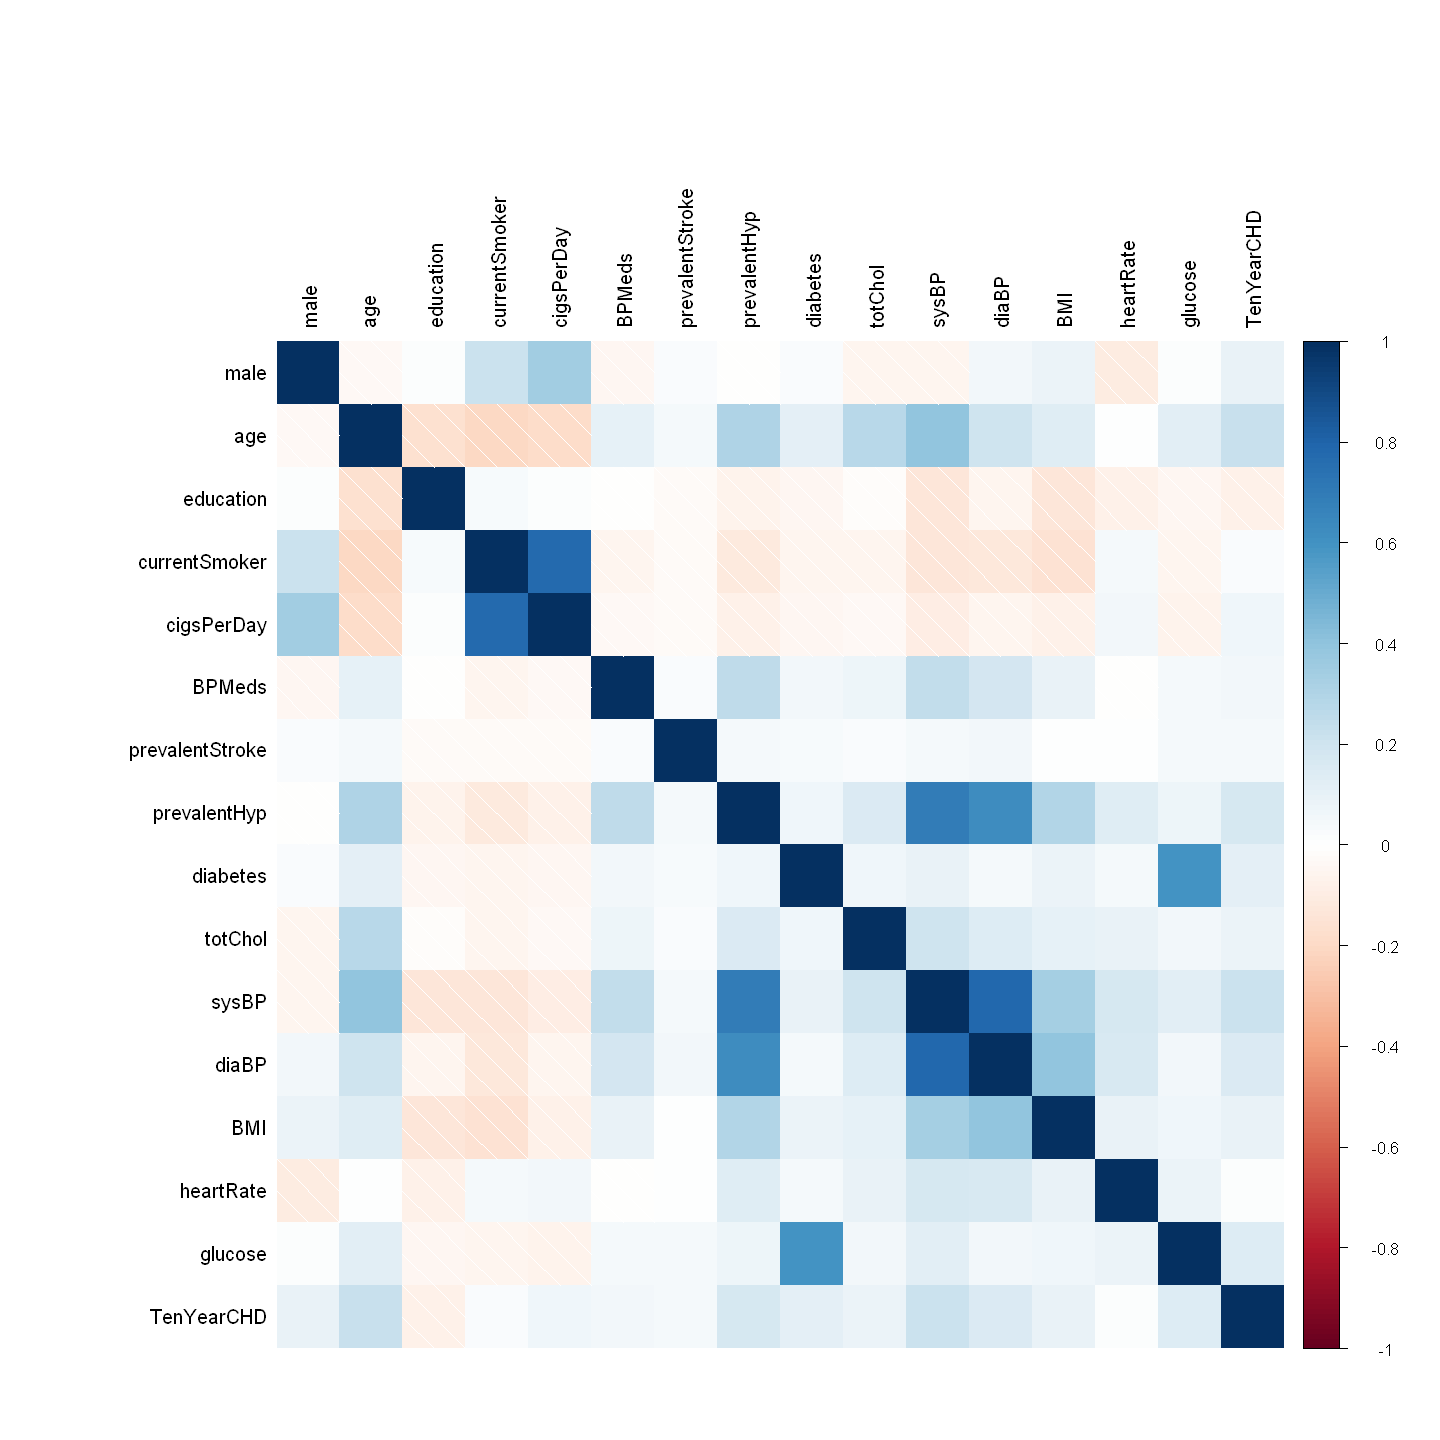

In [21]:
# corrm <- rcorr(as.matrix(fram))$r

# options(repr.plot.width = 12, repr.plot.height = 12)
# corrplot(corrm, tl.col="black", method="shade")

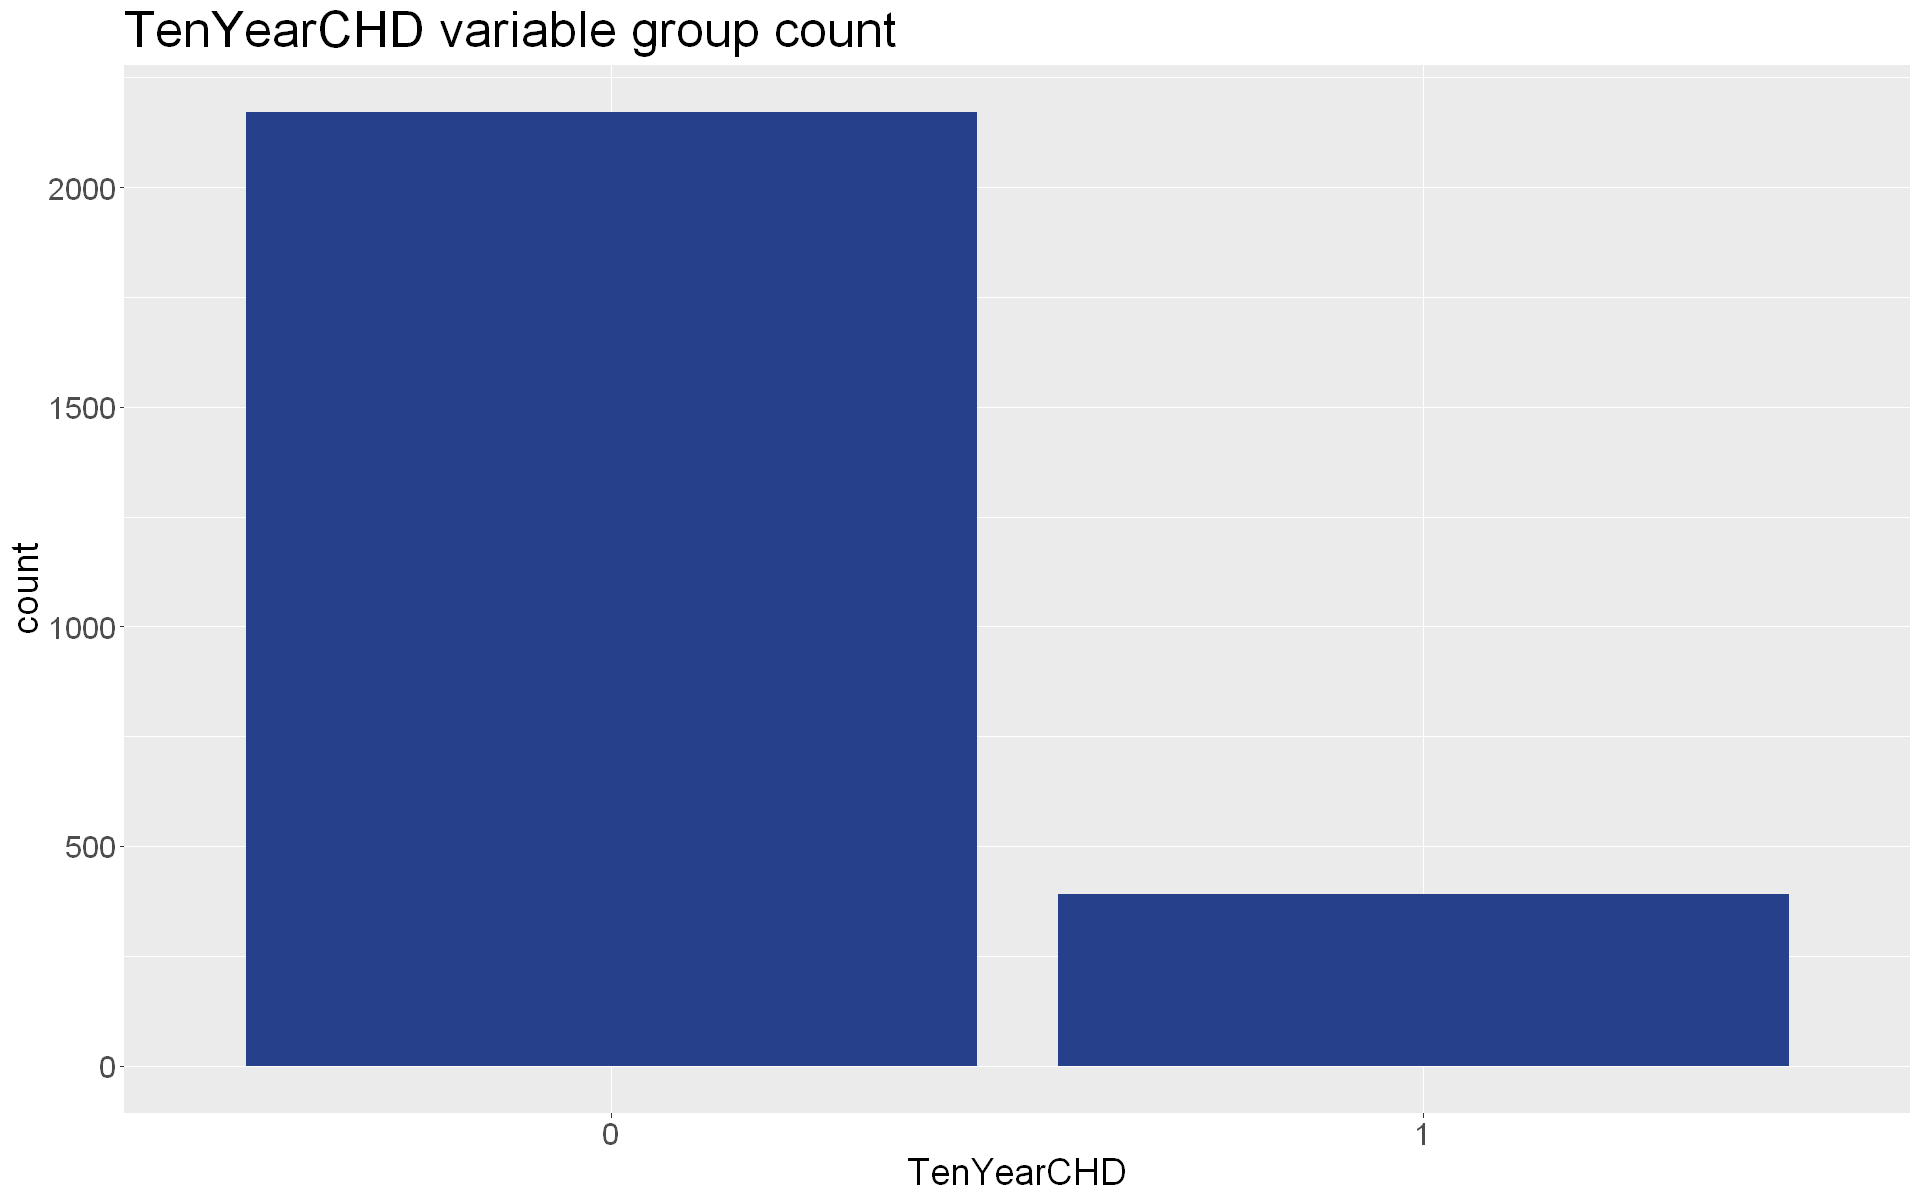

In [8]:
options(repr.plot.width = 16, repr.plot.height = 10)

ggplot(fram, aes(x=TenYearCHD)) +
    geom_bar(fill="royalblue4") +
    ggtitle("TenYearCHD variable group count") +
    theme(
        plot.title = element_text(size = 30),
        axis.title = element_text(size = 22),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18)
        )

### Data deletion

In [14]:
column_names <- names(fram)
column_indices <- 1:length(column_names)

column_info <- data.frame(
  ColumnName = column_names,
  ColumnIndex = column_indices)

column_info

ColumnName,ColumnIndex
<chr>,<int>
male,1
age,2
education,3
currentSmoker,4
cigsPerDay,5
BPMeds,6
prevalentStroke,7
prevalentHyp,8
diabetes,9


#### MCAR

used method - MCAR1unifo - for each feature missing positions are determined by n Bernoulli trials

Data are missing in 5 columns selected randomly from all columns except male, age and TenYearCHD

In [10]:
sample(x=seq(3, 15), size=5, replace=FALSE)

[1] 12  9 11 14 15

In [23]:
fram_mcar <- delete_MCAR(ds=fram, p=round(runif(n=5, min=0.1, max=0.3), 2),
                        cols_mis=c(9, 11, 12, 14, 15), n_mis_stochastic=FALSE)

In [24]:
write.csv(fram_mcar, file = "fram_mcar.csv", row.names = FALSE)

#### MAR

totChol, BMI, glucose - MAR1unifo - elements of missing features corresponding to the lowest values of the determining feature are deleted (depending on age, male, education)

cigsPerDay, heartRate - MAR1unifo with where=upper - elements of missing features corresponding to the highest values of the determining feature are deleted (depending on age, male)

In [25]:
fram_mar <- delete_MAR_censoring(ds=fram, p=round(runif(n=3, min=0.1, max=0.3), 2),
                        cols_mis=c(10, 13, 15), cols_ctrl=c(2, 1, 3))

In [26]:
fram_mar <- delete_MAR_censoring(ds=fram_mar, p=round(runif(n=2, min=0.1, max=0.3), 2), 
                                 cols_mis=c(5, 14), cols_ctrl=c(2, 1), where="upper")

In [27]:
write.csv(fram_mar, file = "fram_mar.csv", row.names = FALSE)

#### MNAR

cigsPerDay - MNAR2univa - the highest values of missing feature are set to missing until the desired MR is reached

sysBP, diaBP, diabetes - MNAR1unifo - the lowest values of each missing feature are found and deleted

currentSmoker - first I will delete from remaining 4 columns, then I will randomly sample from indices where cigsPerDay is missing

In [28]:
fram_mnar <- delete_MNAR_censoring(ds=fram, p=round(runif(n=1, min=0.1, max=0.3), 2), 
                                 cols_mis=c(5), where="upper")

In [29]:
fram_mnar <- delete_MNAR_censoring(ds=fram_mnar, p=round(runif(n=3, min=0.1, max=0.3), 2), 
                                 cols_mis=c(9, 11, 12))

In [30]:
CPDmiss <- which(is.na(fram_mnar$cigsPerDay))
CSmiss <- sample(x=CPDmiss, size=as.integer(0.4*length(CPDmiss)), replace=FALSE)
fram_mnar$currentSmoker[CSmiss] <- NA

In [31]:
write.csv(fram_mnar, file = "fram_mnar.csv", row.names = FALSE)

#### MNAR 2

diaBP - MNAR2univa - the highest values of missing feature are set to missing until the desired MR is reached

diabetes - MNAR1unifo - the lowest values of each missing feature are found and deleted

In [32]:
fram_mnar2 <- delete_MNAR_censoring(ds=fram, p=round(runif(n=1, min=0.1, max=0.3), 2), 
                                 cols_mis=c(12), where="upper")

In [33]:
fram_mnar2 <- delete_MNAR_censoring(ds=fram_mnar2, p=round(runif(n=1, min=0.1, max=0.3), 2), 
                                 cols_mis=c(9))

In [34]:
write.csv(fram_mnar2, file = "fram_mnar2.csv", row.names = FALSE)

### Functions definitions

In [7]:
missMAR <- function(data, dependent, explanatory) {
    #' Compute Fisher"s independence test for missing variable across explanatory variables.
    
    dep_miss <- paste(dependent, "miss", sep="_")
    data[[dep_miss]] <- ifelse(is.na(data[[dependent]]), "Missing", "Not Missing")
    MD <- paste("Missing dependence:", dependent)
    fisher_res <- data.frame(x=character(0), y=numeric(0))
    colnames(fisher_res) <- c(MD, "p-value")
    
    for (i in 1:length(explanatory)) {
        
        expl <- explanatory[i]
        contingency_tab <- with(data, table(data[[expl]], data[[dep_miss]]))
        pval <- round(fisher.test(contingency_tab, simulate.p.value=TRUE)$p.value, 2)
        new_row <- data.frame(x=expl, y=pval)
        colnames(new_row) <- c(MD, "p-value")
        fisher_res <- bind_rows(fisher_res, new_row)
    }

    data <- data[, !(names(data) %in% c(dep_miss))]
    
    return (fisher_res)
}

In [8]:
missPlotCont <- function(data, miss_var, x_var, y_var, title) {
        #' Missingness plot for continuous miss var.

        ggplot(data, aes(x = !!as.name(x_var), y = !!as.name(y_var), colour = !!as.name(miss_var))) +
        geom_point(data = data[data[[miss_var]] == "Not Missing", ], size = 4) +
        geom_point(data = data[data[[miss_var]] == "Missing", ], size = 6) +
        scale_colour_manual(values = c("steelblue1", "royalblue4")) +
        ggtitle(title) +
        theme(
        plot.title = element_text(size = 30),
        axis.title = element_text(size = 22),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18),
        legend.text = element_text(size = 16),        
        legend.title = element_text(size = 18)
        )
}

In [9]:
missPlotCat <- function(data, miss_var, y_var, wrap_var, title, n_col) {
    #' Missingness plot for continuous miss var.

    p <- ggplot(data, aes(x = "", y = !!as.name(y_var), fill = !!as.name(miss_var))) +
        geom_bar(stat = "identity", width=1) +
        coord_polar("y", start=0) +
        scale_fill_manual(values = c("steelblue1", "royalblue4")) +
        ggtitle(title) +
        theme(
            plot.title = element_text(size = 30),
            axis.title = element_blank(),         
            axis.text.x = element_blank(),        
            axis.text.y = element_blank(),
            legend.text = element_text(size = 16),        
            legend.title = element_text(size = 18),
            strip.text = element_text(size = 22),
            panel.grid.major = element_blank(),
            panel.grid.minor = element_blank()
            )

    p + facet_wrap(~ get(wrap_var), ncol = n_col)

}

### Missing data examination

In [10]:
fram_mcar <- read.csv("fram_mcar.csv")
fram_mar <- read.csv("fram_mar.csv")
fram_mnar <- read.csv("fram_mnar.csv")
fram_mnar2 <- read.csv("fram_mnar2.csv")

#### MCAR

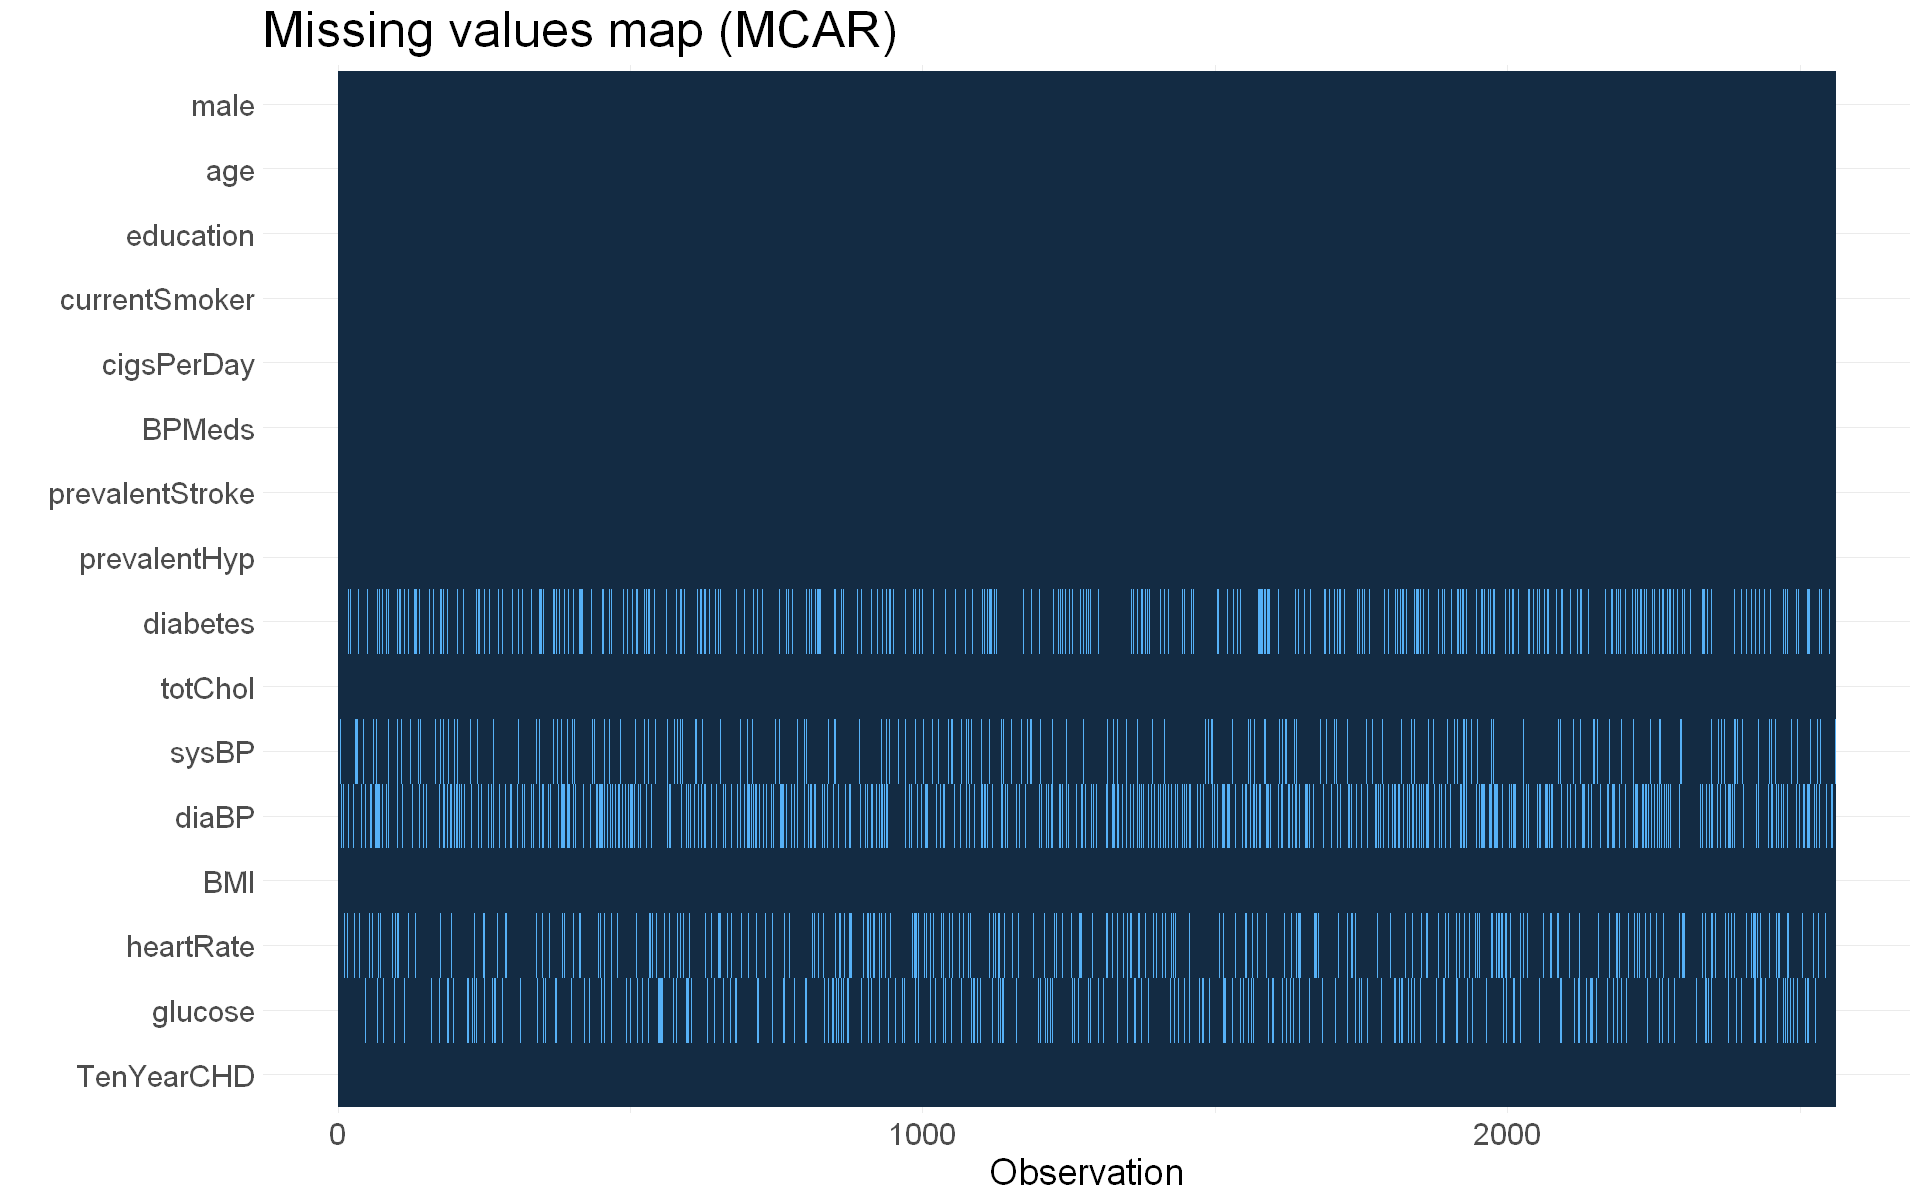

In [40]:
options(repr.plot.width = 16, repr.plot.height = 10)

mcar_plot <- fram_mcar %>% missing_plot()

mcar_plot <- mcar_plot +
    theme(
        plot.title = element_text(size = 30),         
        axis.title = element_text(size = 22),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18)) +
    labs(title = "Missing values map (MCAR)")
 
mcar_plot

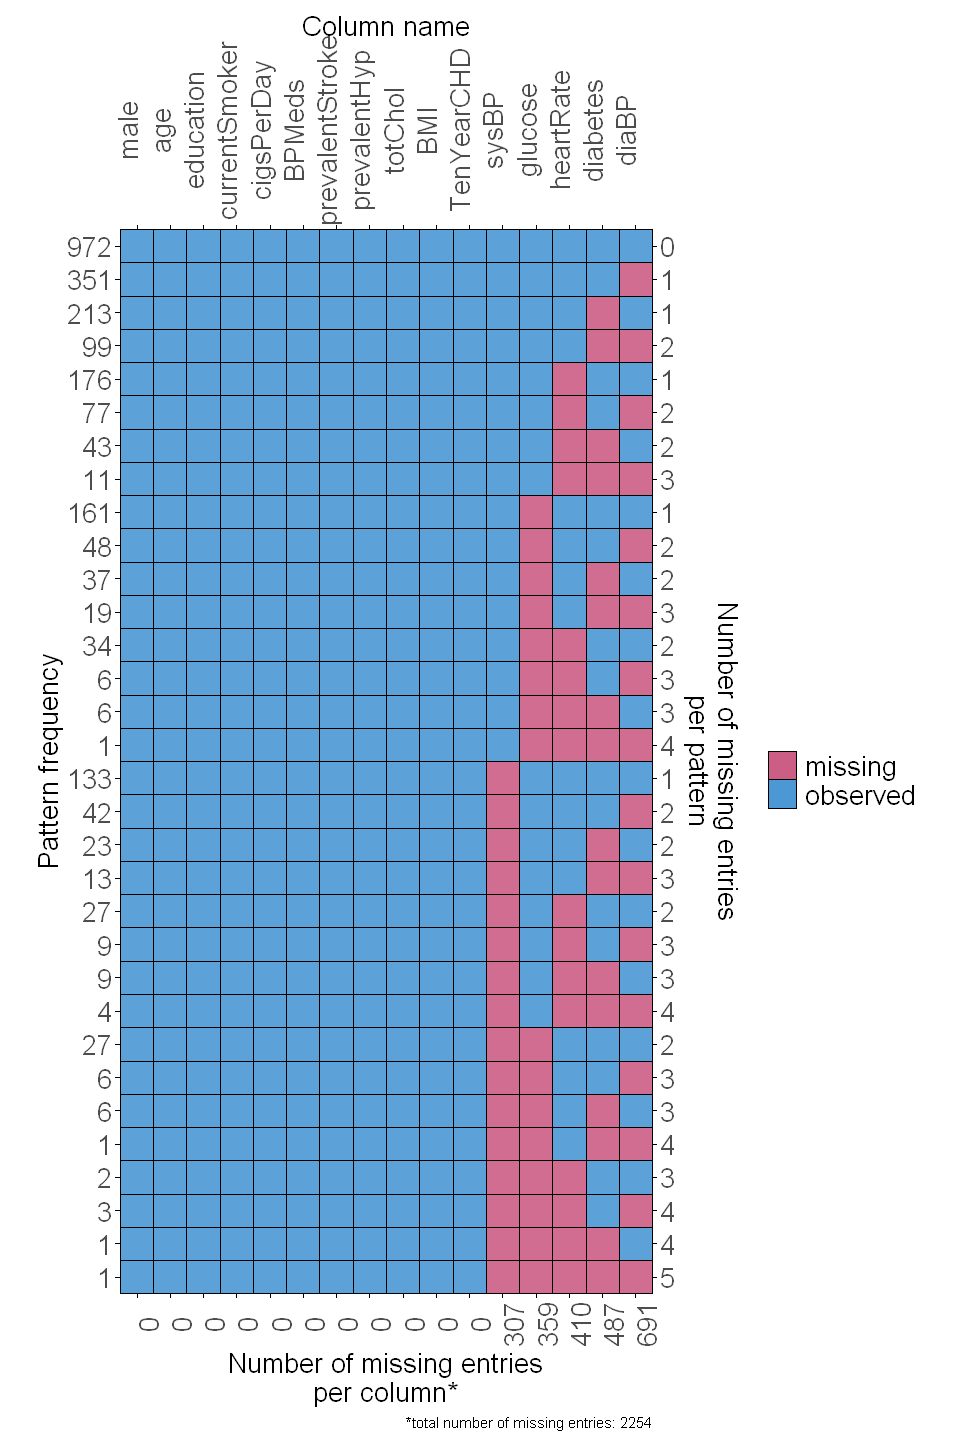

In [35]:
options(repr.plot.width = 8, repr.plot.height = 12)
plot_pattern(fram_mcar, rotate = TRUE) +
        theme(
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 16),         
        axis.text.x = element_text(size = 16),        
        axis.text.y = element_text(size = 16),
        legend.text = element_text(size = 16),        
        legend.title = element_text(size = 16),
        legend.position = "right"
        )

Check if any missingness is MAR

In [42]:
dependent <- "diabetes"
explanatory <- setdiff(colnames(fram_mcar), dependent)
missMAR(fram_mcar, dependent, explanatory)

Missing dependence: diabetes,p-value
<chr>,<dbl>
male,0.84
age,0.04
education,0.86
currentSmoker,0.45
cigsPerDay,0.29
BPMeds,0.65
prevalentStroke,0.22
prevalentHyp,0.51
totChol,0.08


In [43]:
dependent <- "sysBP"
explanatory <- setdiff(colnames(fram_mcar), dependent)
missMAR(fram_mcar, dependent, explanatory)

Missing dependence: sysBP,p-value
<chr>,<dbl>
male,0.58
age,0.07
education,0.91
currentSmoker,0.30
cigsPerDay,0.09
BPMeds,0.86
prevalentStroke,1.00
prevalentHyp,0.47
diabetes,0.66


In [44]:
dependent <- "diaBP"
explanatory <- setdiff(colnames(fram_mcar), dependent)
missMAR(fram_mcar, dependent, explanatory)

Missing dependence: diaBP,p-value
<chr>,<dbl>
male,0.82
age,0.82
education,0.49
currentSmoker,0.82
cigsPerDay,0.87
BPMeds,1.00
prevalentStroke,0.47
prevalentHyp,1.00
diabetes,0.41


In [45]:
dependent <- "heartRate"
explanatory <- setdiff(colnames(fram_mcar), dependent)
missMAR(fram_mcar, dependent, explanatory)

Missing dependence: heartRate,p-value
<chr>,<dbl>
male,0.28
age,0.98
education,0.50
currentSmoker,0.71
cigsPerDay,0.75
BPMeds,0.15
prevalentStroke,0.38
prevalentHyp,0.13
diabetes,0.33


In [46]:
dependent <- "glucose"
explanatory <- setdiff(colnames(fram_mcar), dependent)
missMAR(fram_mcar, dependent, explanatory)

Missing dependence: glucose,p-value
<chr>,<dbl>
male,0.14
age,0.47
education,0.73
currentSmoker,0.21
cigsPerDay,0.77
BPMeds,0.23
prevalentStroke,0.64
prevalentHyp,0.62
diabetes,0.84


Seems like we have MCAR everywhere, except for diabetes + age

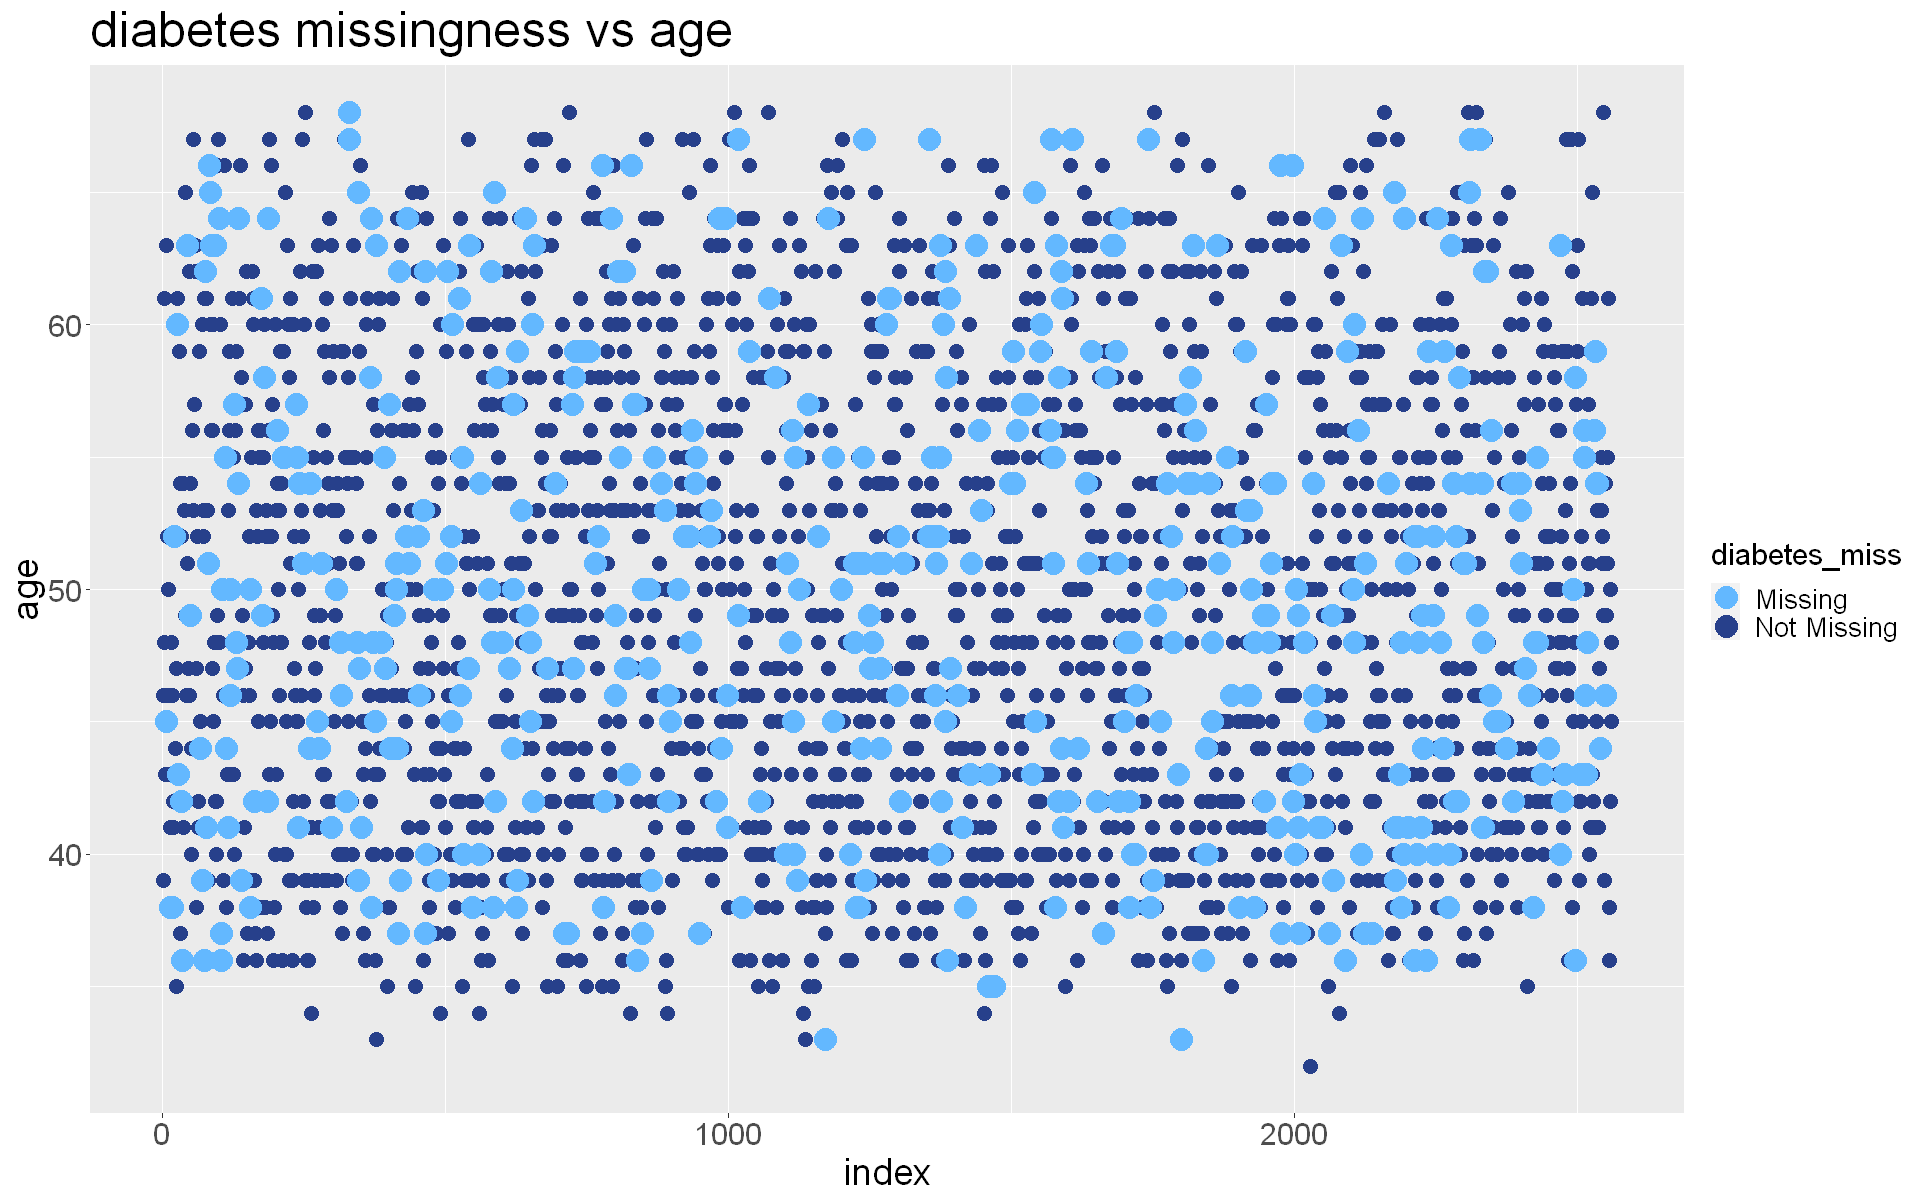

In [48]:
options(repr.plot.width = 16, repr.plot.height = 10)

fram_mcar$diabetes_miss <- ifelse(is.na(fram_mcar$diabetes), "Missing", "Not Missing")
fram_mcar$index <- as.numeric(row.names(fram_mar))

missPlotCont(fram_mcar, "diabetes_miss", "index", "age", "diabetes missingness vs age")

#### MAR

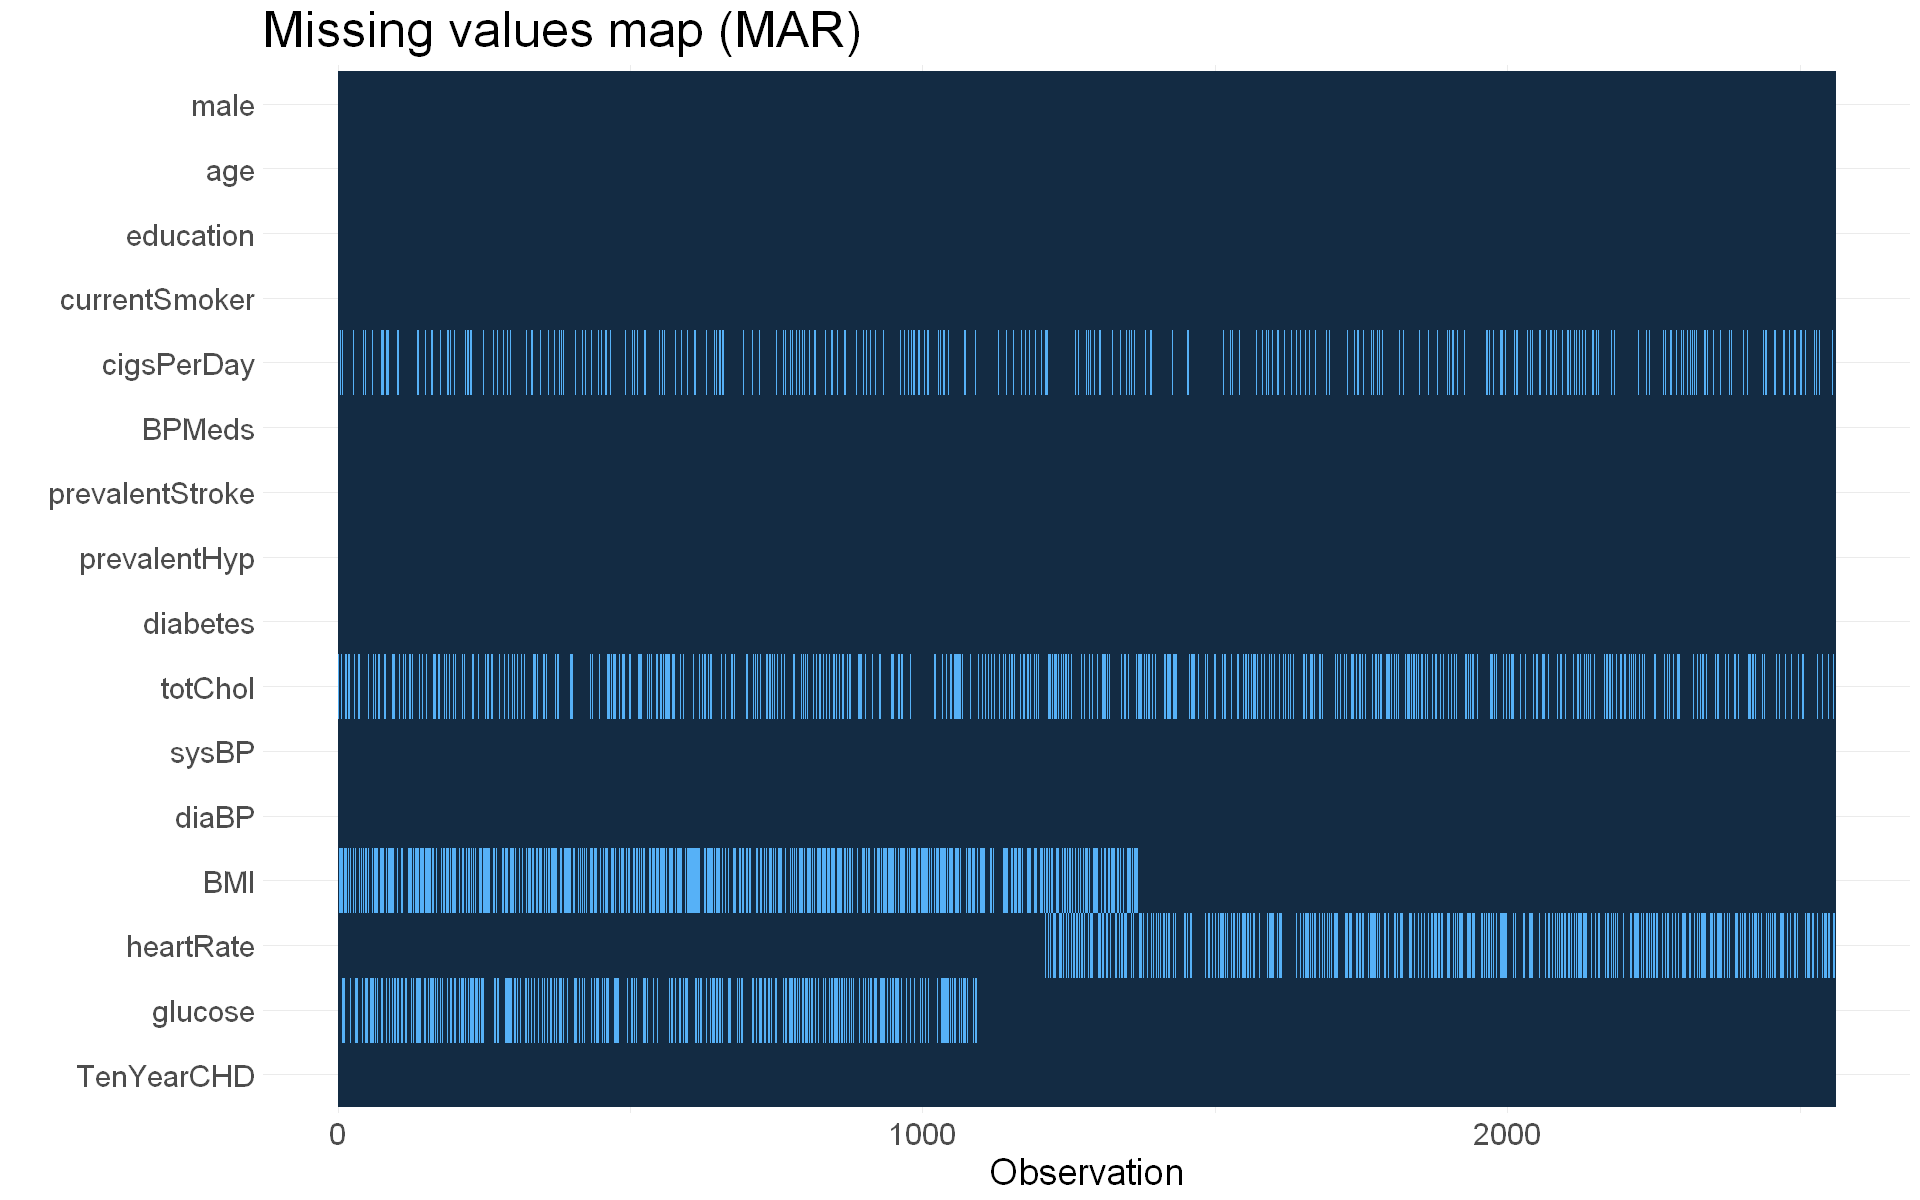

In [49]:
options(repr.plot.width = 16, repr.plot.height = 10)

mar_plot <- fram_mar %>% missing_plot()

mar_plot <- mar_plot +
    theme(
        plot.title = element_text(size = 30),         
        axis.title = element_text(size = 22),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18)) +
    labs(title = "Missing values map (MAR)")
 
mar_plot

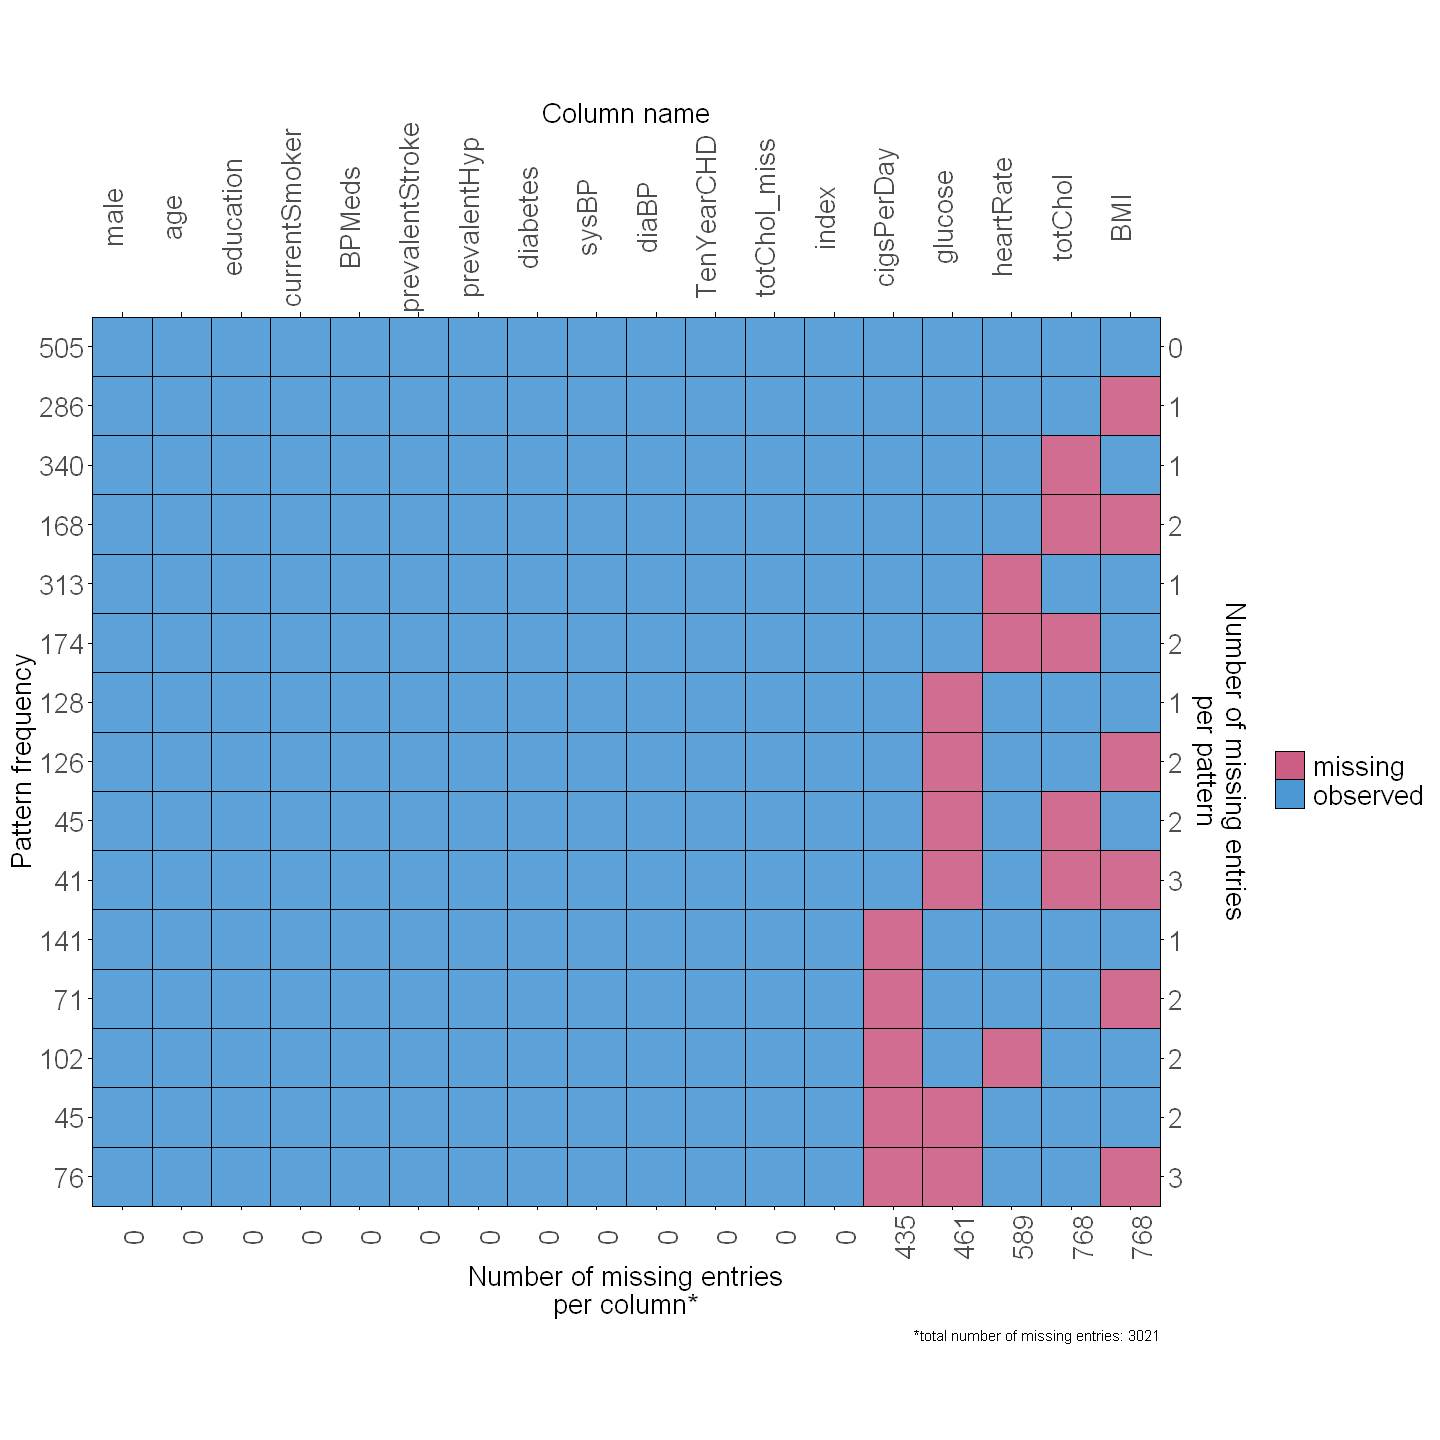

In [36]:
options(repr.plot.width = 12, repr.plot.height = 12)
options(repr.plot.width = 12, repr.plot.height = 12)
plot_pattern(fram_mar, rotate = TRUE) +
        theme(
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 16),         
        axis.text.x = element_text(size = 16),        
        axis.text.y = element_text(size = 16),
        legend.text = element_text(size = 16),        
        legend.title = element_text(size = 16),
        legend.position = "right"
        )

In [51]:
dependent <- "cigsPerDay"
explanatory <- setdiff(colnames(fram_mar), dependent)
missMAR(fram_mar, dependent, explanatory)

Missing dependence: cigsPerDay,p-value
<chr>,<dbl>
male,0.24
age,0.00
education,0.00
currentSmoker,0.00
BPMeds,0.00
prevalentStroke,0.39
prevalentHyp,0.00
diabetes,0.00
totChol,0.01


In [52]:
dependent <- "totChol"
explanatory <- setdiff(colnames(fram_mar), dependent)
missMAR(fram_mar, dependent, explanatory)

Missing dependence: totChol,p-value
<chr>,<dbl>
male,0.39
age,0.00
education,0.00
currentSmoker,0.00
cigsPerDay,0.00
BPMeds,0.00
prevalentStroke,0.30
prevalentHyp,0.00
diabetes,0.00


In [53]:
dependent <- "BMI"
explanatory <- setdiff(colnames(fram_mar), dependent)
missMAR(fram_mar, dependent, explanatory)

Missing dependence: BMI,p-value
<chr>,<dbl>
male,0.00
age,0.01
education,0.00
currentSmoker,0.00
cigsPerDay,0.00
BPMeds,0.44
prevalentStroke,0.73
prevalentHyp,0.78
diabetes,0.57


In [54]:
dependent <- "heartRate"
explanatory <- setdiff(colnames(fram_mar), dependent)
missMAR(fram_mar, dependent, explanatory)

Missing dependence: heartRate,p-value
<chr>,<dbl>
male,0.00
age,0.71
education,0.00
currentSmoker,0.00
cigsPerDay,0.00
BPMeds,0.89
prevalentStroke,0.25
prevalentHyp,0.65
diabetes,0.22


In [55]:
dependent <- "glucose"
explanatory <- setdiff(colnames(fram_mar), dependent)
missMAR(fram_mar, dependent, explanatory)

Missing dependence: glucose,p-value
<chr>,<dbl>
male,0.12
age,0.00
education,0.00
currentSmoker,0.44
cigsPerDay,0.94
BPMeds,0.28
prevalentStroke,0.70
prevalentHyp,0.00
diabetes,0.31


Visualising all pairs with pvalue < 0.05

`summarise()` has grouped output by 'education'. You can override using the
`.groups` argument.


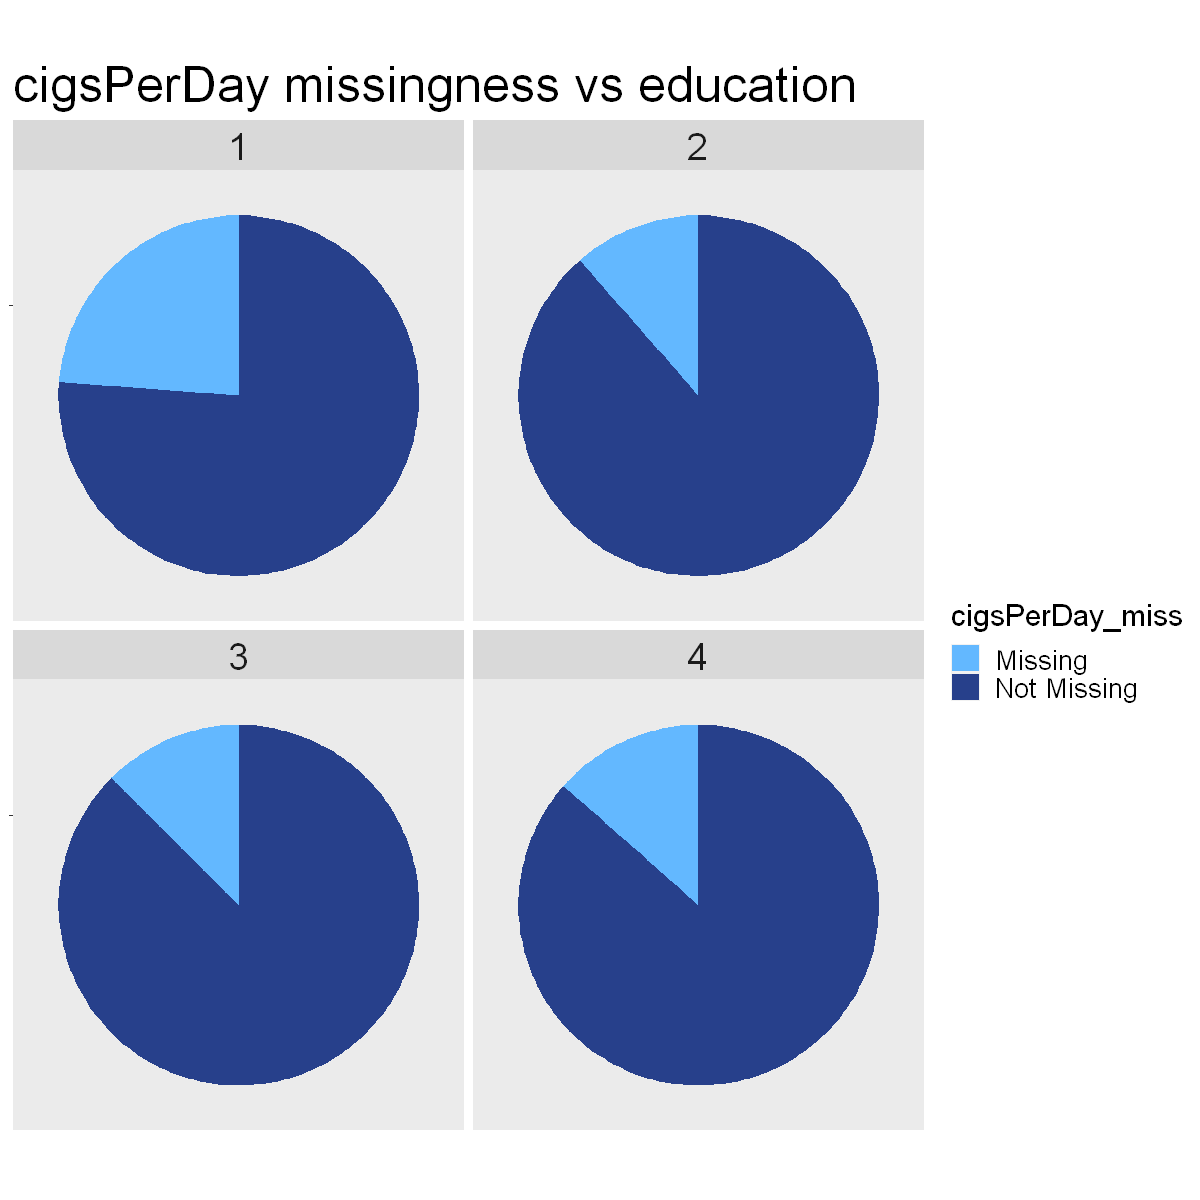

In [56]:
options(repr.plot.width = 10, repr.plot.height = 10)

fram_mar$cigsPerDay_miss <- ifelse(is.na(fram_mar$cigsPerDay), "Missing", "Not Missing")

edu_freq <- fram_mar %>%
    group_by(education, cigsPerDay_miss) %>%
    summarize(count = n()) %>%
    mutate(freq = count/sum(count))

missPlotCat(edu_freq, "cigsPerDay_miss", "freq", "education", "cigsPerDay missingness vs education", 2)

`summarise()` has grouped output by 'currentSmoker'. You can override using the
`.groups` argument.


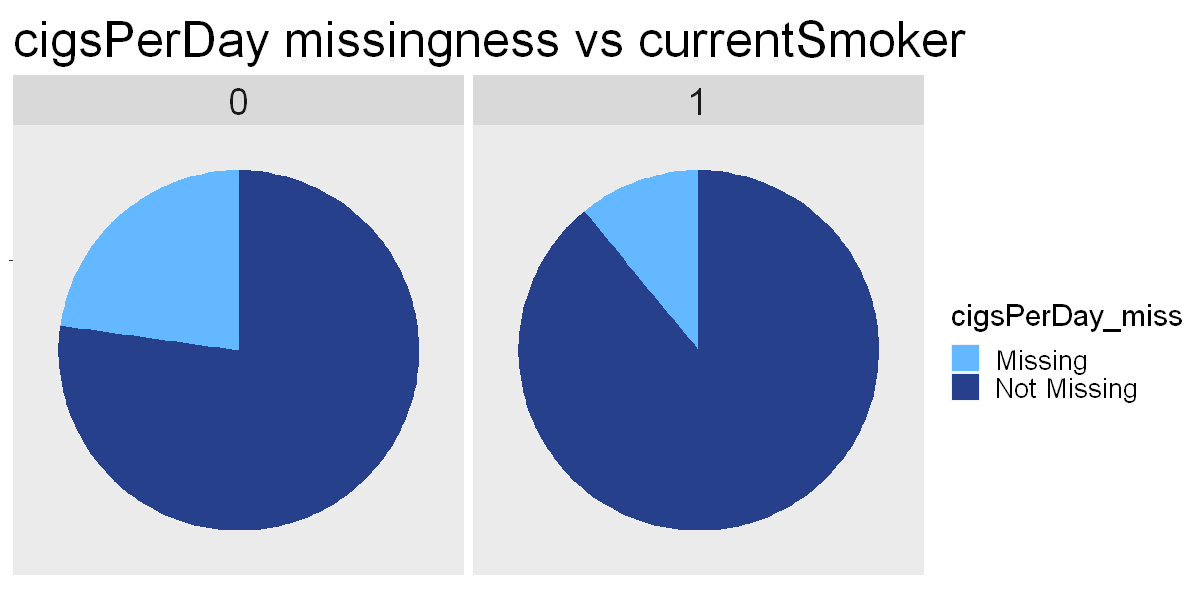

In [57]:
options(repr.plot.width = 10, repr.plot.height = 5)

cs_freq <- fram_mar %>%
    group_by(currentSmoker, cigsPerDay_miss) %>%
    summarize(count = n()) %>%
    mutate(freq = count/sum(count))

missPlotCat(cs_freq, "cigsPerDay_miss", "freq", "currentSmoker", "cigsPerDay missingness vs currentSmoker", 2)

`summarise()` has grouped output by 'BPMeds'. You can override using the
`.groups` argument.


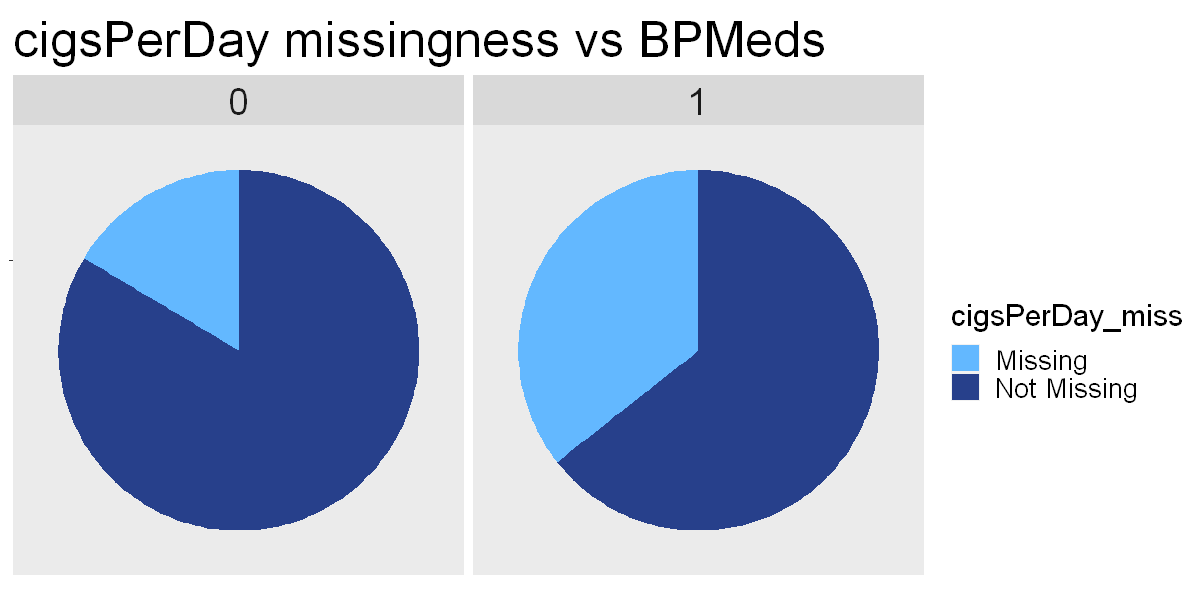

In [58]:
options(repr.plot.width = 10, repr.plot.height = 5)

bp_freq <- fram_mar %>%
    group_by(BPMeds, cigsPerDay_miss) %>%
    summarize(count = n()) %>%
    mutate(freq = count/sum(count))

missPlotCat(bp_freq, "cigsPerDay_miss", "freq", "BPMeds", "cigsPerDay missingness vs BPMeds", 2)

`summarise()` has grouped output by 'prevalentHyp'. You can override using the
`.groups` argument.


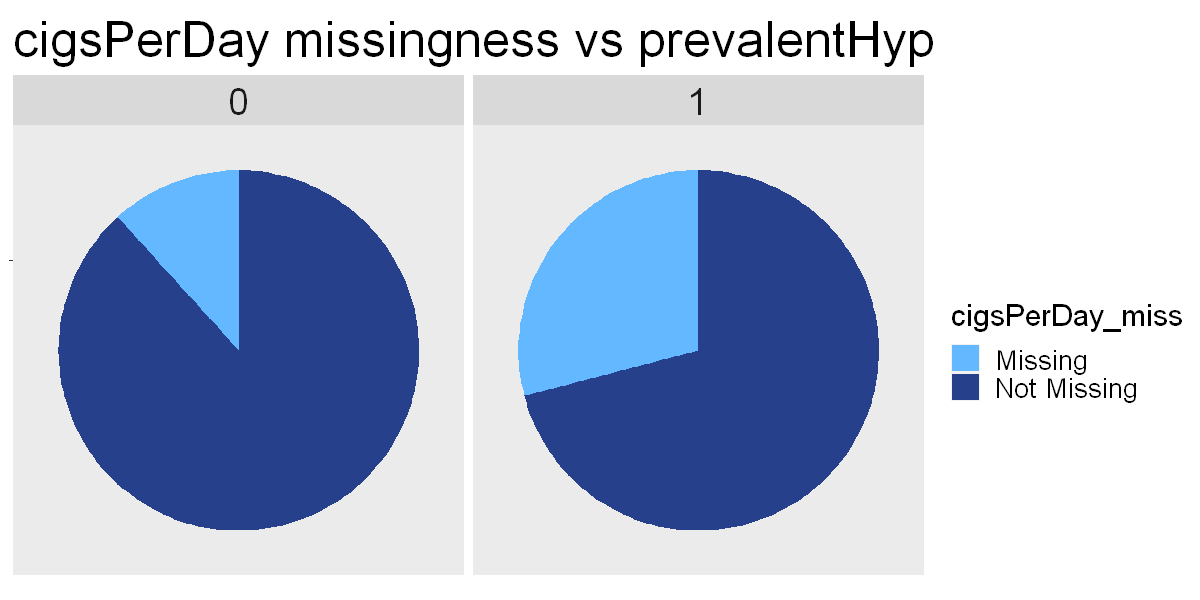

In [59]:
`options(repr.plot.width = 10, repr.plot.height = 5)

ph_freq <- fram_mar %>%
    group_by(prevalentHyp, cigsPerDay_miss) %>%
    summarize(count = n()) %>%
    mutate(freq = count/sum(count))

missPlotCat(ph_freq, "cigsPerDay_miss", "freq", "prevalentHyp", "cigsPerDay missingness vs prevalentHyp", 2)

`summarise()` has grouped output by 'diabetes'. You can override using the
`.groups` argument.


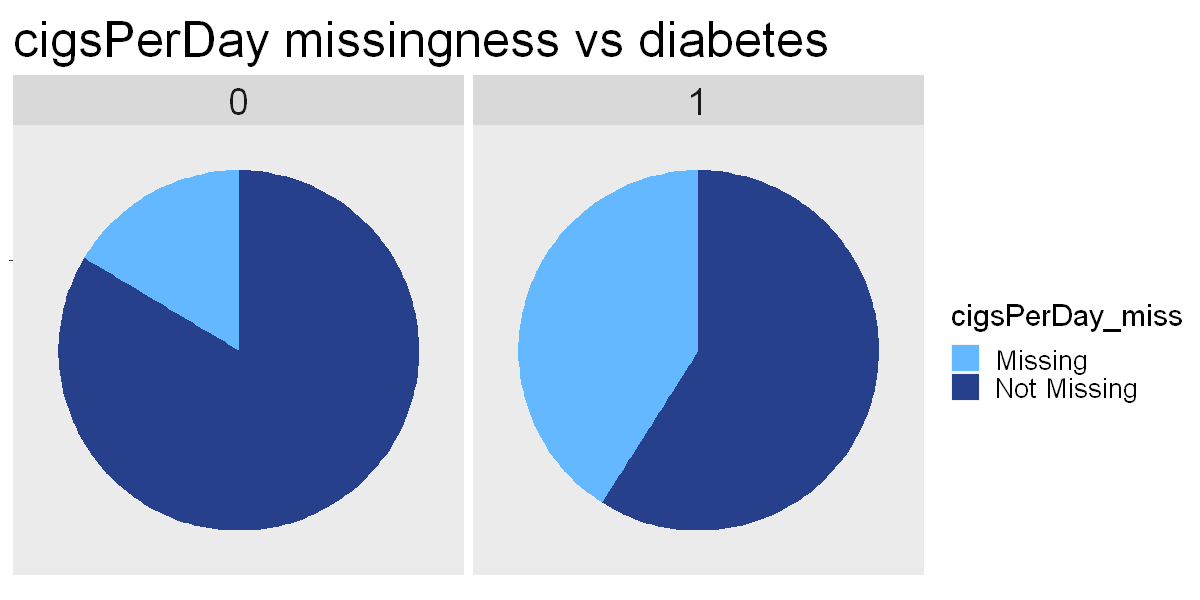

In [60]:
options(repr.plot.width = 10, repr.plot.height = 5)

diab_freq <- fram_mar %>%
    group_by(diabetes, cigsPerDay_miss) %>%
    summarize(count = n()) %>%
    mutate(freq = count/sum(count))

missPlotCat(diab_freq, "cigsPerDay_miss", "freq", "diabetes", "cigsPerDay missingness vs diabetes", 2)

Warning message:
"Removed 768 rows containing missing values (`geom_point()`)."


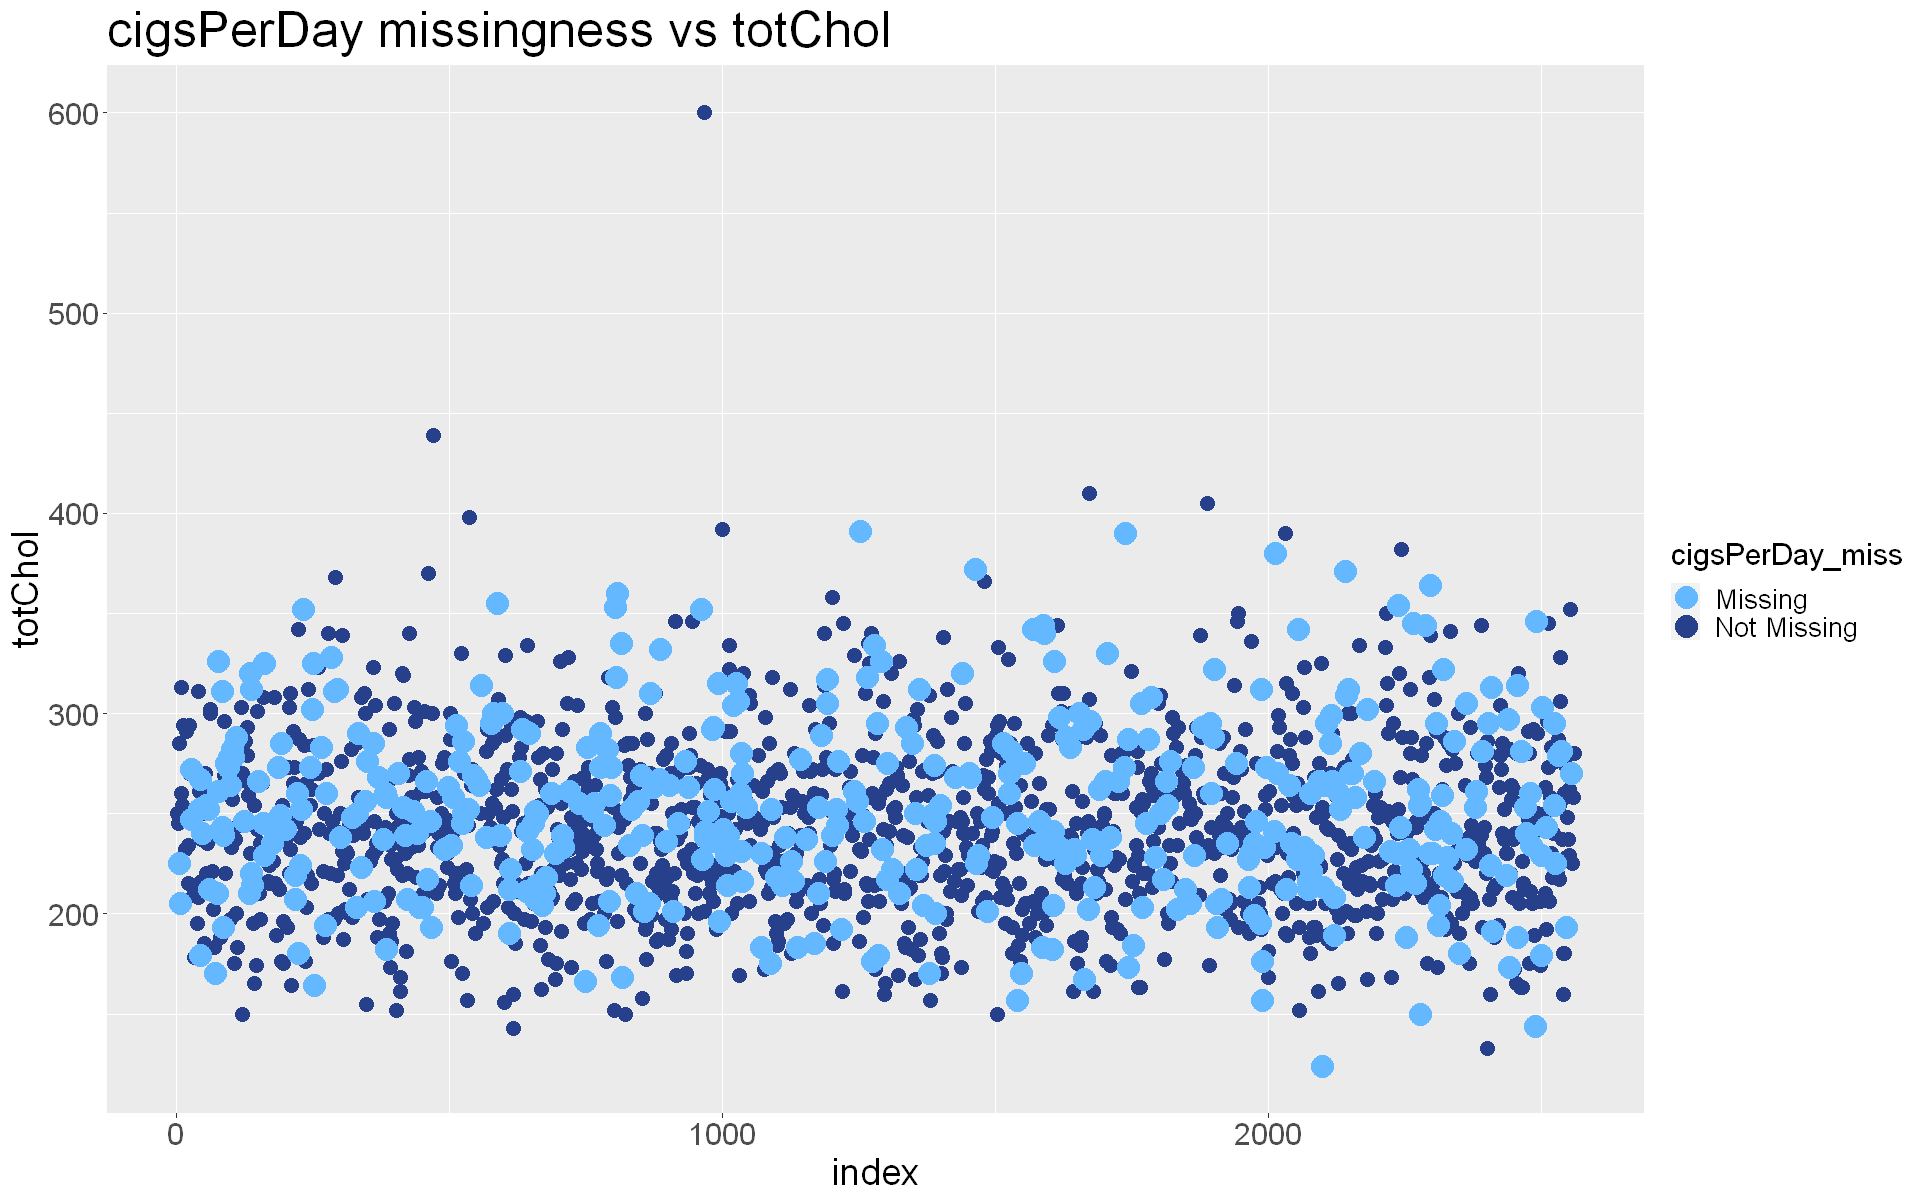

In [61]:
options(repr.plot.width = 16, repr.plot.height = 10)

fram_mar$index <- as.numeric(row.names(fram_mar))
missPlotCont(fram_mar, "cigsPerDay_miss", "index", "totChol", "cigsPerDay missingness vs totChol")

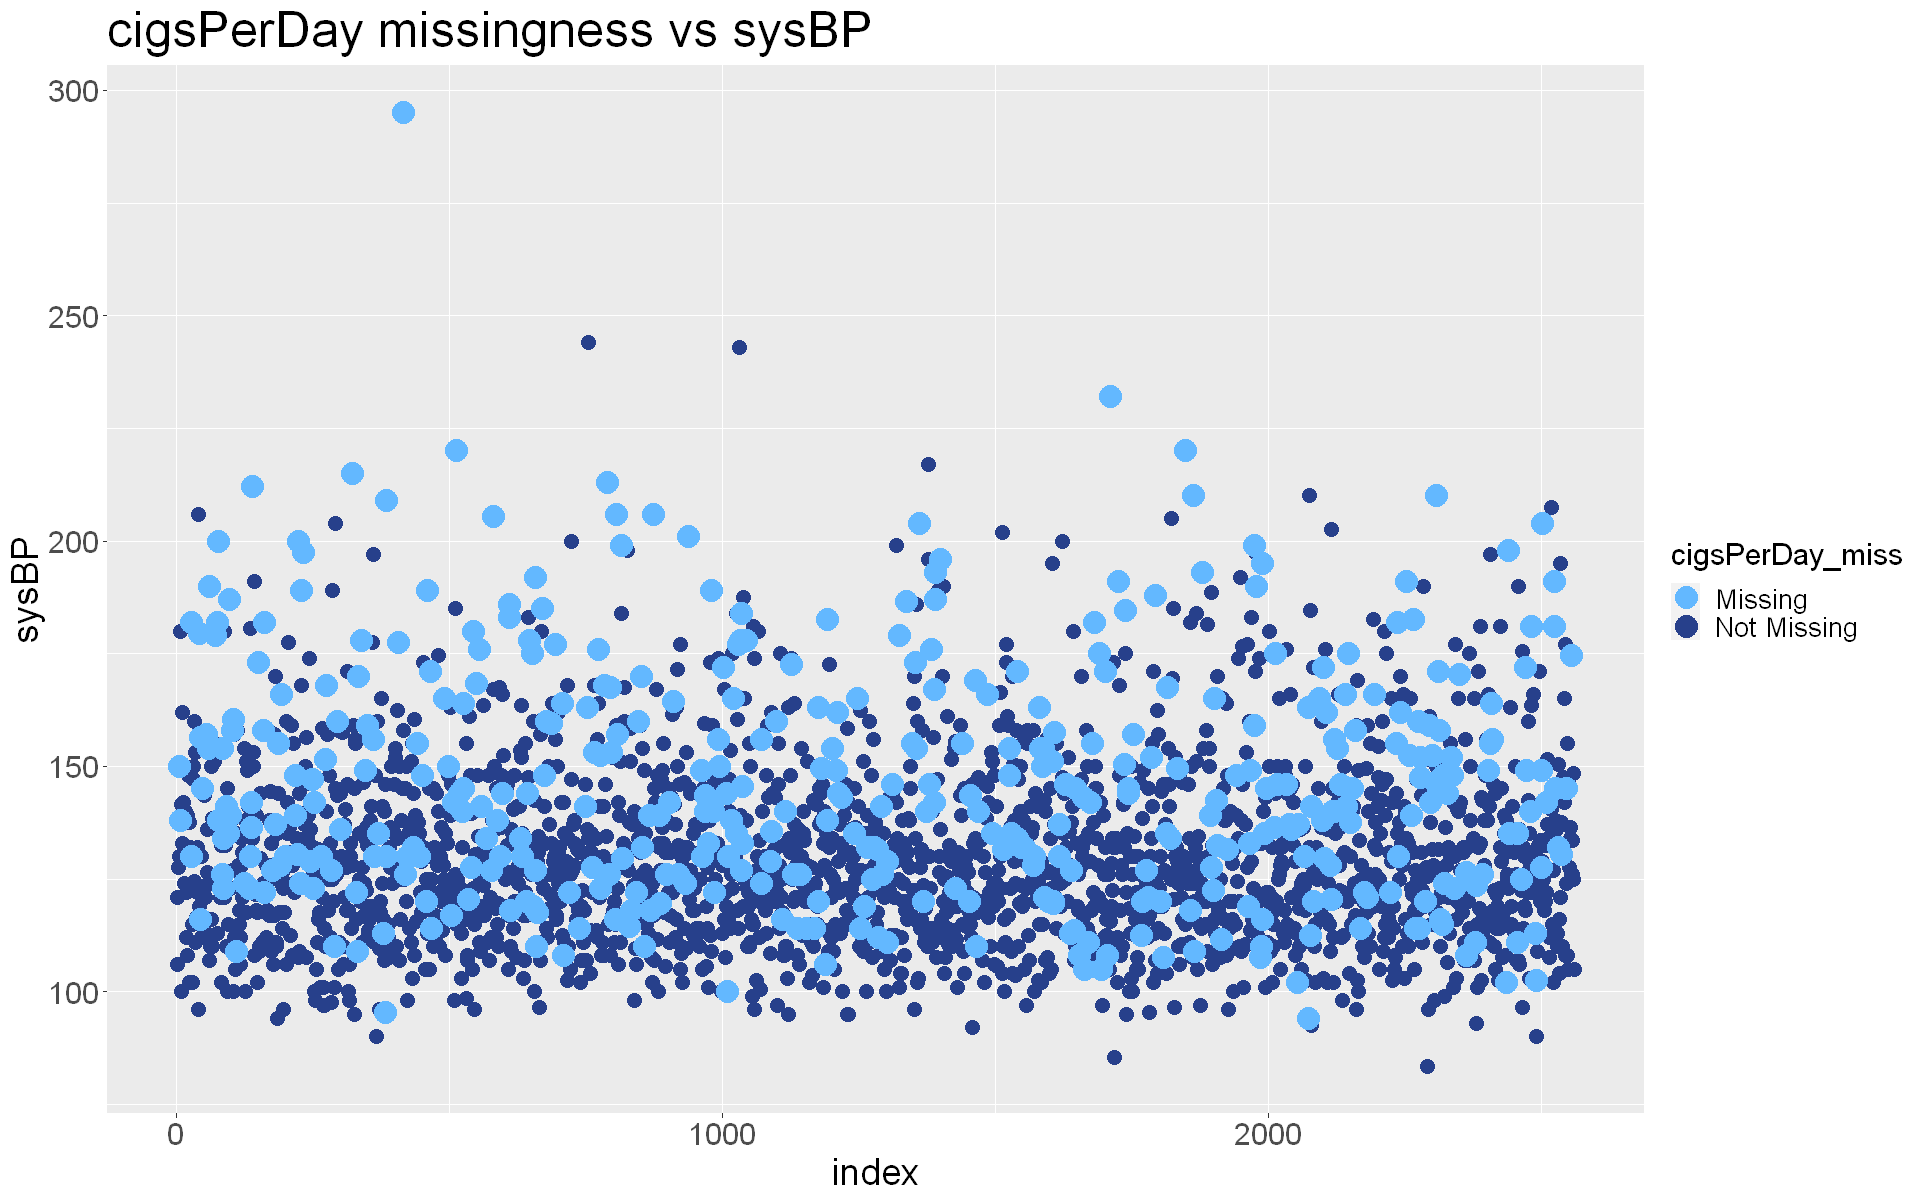

In [62]:
options(repr.plot.width = 16, repr.plot.height = 10)

missPlotCont(fram_mar, "cigsPerDay_miss", "index", "sysBP", "cigsPerDay missingness vs sysBP")

Warning message:
"Removed 340 rows containing missing values (`geom_point()`)."


Warning message:
"Removed 121 rows containing missing values (`geom_point()`)."


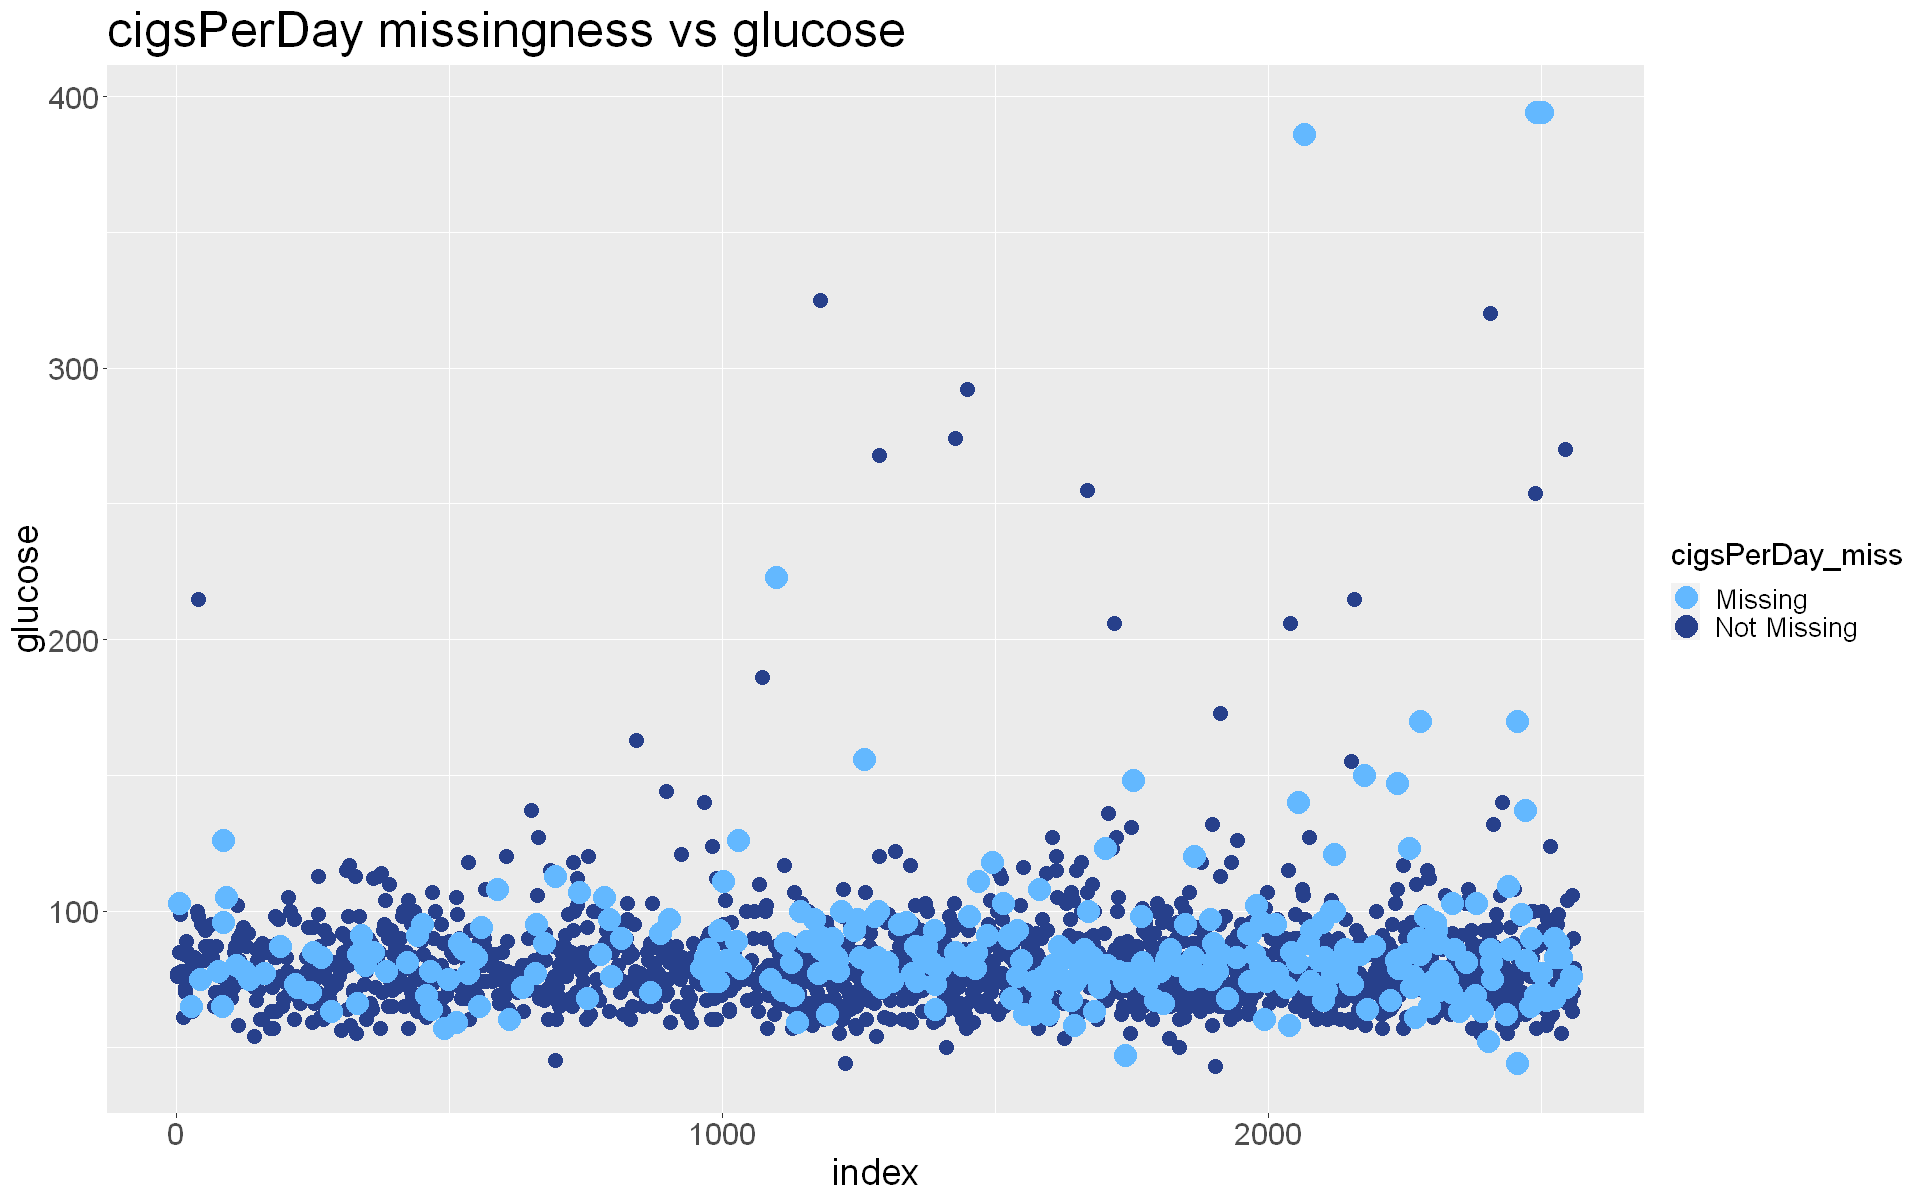

In [63]:
missPlotCont(fram_mar, "cigsPerDay_miss", "index", "glucose", "cigsPerDay missingness vs glucose")

`summarise()` has grouped output by 'TenYearCHD'. You can override using the
`.groups` argument.


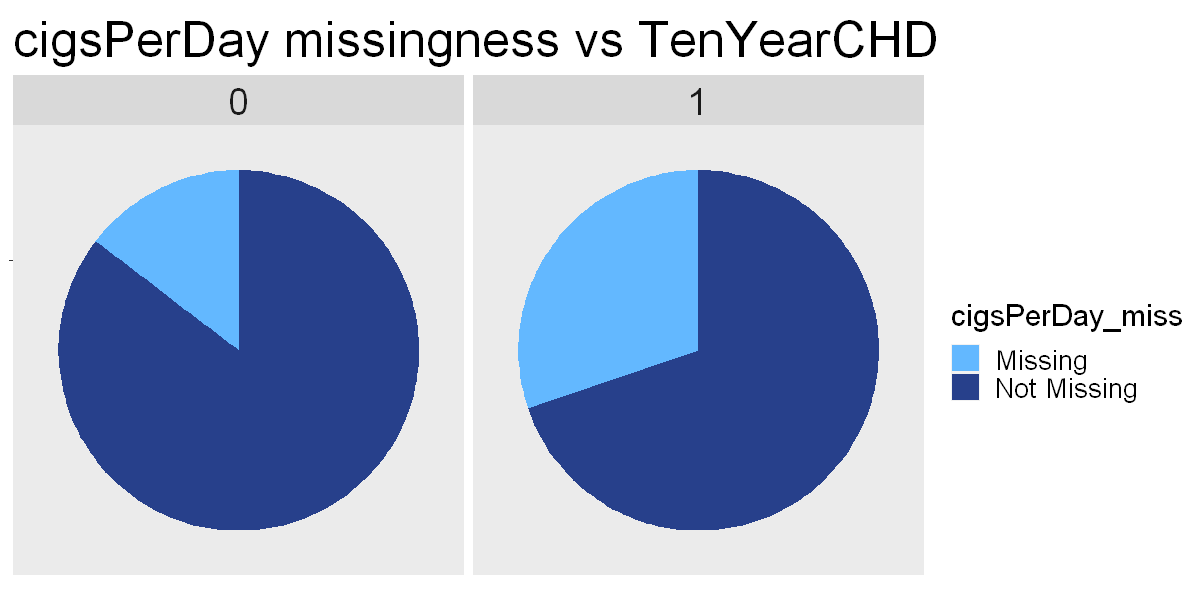

In [64]:
options(repr.plot.width = 10, repr.plot.height = 5)

chd_freq <- fram_mar %>%
    group_by(TenYearCHD, cigsPerDay_miss) %>%
    summarize(count = n()) %>%
    mutate(freq = count/sum(count))

missPlotCat(chd_freq, "cigsPerDay_miss", "freq", "TenYearCHD", "cigsPerDay missingness vs TenYearCHD", 2)

`summarise()` has grouped output by 'education'. You can override using the
`.groups` argument.


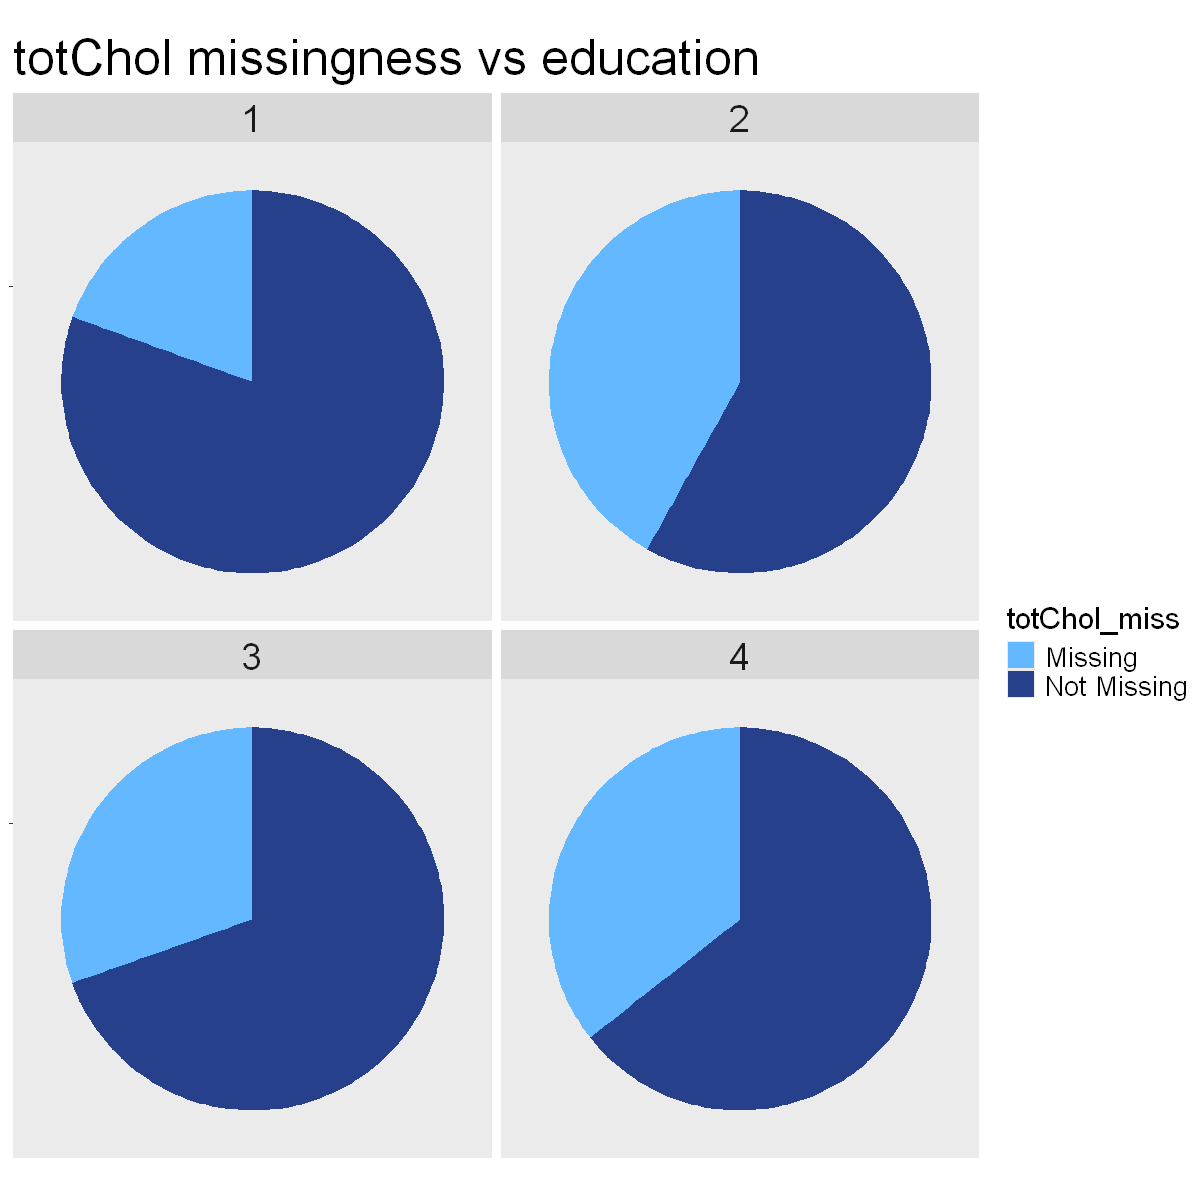

In [11]:
options(repr.plot.width = 10, repr.plot.height = 10)

fram_mar$totChol_miss <- ifelse(is.na(fram_mar$totChol), "Missing", "Not Missing")

edu_freq <- fram_mar %>%
    group_by(education, totChol_miss) %>%
    summarize(count = n()) %>%
    mutate(freq = count/sum(count))

missPlotCat(edu_freq, "totChol_miss", "freq", "education", "totChol missingness vs education", 2)

`summarise()` has grouped output by 'currentSmoker'. You can override using the
`.groups` argument.


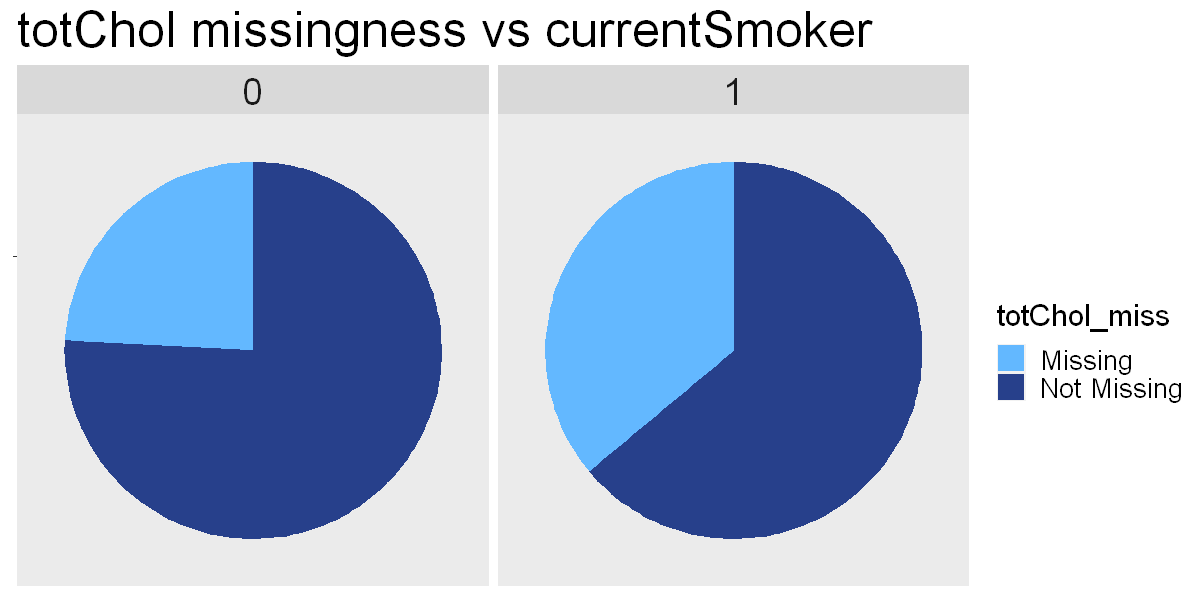

In [66]:
options(repr.plot.width = 10, repr.plot.height = 5)

cs_freq <- fram_mar %>%
    group_by(currentSmoker, totChol_miss) %>%
    summarize(count = n()) %>%
    mutate(freq = count/sum(count))

missPlotCat(cs_freq, "totChol_miss", "freq", "currentSmoker", "totChol missingness vs currentSmoker", 2)

`summarise()` has grouped output by 'BPMeds'. You can override using the
`.groups` argument.


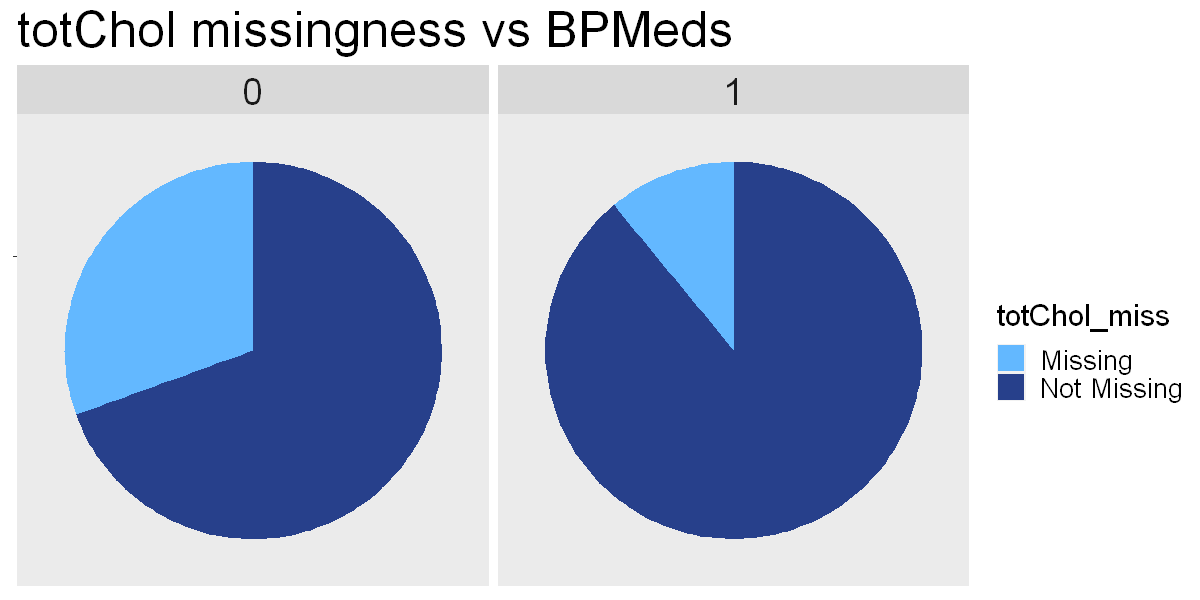

In [67]:
options(repr.plot.width = 10, repr.plot.height = 5)

bp_freq <- fram_mar %>%
    group_by(BPMeds, totChol_miss) %>%
    summarize(count = n()) %>%
    mutate(freq = count/sum(count))

missPlotCat(bp_freq, "totChol_miss", "freq", "BPMeds", "totChol missingness vs BPMeds", 2)

`summarise()` has grouped output by 'prevalentHyp'. You can override using the
`.groups` argument.


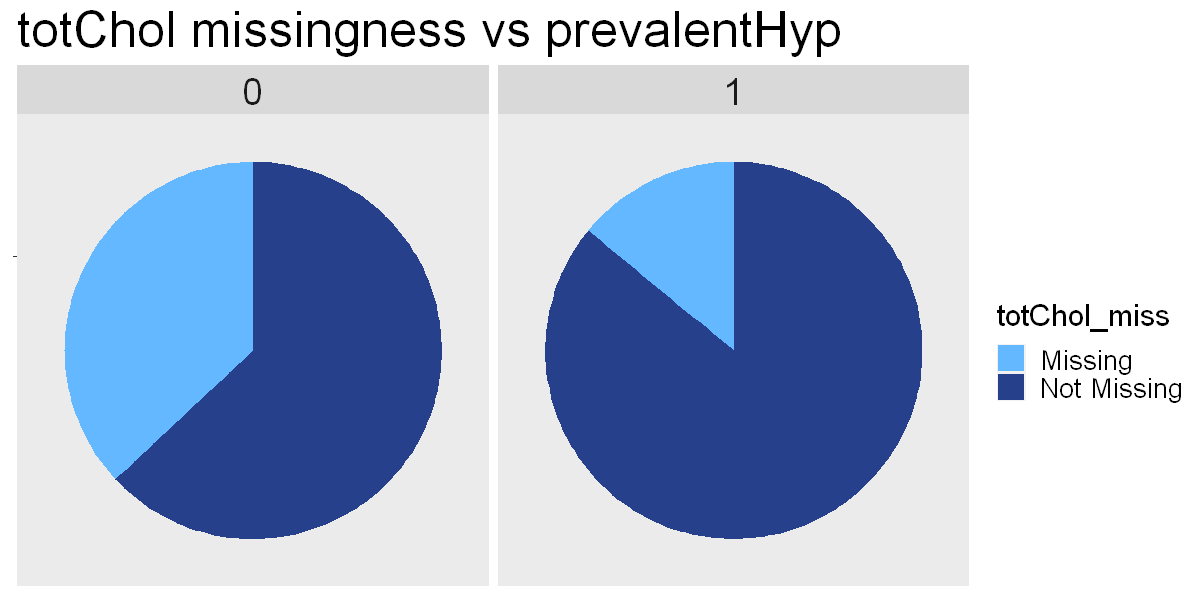

In [68]:
options(repr.plot.width = 10, repr.plot.height = 5)

ph_freq <- fram_mar %>%
    group_by(prevalentHyp, totChol_miss) %>%
    summarize(count = n()) %>%
    mutate(freq = count/sum(count))

missPlotCat(ph_freq, "totChol_miss", "freq", "prevalentHyp", "totChol missingness vs prevalentHyp", 2)

`summarise()` has grouped output by 'diabetes'. You can override using the
`.groups` argument.


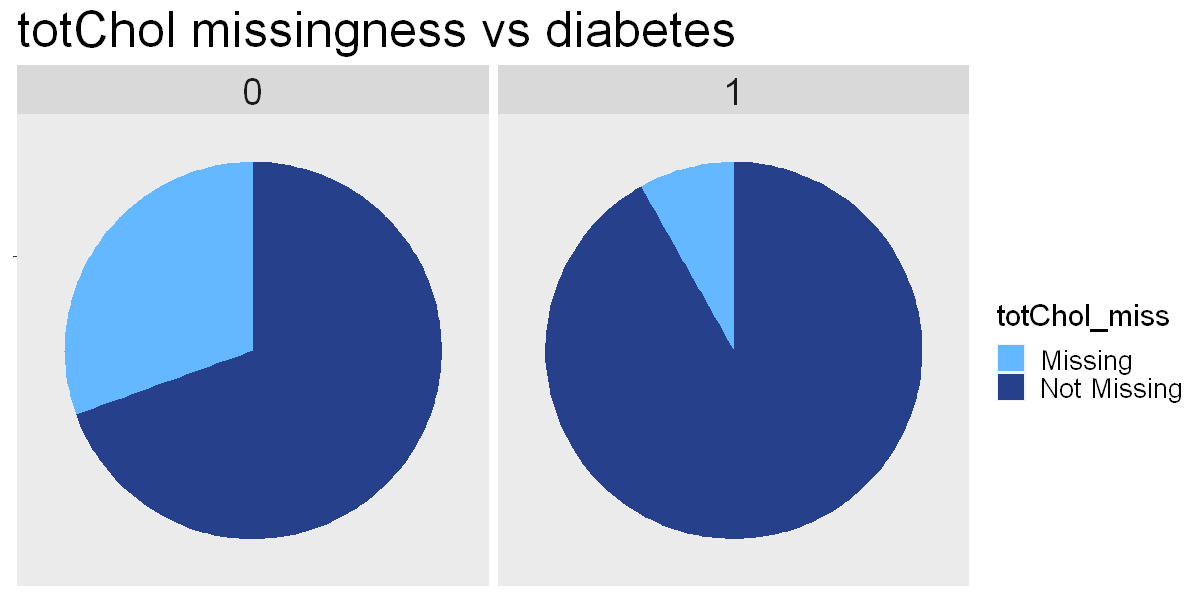

In [70]:
options(repr.plot.width = 10, repr.plot.height = 5)

diab_freq <- fram_mar %>%
    group_by(diabetes, totChol_miss) %>%
    summarize(count = n()) %>%
    mutate(freq = count/sum(count))

missPlotCat(diab_freq, "totChol_miss", "freq", "diabetes", "totChol missingness vs diabetes", 2)

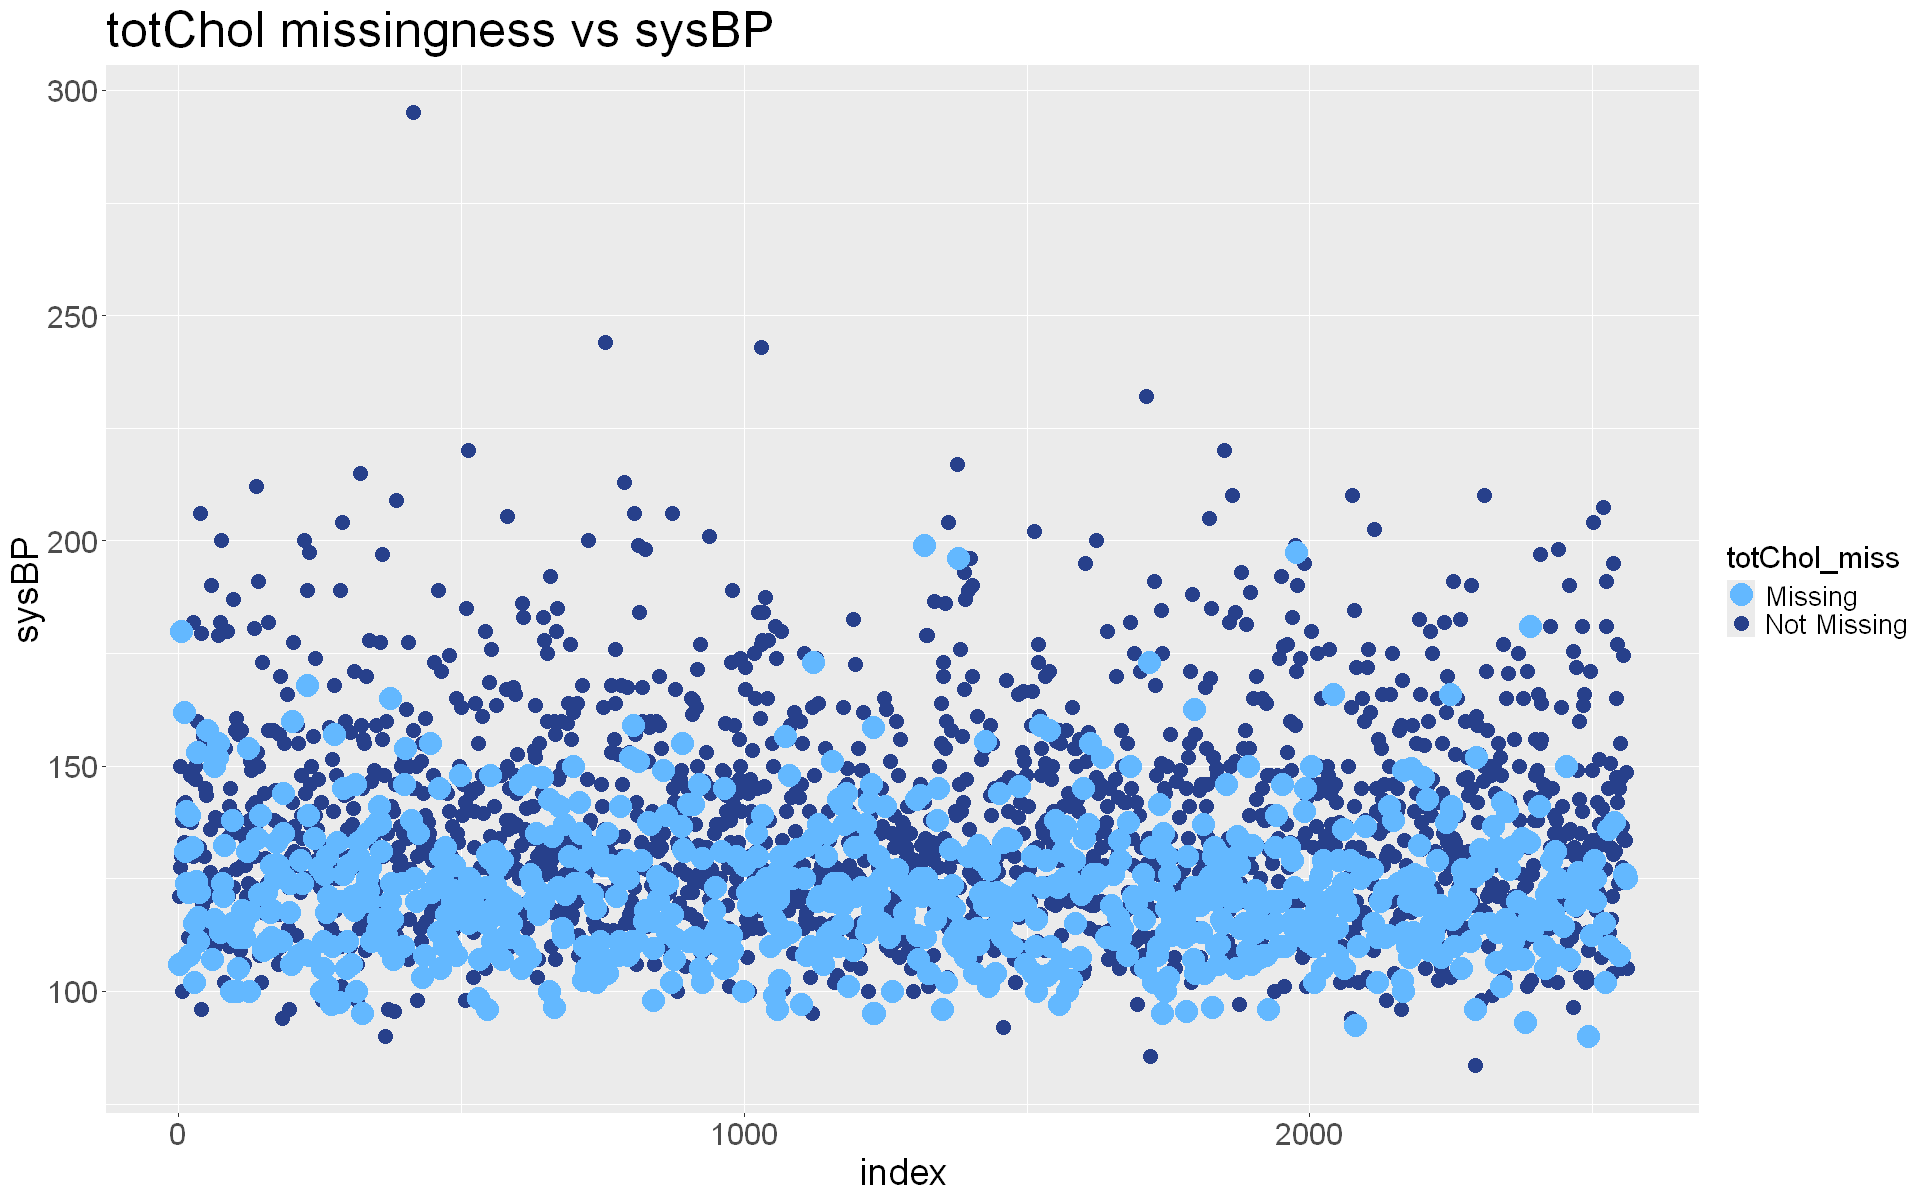

In [15]:
options(repr.plot.width = 16, repr.plot.height = 10)
missPlotCont(fram_mar, "totChol_miss", "index", "sysBP", "totChol missingness vs sysBP")

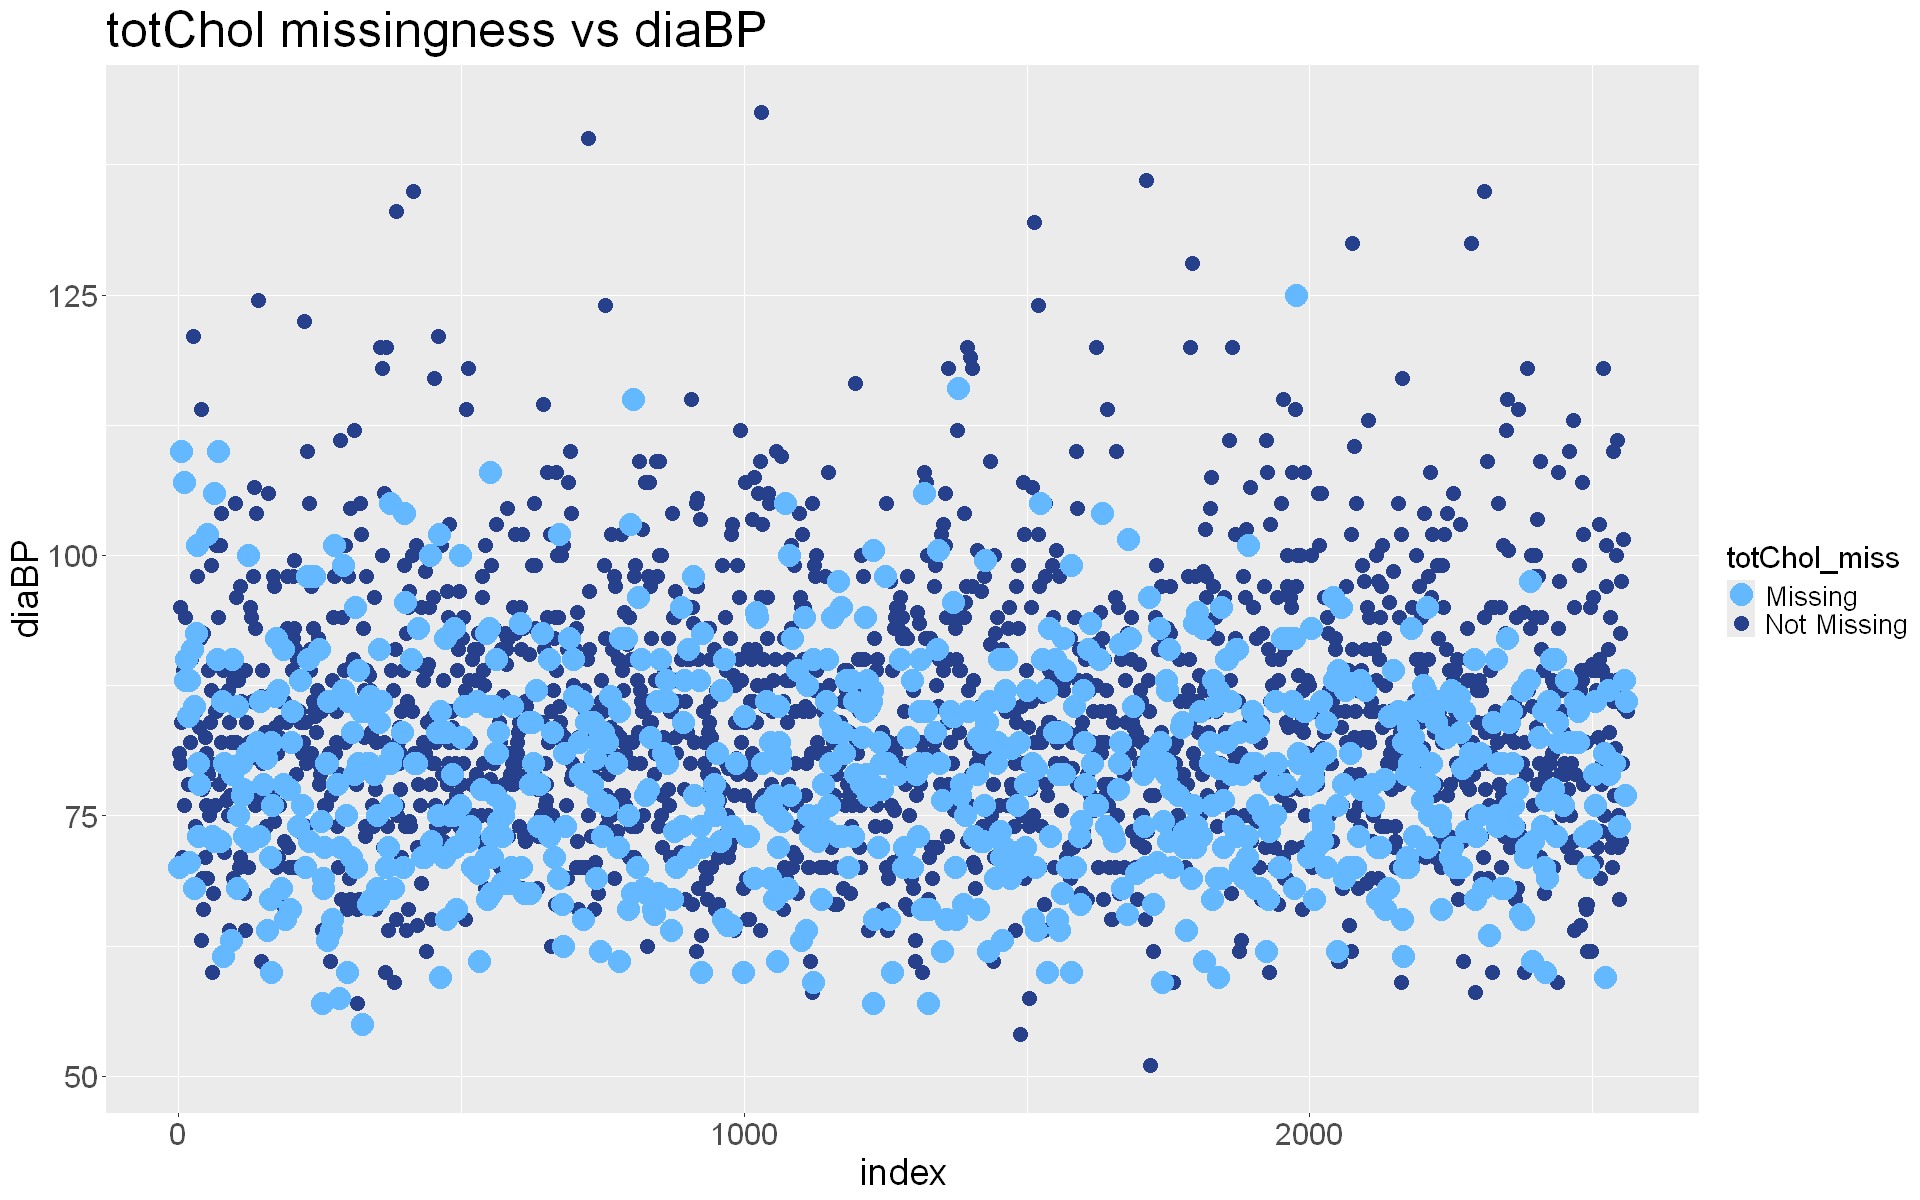

In [16]:
options(repr.plot.width = 16, repr.plot.height = 10)
missPlotCont(fram_mar, "totChol_miss", "index", "diaBP", "totChol missingness vs diaBP")

`summarise()` has grouped output by 'TenYearCHD'. You can override using the
`.groups` argument.


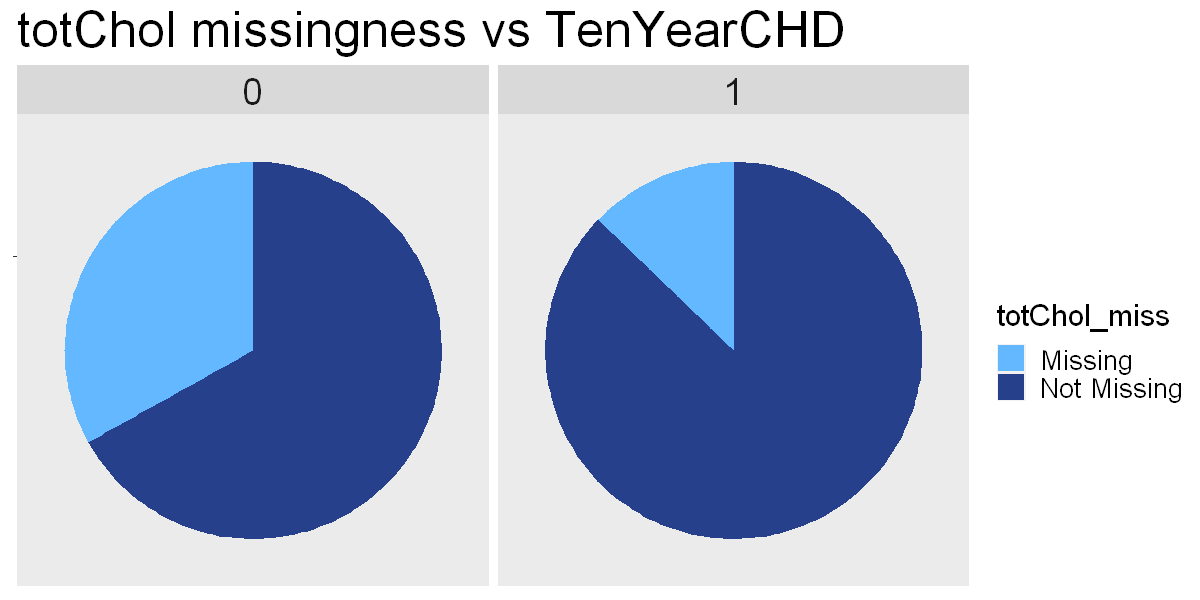

In [73]:
options(repr.plot.width = 10, repr.plot.height = 5)

chd_freq <- fram_mar %>%
    group_by(TenYearCHD, totChol_miss) %>%
    summarize(count = n()) %>%
    mutate(freq = count/sum(count))

missPlotCat(chd_freq, "totChol_miss", "freq", "TenYearCHD", "totChol missingness vs TenYearCHD", 2)

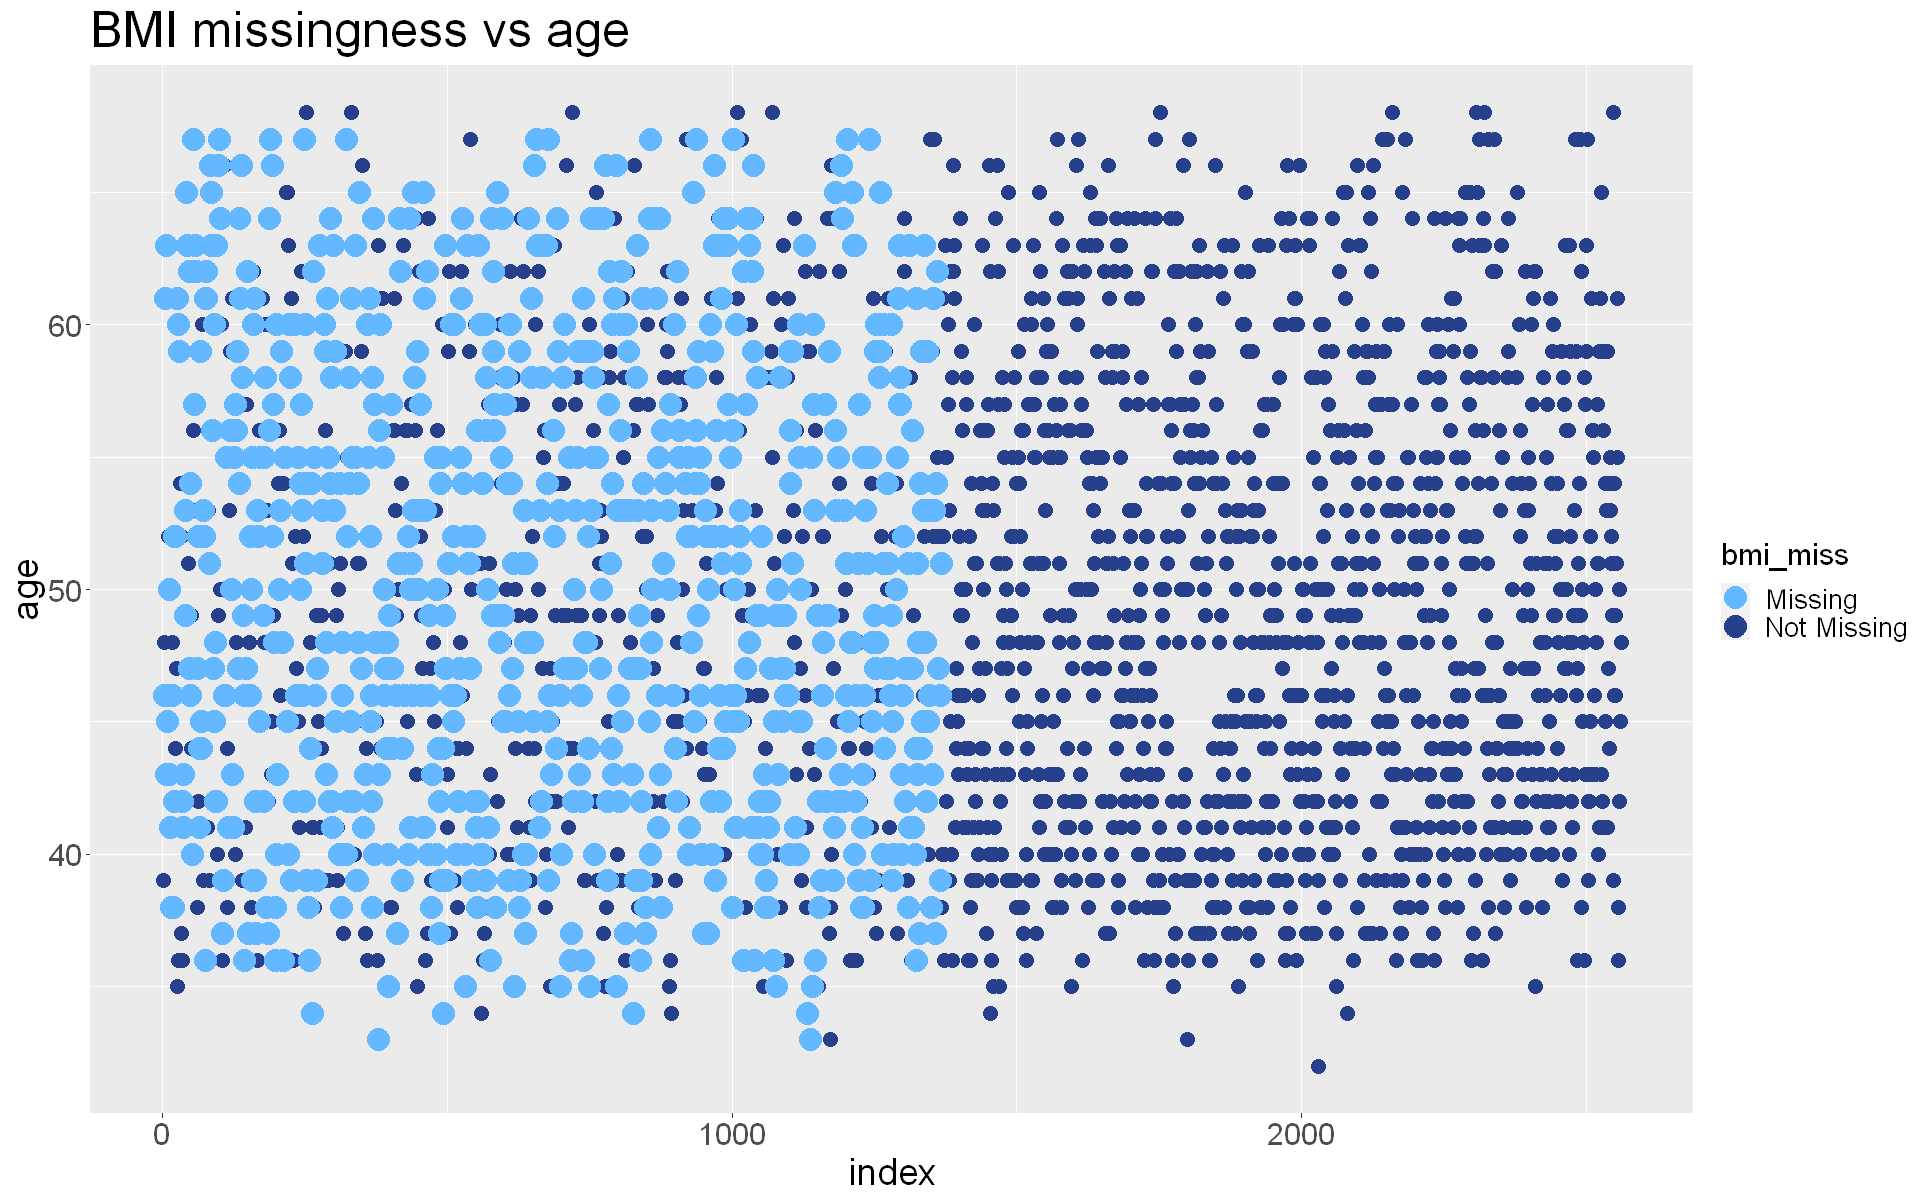

In [74]:
options(repr.plot.width = 16, repr.plot.height = 10)
fram_mar$bmi_miss <- ifelse(is.na(fram_mar$BMI), "Missing", "Not Missing")
missPlotCont(fram_mar, "bmi_miss", "index", "age", "BMI missingness vs age")

`summarise()` has grouped output by 'education'. You can override using the
`.groups` argument.


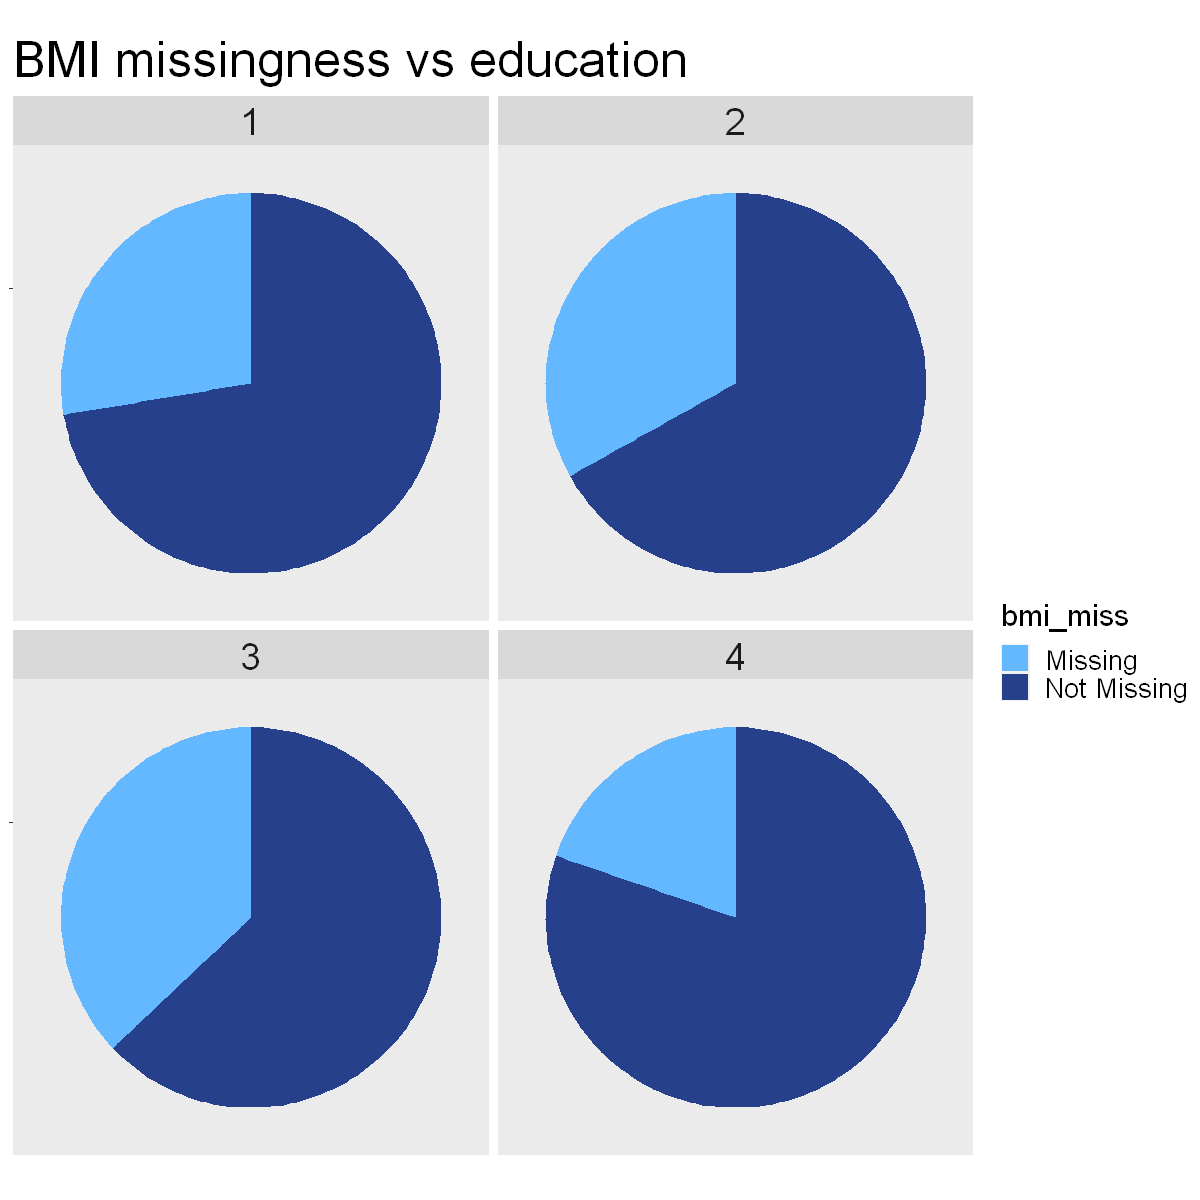

In [76]:
options(repr.plot.width = 10, repr.plot.height = 10)

edu_freq <- fram_mar %>%
    group_by(education, bmi_miss) %>%
    summarize(count = n()) %>%
    mutate(freq = count/sum(count))

missPlotCat(edu_freq, "bmi_miss", "freq", "education", "BMI missingness vs education", 2)

`summarise()` has grouped output by 'currentSmoker'. You can override using the
`.groups` argument.


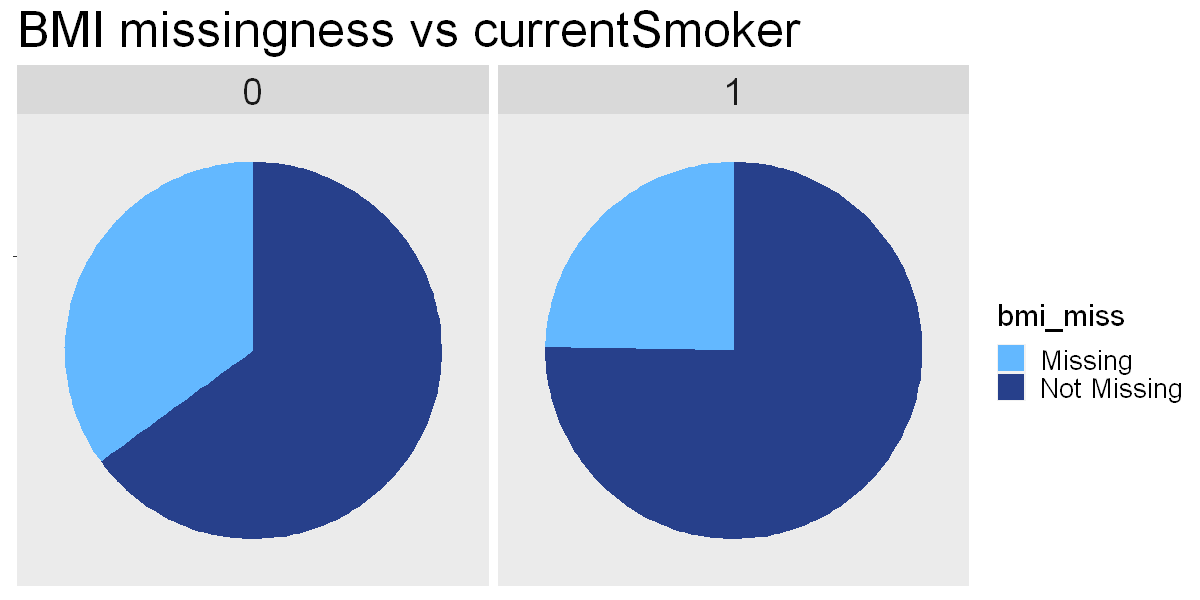

In [77]:
options(repr.plot.width = 10, repr.plot.height = 5)

cs_freq <- fram_mar %>%
    group_by(currentSmoker, bmi_miss) %>%
    summarize(count = n()) %>%
    mutate(freq = count/sum(count))

missPlotCat(cs_freq, "bmi_miss", "freq", "currentSmoker", "BMI missingness vs currentSmoker", 2)

Warning message:
"Removed 288 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 147 rows containing missing values (`geom_point()`)."


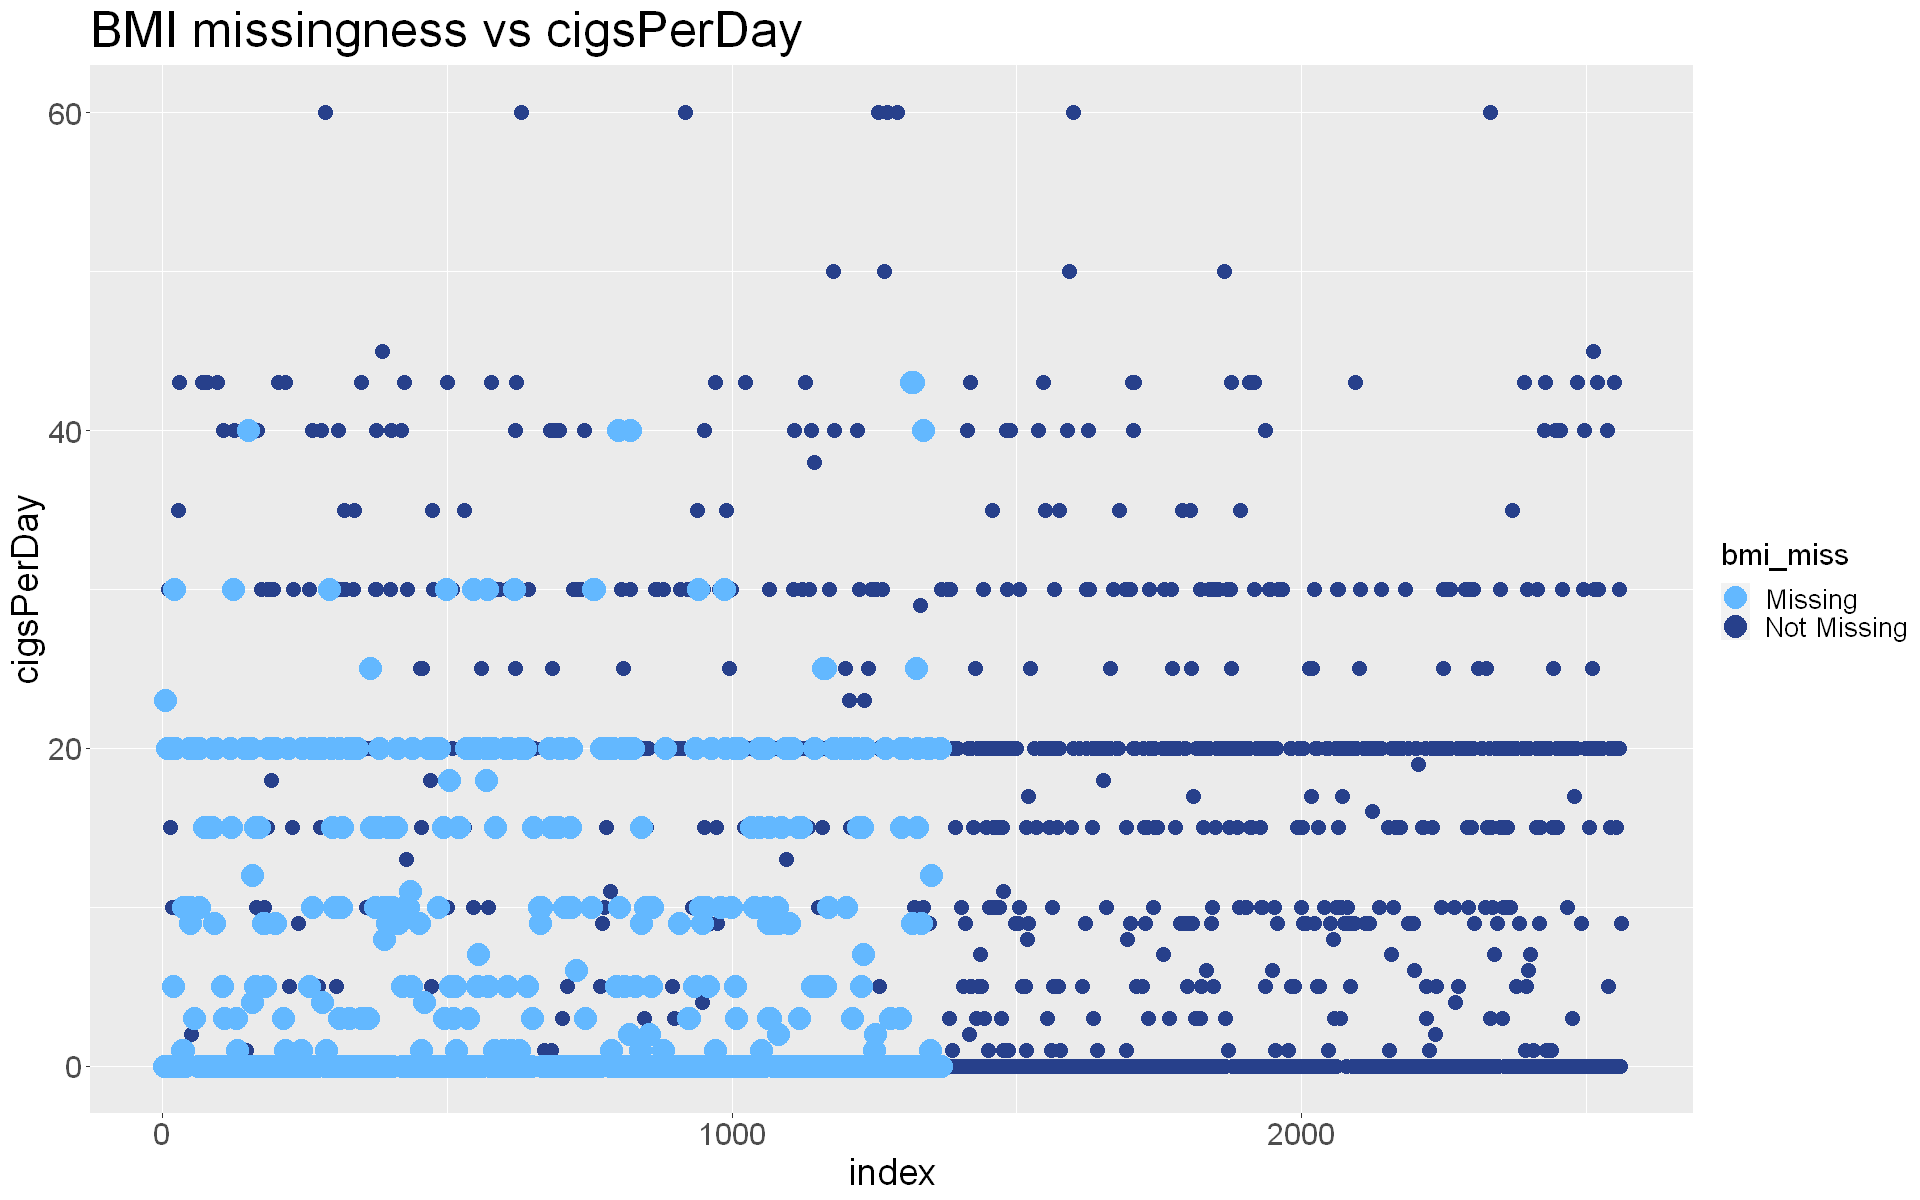

In [78]:
options(repr.plot.width = 16, repr.plot.height = 10)
missPlotCont(fram_mar, "bmi_miss", "index", "cigsPerDay", "BMI missingness vs cigsPerDay")

Warning message:
"Removed 559 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 209 rows containing missing values (`geom_point()`)."


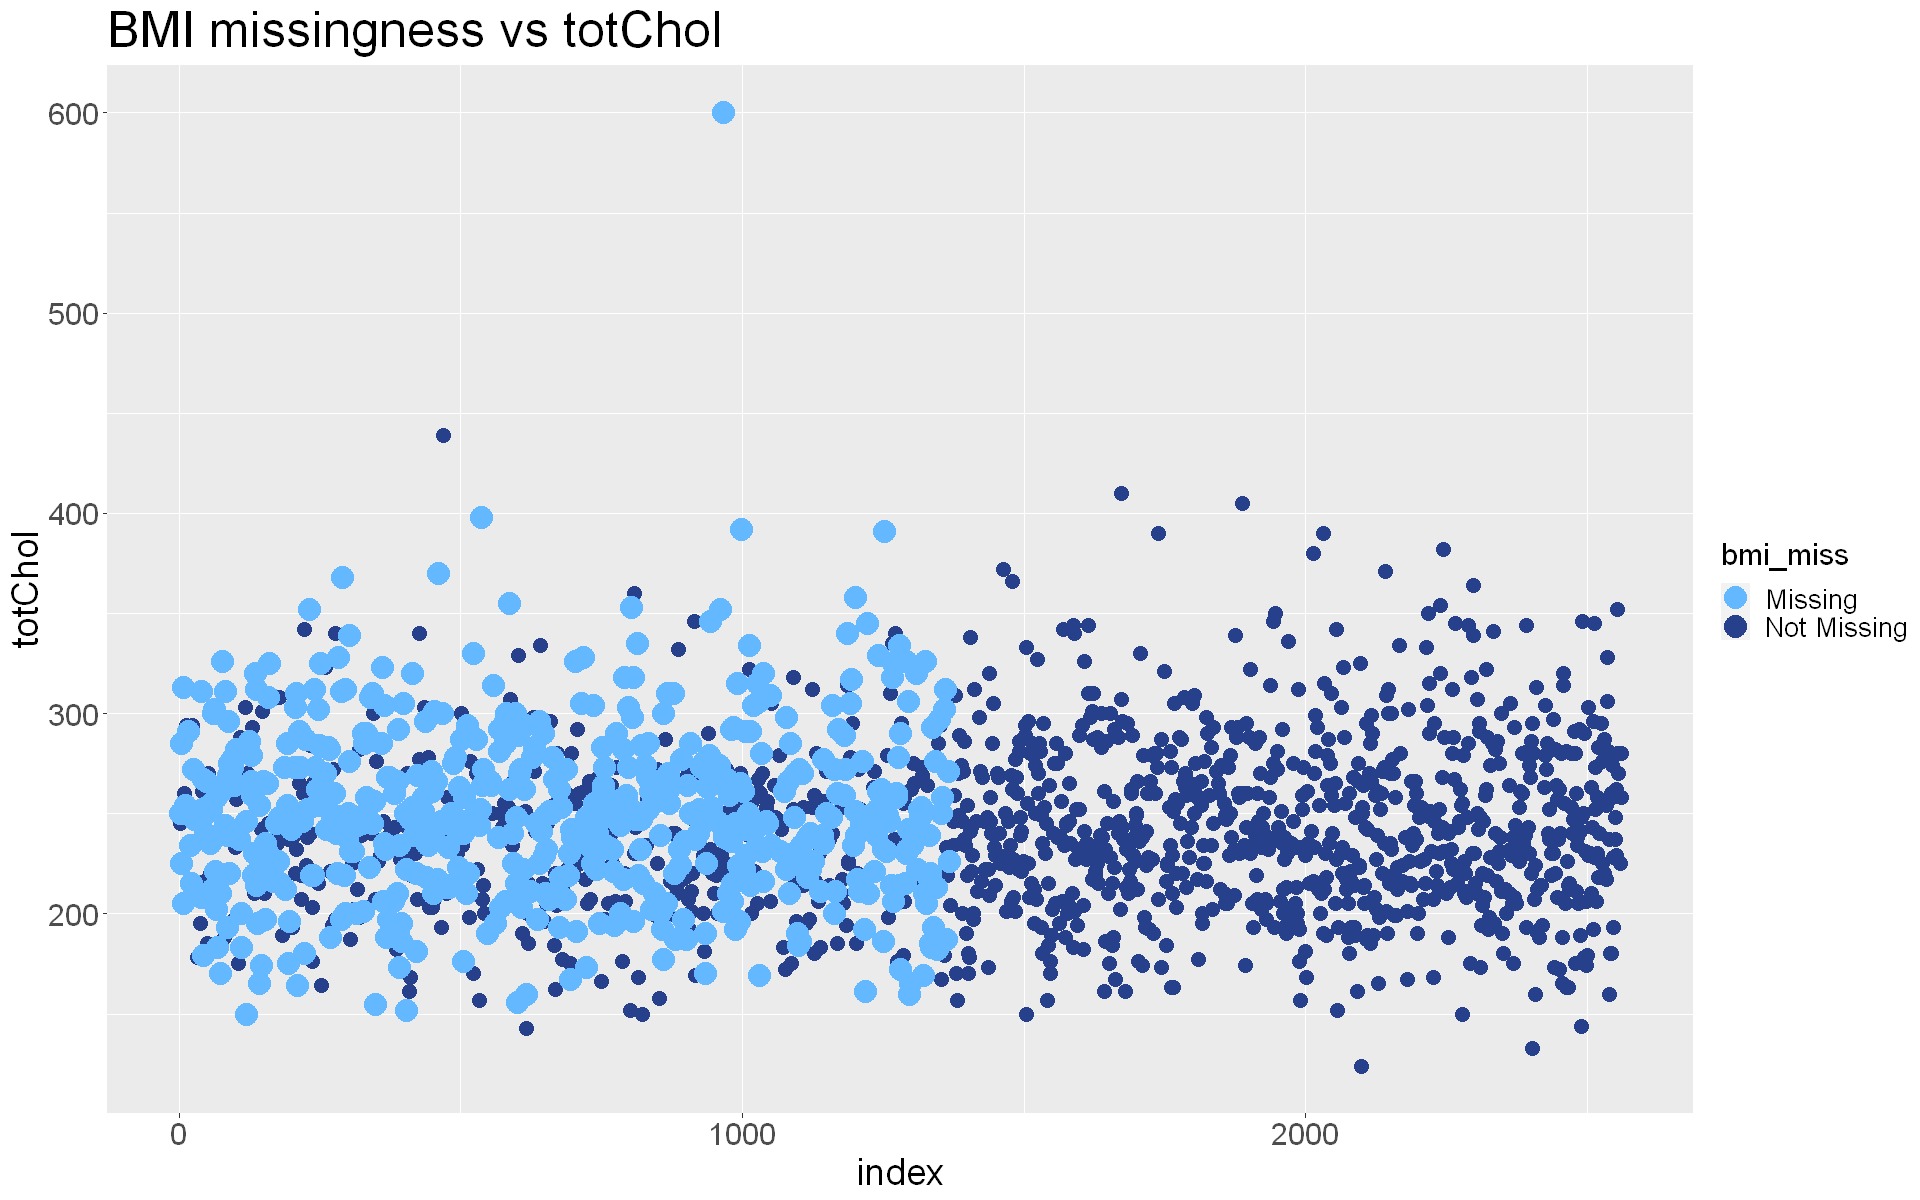

In [79]:
options(repr.plot.width = 16, repr.plot.height = 10)
missPlotCont(fram_mar, "bmi_miss", "index", "totChol", "BMI missingness vs totChol")

`summarise()` has grouped output by 'education'. You can override using the
`.groups` argument.


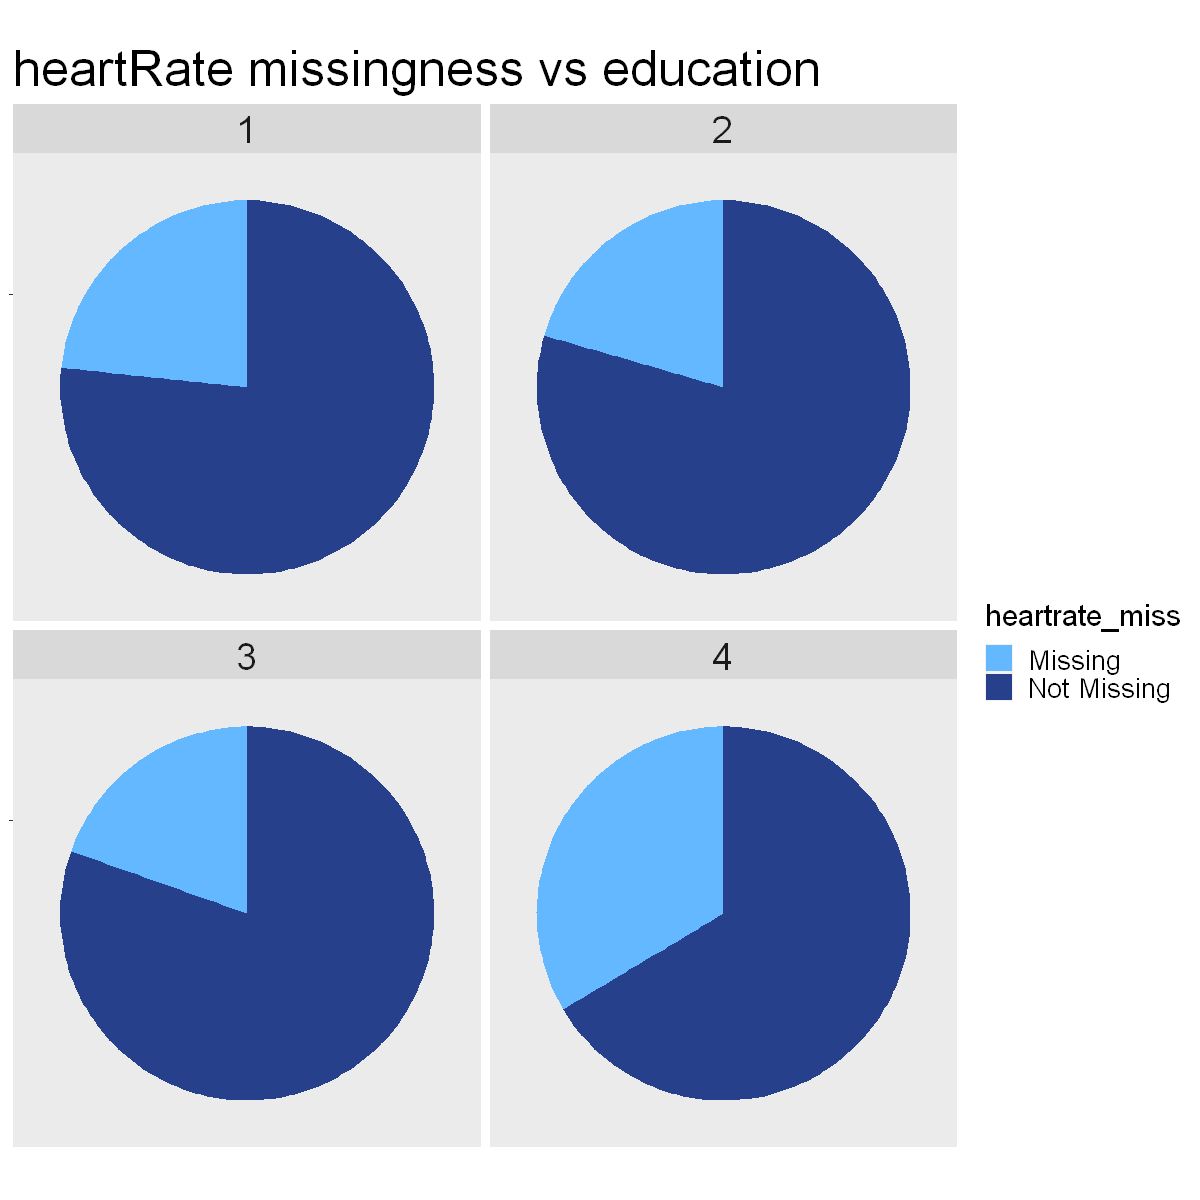

In [81]:
options(repr.plot.width = 10, repr.plot.height = 10)

fram_mar$heartrate_miss <- ifelse(is.na(fram_mar$heartRate), "Missing", "Not Missing")

edu_freq <- fram_mar %>%
    group_by(education, heartrate_miss) %>%
    summarize(count = n()) %>%
    mutate(freq = count/sum(count))

missPlotCat(edu_freq, "heartrate_miss", "freq", "education", "heartRate missingness vs education", 2)

`summarise()` has grouped output by 'currentSmoker'. You can override using the
`.groups` argument.


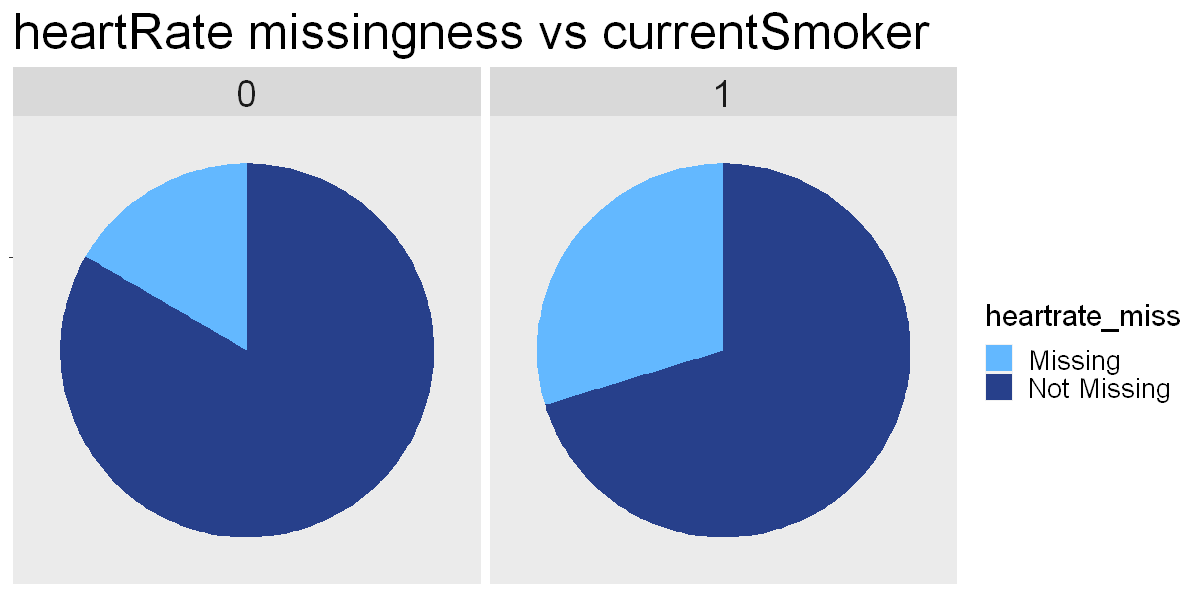

In [82]:
options(repr.plot.width = 10, repr.plot.height = 5)

cs_freq <- fram_mar %>%
    group_by(currentSmoker, heartrate_miss) %>%
    summarize(count = n()) %>%
    mutate(freq = count/sum(count))

missPlotCat(cs_freq, "heartrate_miss", "freq", "currentSmoker", "heartRate missingness vs currentSmoker", 2)

`summarise()` has grouped output by 'TenYearCHD'. You can override using the
`.groups` argument.


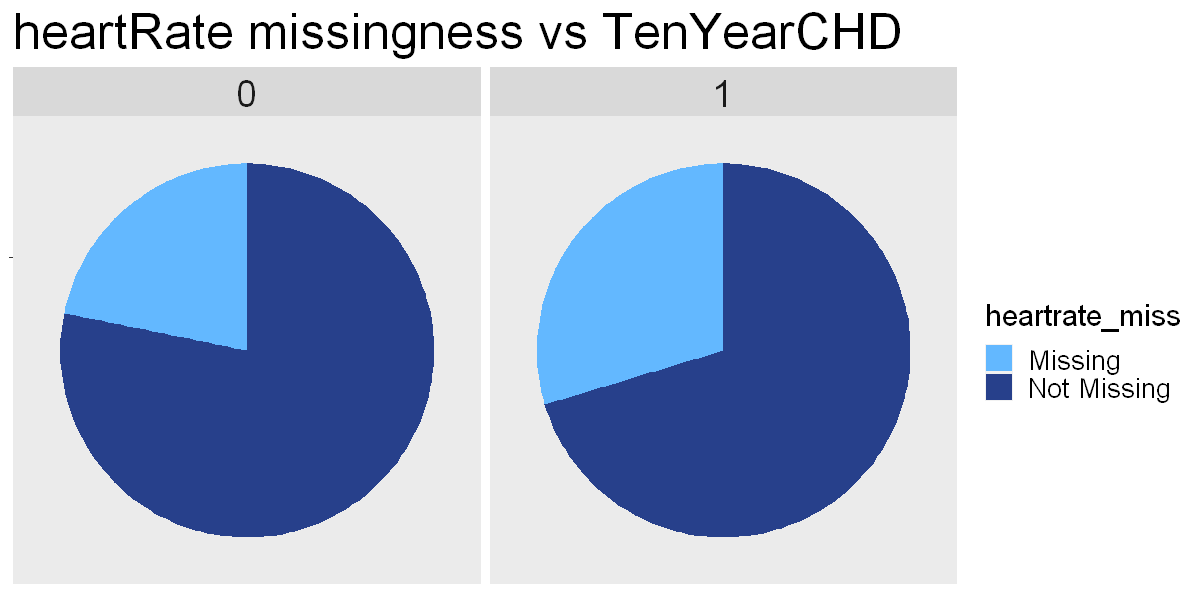

In [83]:
options(repr.plot.width = 10, repr.plot.height = 5)

chd_freq <- fram_mar %>%
    group_by(TenYearCHD, heartrate_miss) %>%
    summarize(count = n()) %>%
    mutate(freq = count/sum(count))

missPlotCat(chd_freq, "heartrate_miss", "freq", "TenYearCHD", "heartRate missingness vs TenYearCHD", 2)

Warning message:
"Removed 333 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 102 rows containing missing values (`geom_point()`)."


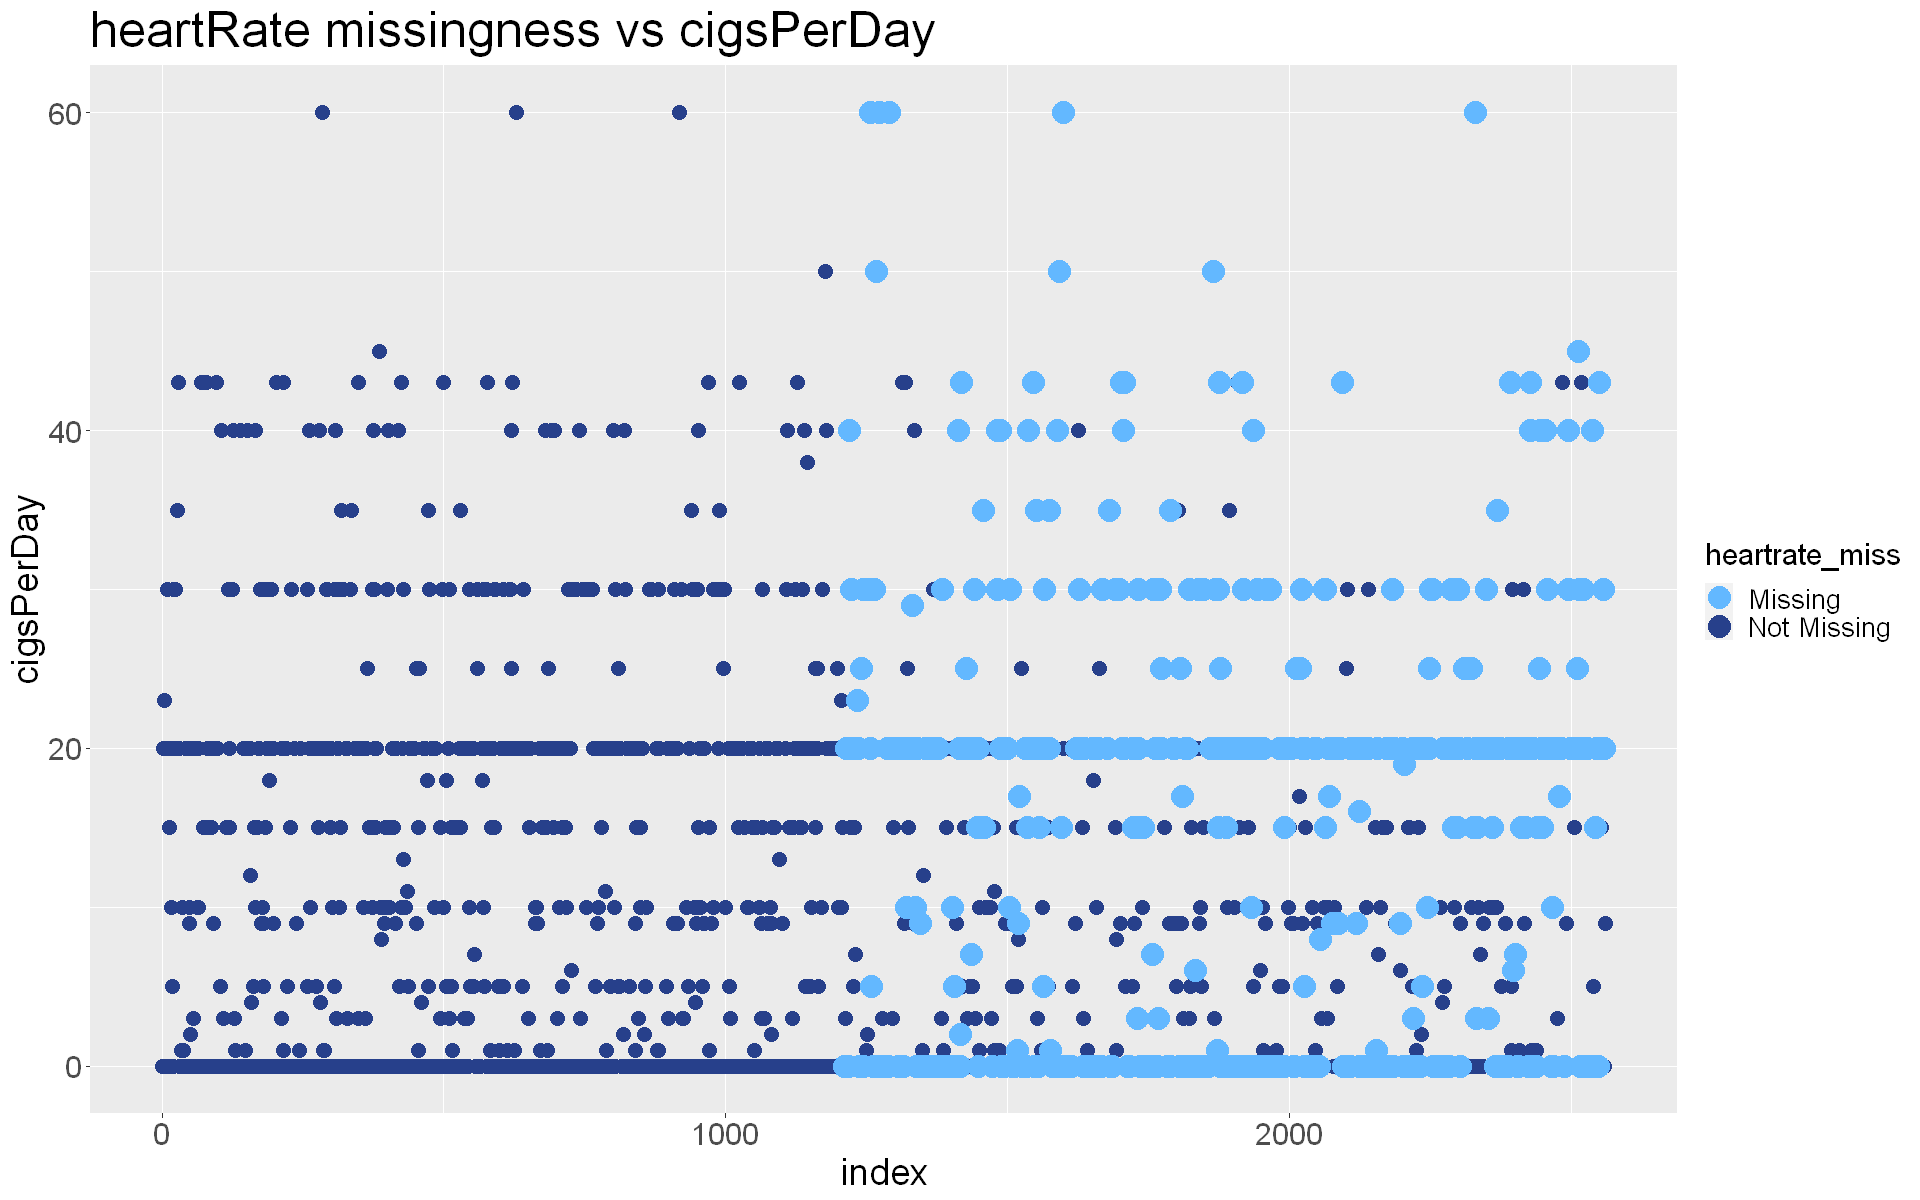

In [84]:
options(repr.plot.width = 16, repr.plot.height = 10)
missPlotCont(fram_mar, "heartrate_miss", "index", "cigsPerDay", "heartRate missingness vs cigsPerDay")

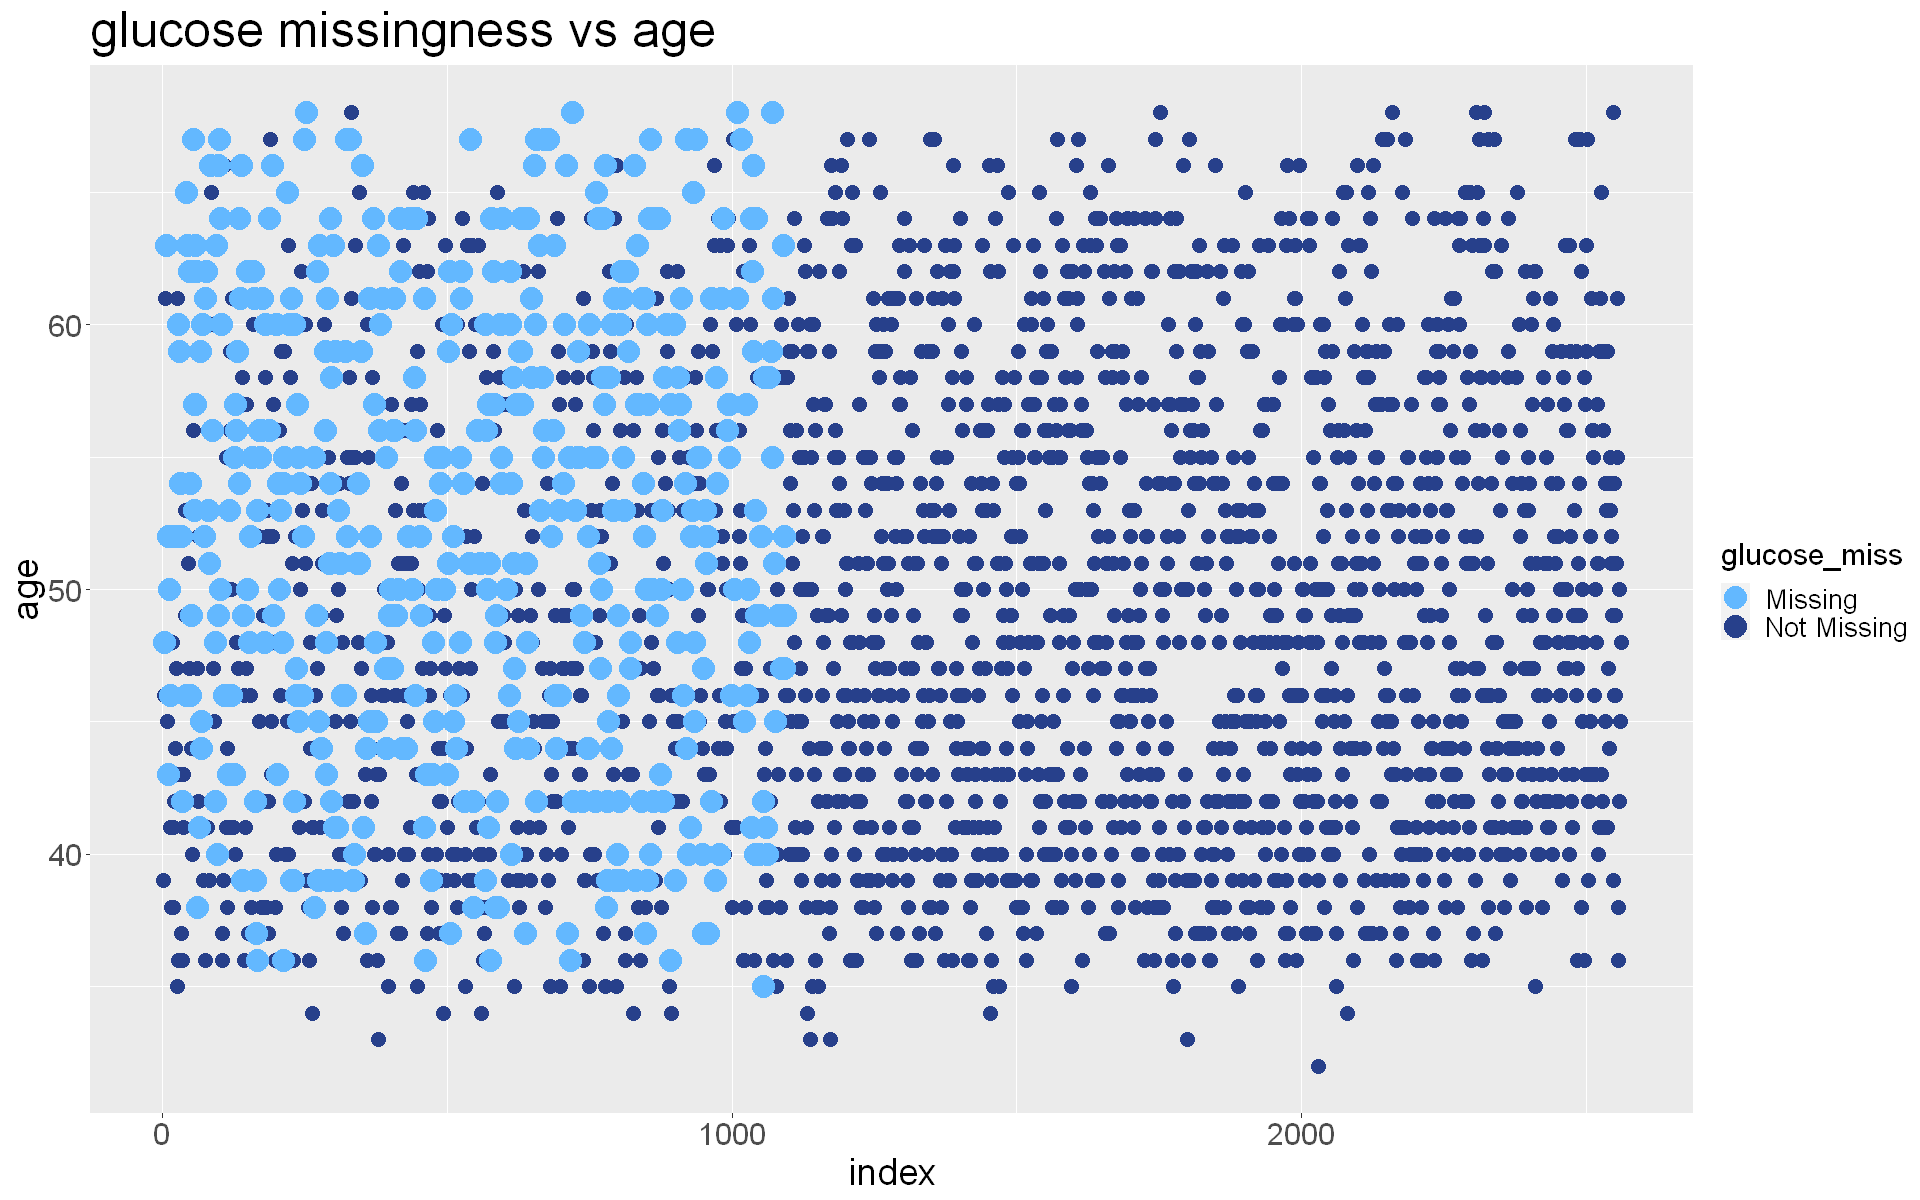

In [85]:
options(repr.plot.width = 16, repr.plot.height = 10)
fram_mar$glucose_miss <- ifelse(is.na(fram_mar$glucose), "Missing", "Not Missing")
missPlotCont(fram_mar, "glucose_miss", "index", "age", "glucose missingness vs age")

`summarise()` has grouped output by 'prevalentHyp'. You can override using the
`.groups` argument.


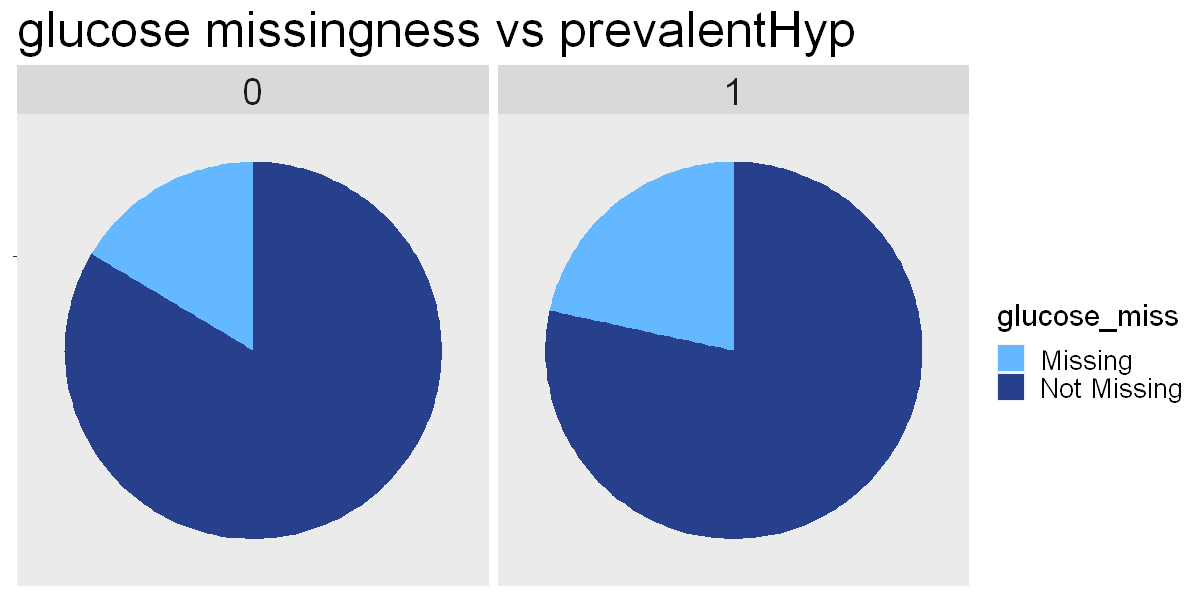

In [86]:
options(repr.plot.width = 10, repr.plot.height = 5)

ph_freq <- fram_mar %>%
    group_by(prevalentHyp, glucose_miss) %>%
    summarize(count = n()) %>%
    mutate(freq = count/sum(count))

missPlotCat(ph_freq, "glucose_miss", "freq", "prevalentHyp", "glucose missingness vs prevalentHyp", 2)

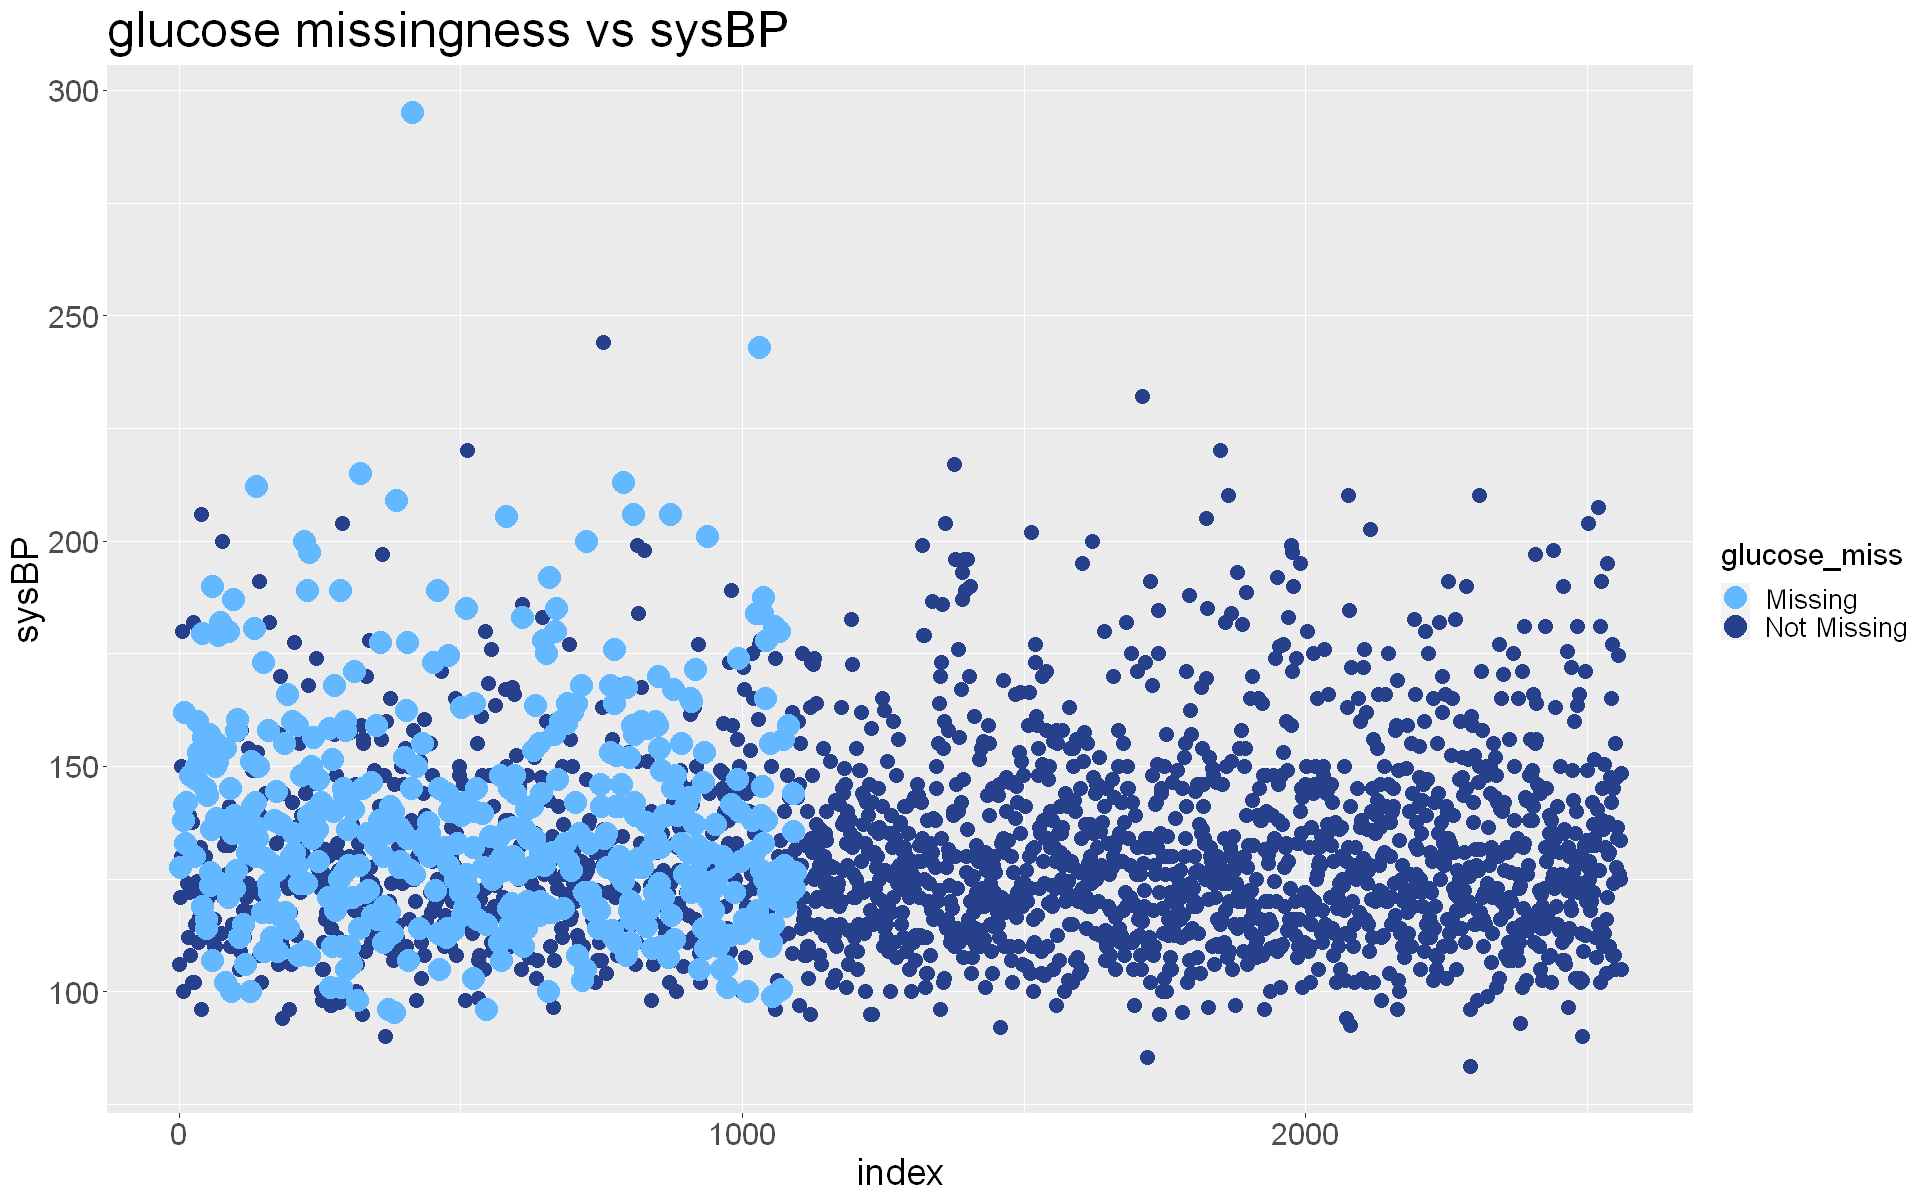

In [87]:
options(repr.plot.width = 16, repr.plot.height = 10)
missPlotCont(fram_mar, "glucose_miss", "index", "sysBP", "glucose missingness vs sysBP")

`summarise()` has grouped output by 'TenYearCHD'. You can override using the
`.groups` argument.


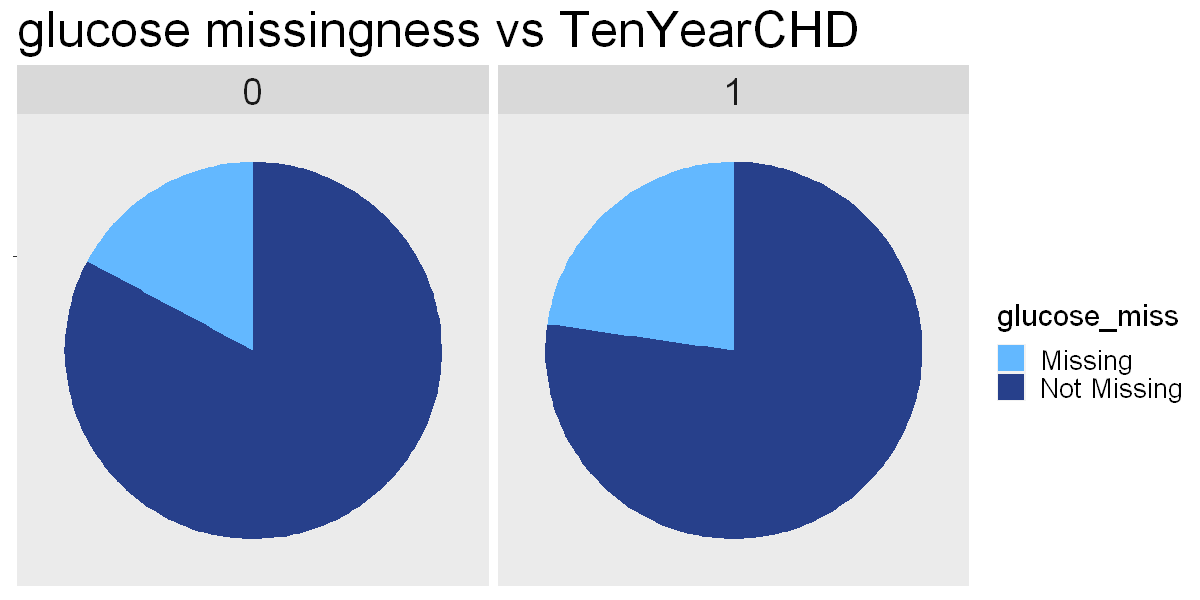

In [88]:
options(repr.plot.width = 10, repr.plot.height = 5)

ty_freq <- fram_mar %>%
    group_by(TenYearCHD, glucose_miss) %>%
    summarize(count = n()) %>%
    mutate(freq = count/sum(count))

missPlotCat(ty_freq, "glucose_miss", "freq", "TenYearCHD", "glucose missingness vs TenYearCHD", 2)

#### MNAR

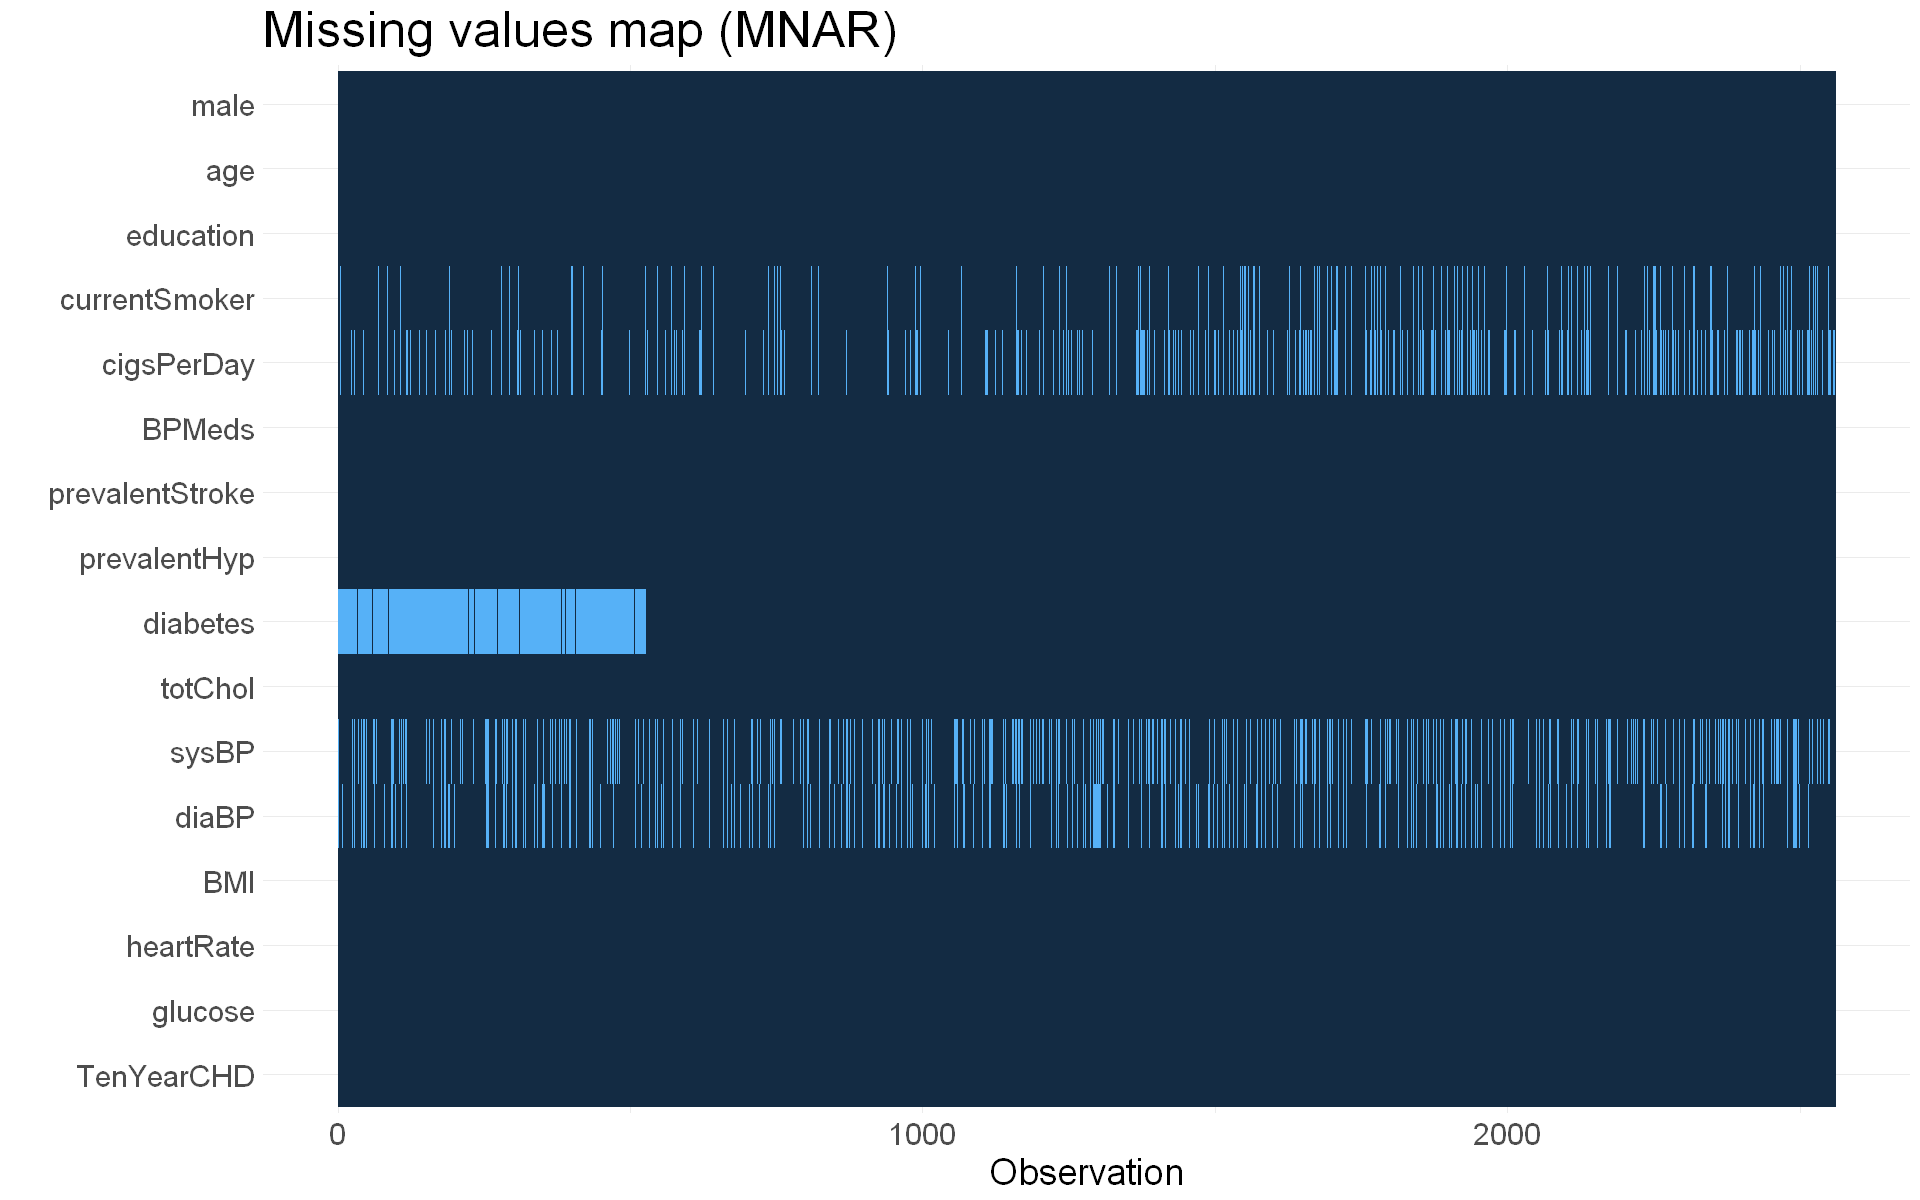

In [89]:
options(repr.plot.width = 16, repr.plot.height = 10)

mnar_plot <- fram_mnar %>% missing_plot()

mnar_plot <- mnar_plot +
    theme(
        plot.title = element_text(size = 30),         
        axis.title = element_text(size = 22),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18)) +
    labs(title = "Missing values map (MNAR)")
 
mnar_plot

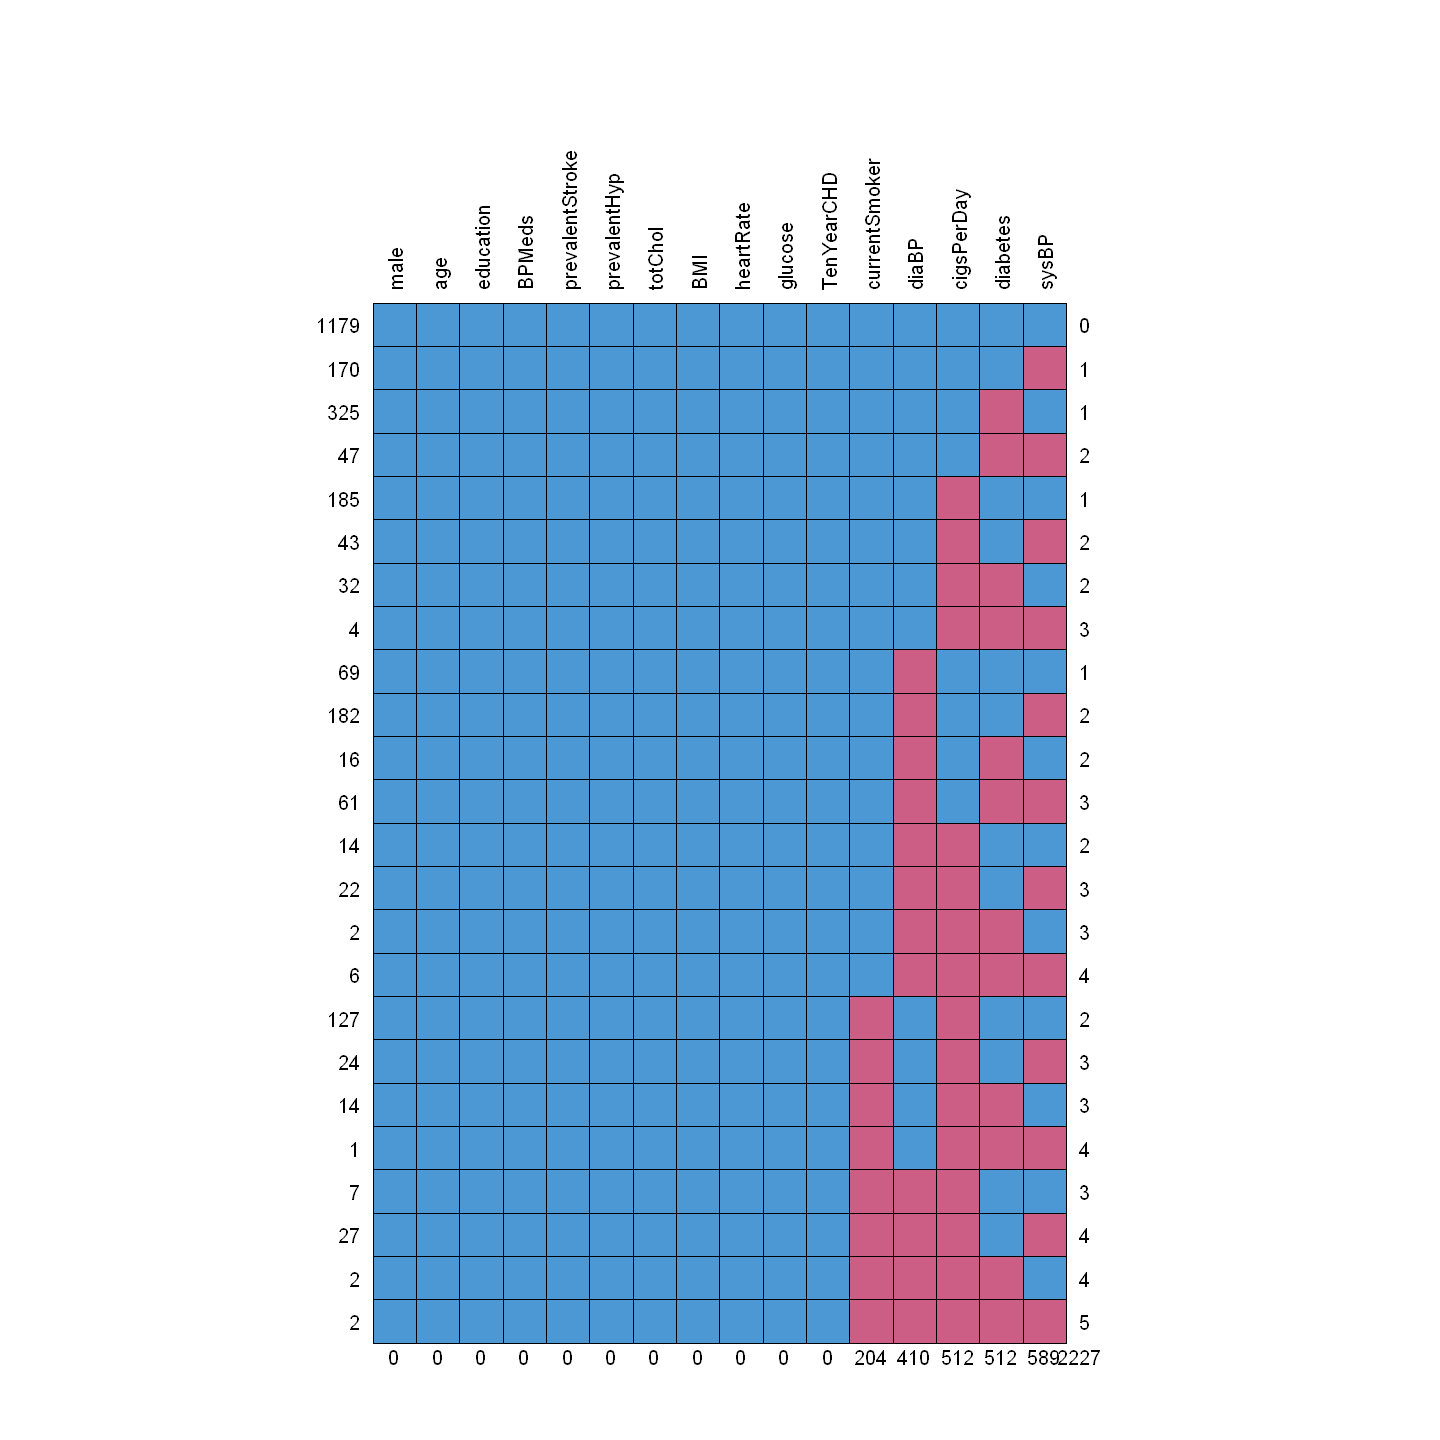

In [90]:
options(repr.plot.width = 12, repr.plot.height = 12)
mnar_pattern <- md.pattern(fram_mnar, rotate.names=TRUE)

There is no way to verify if missing data are MNAR, unless we know their real values. Fortunately, we have the original dataset, so we can visualize the missingness and confirm its mechanism.

In [98]:
fram$cPD_miss <- ifelse(is.na(fram_mnar$cigsPerDay), "Missing", "Not Missing")
fram$sysBP_miss <- ifelse(is.na(fram_mnar$sysBP), "Missing", "Not Missing")
fram$diaBP_miss <- ifelse(is.na(fram_mnar$diaBP), "Missing", "Not Missing")
fram$diabetes_miss <- ifelse(is.na(fram_mnar$diabetes), "Missing", "Not Missing")
fram$cS_miss <- ifelse(is.na(fram_mnar$currentSmoker), "Missing", "Not Missing")
fram$index <- as.numeric(row.names(fram))

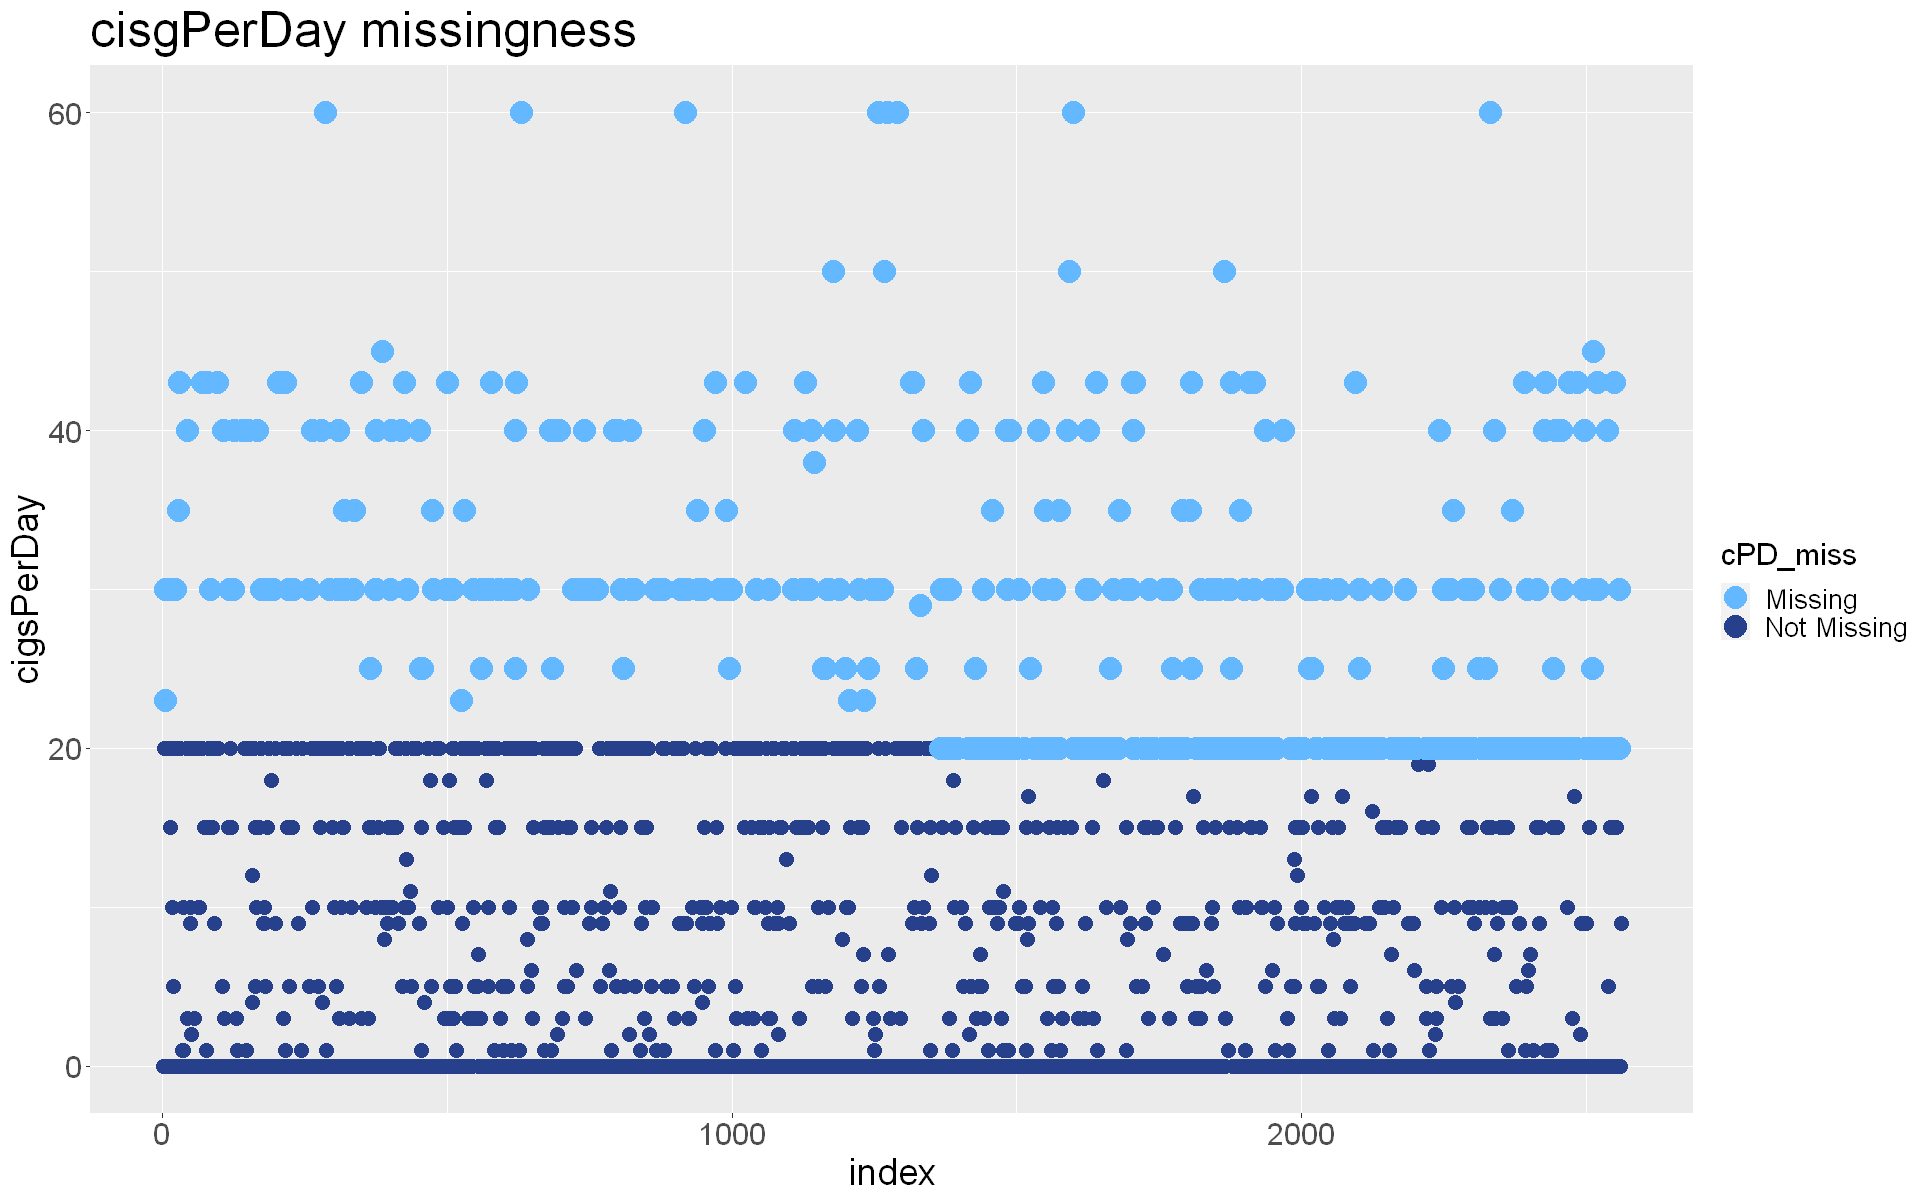

In [92]:
options(repr.plot.width = 16, repr.plot.height = 10)
missPlotCont(fram, "cPD_miss", "index", "cigsPerDay", "cisgPerDay missingness")

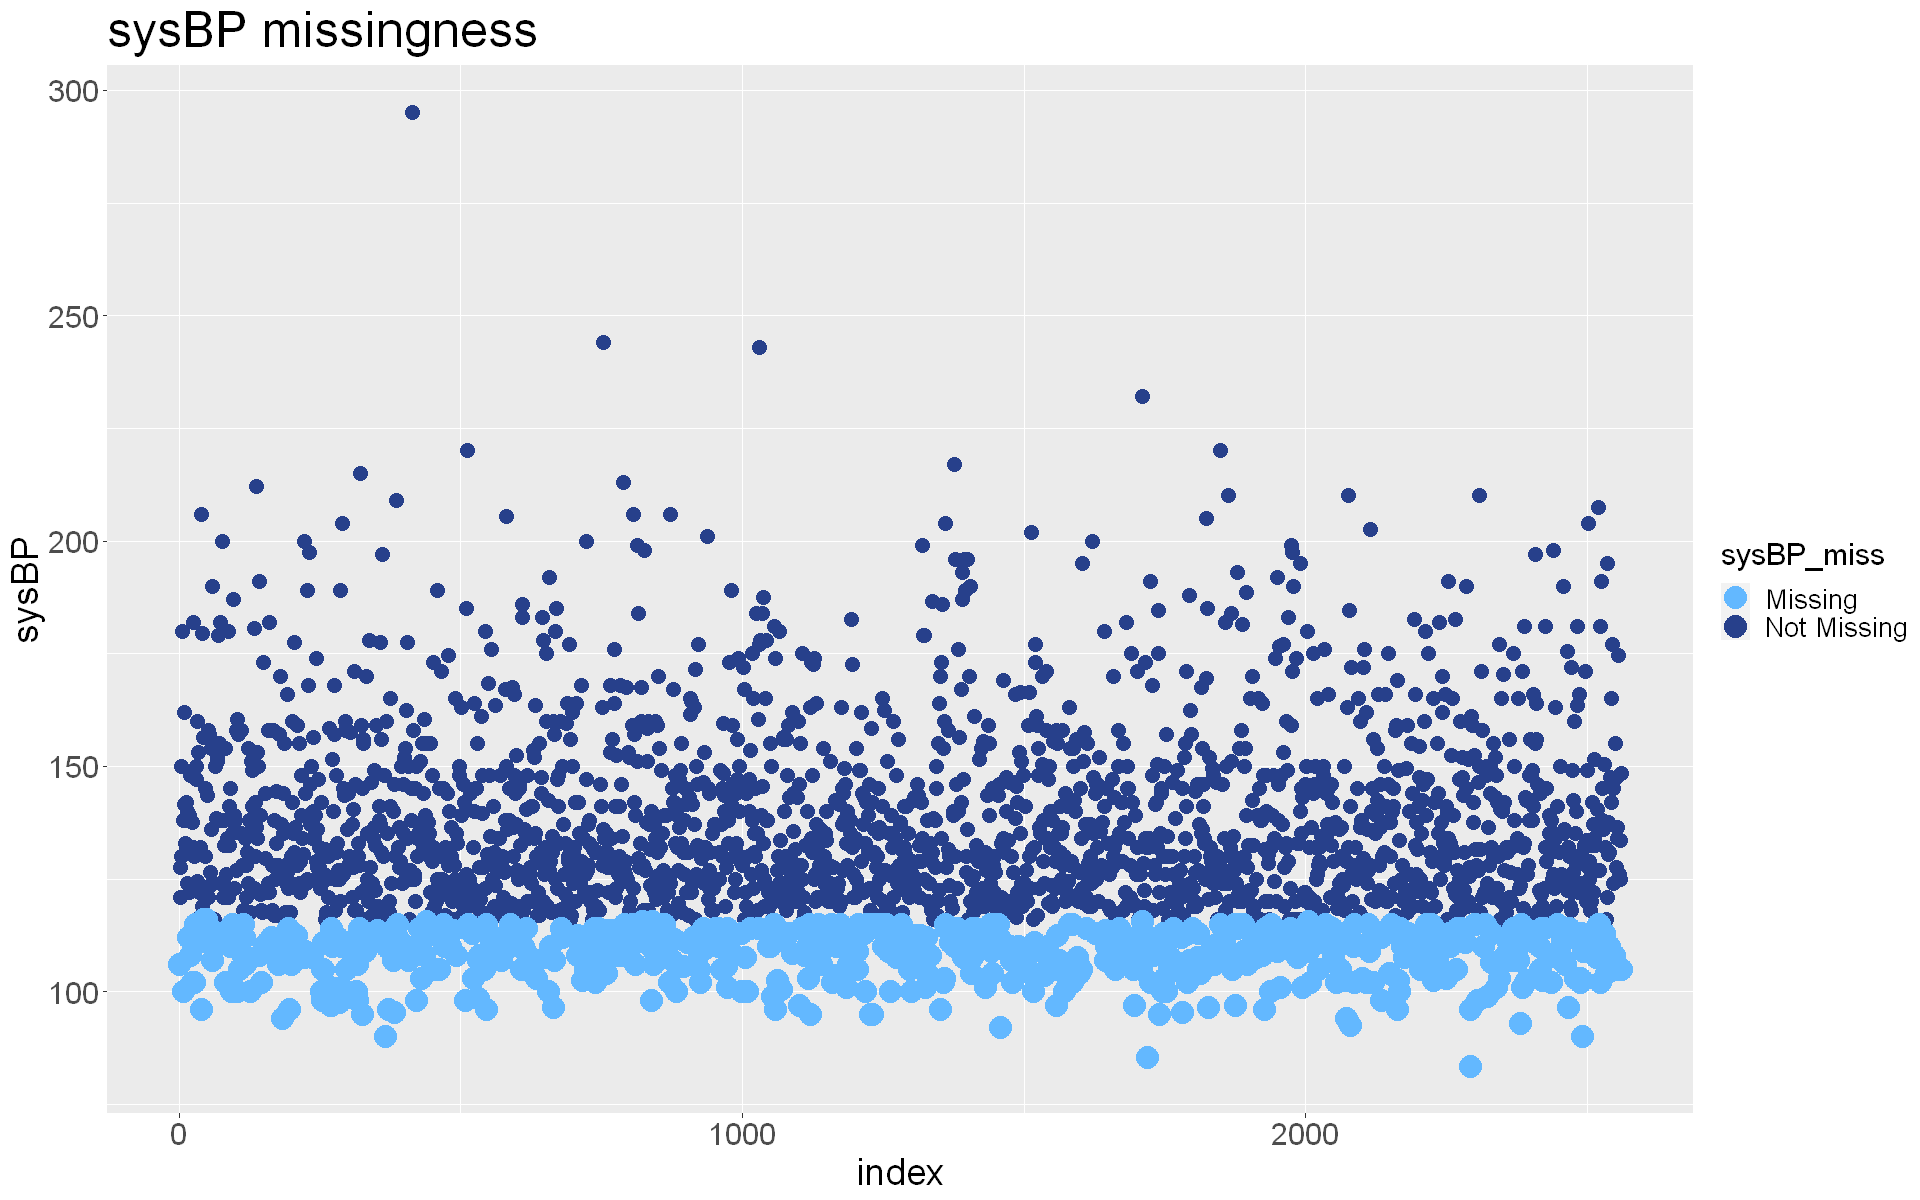

In [93]:
missPlotCont(fram, "sysBP_miss", "index", "sysBP", "sysBP missingness")

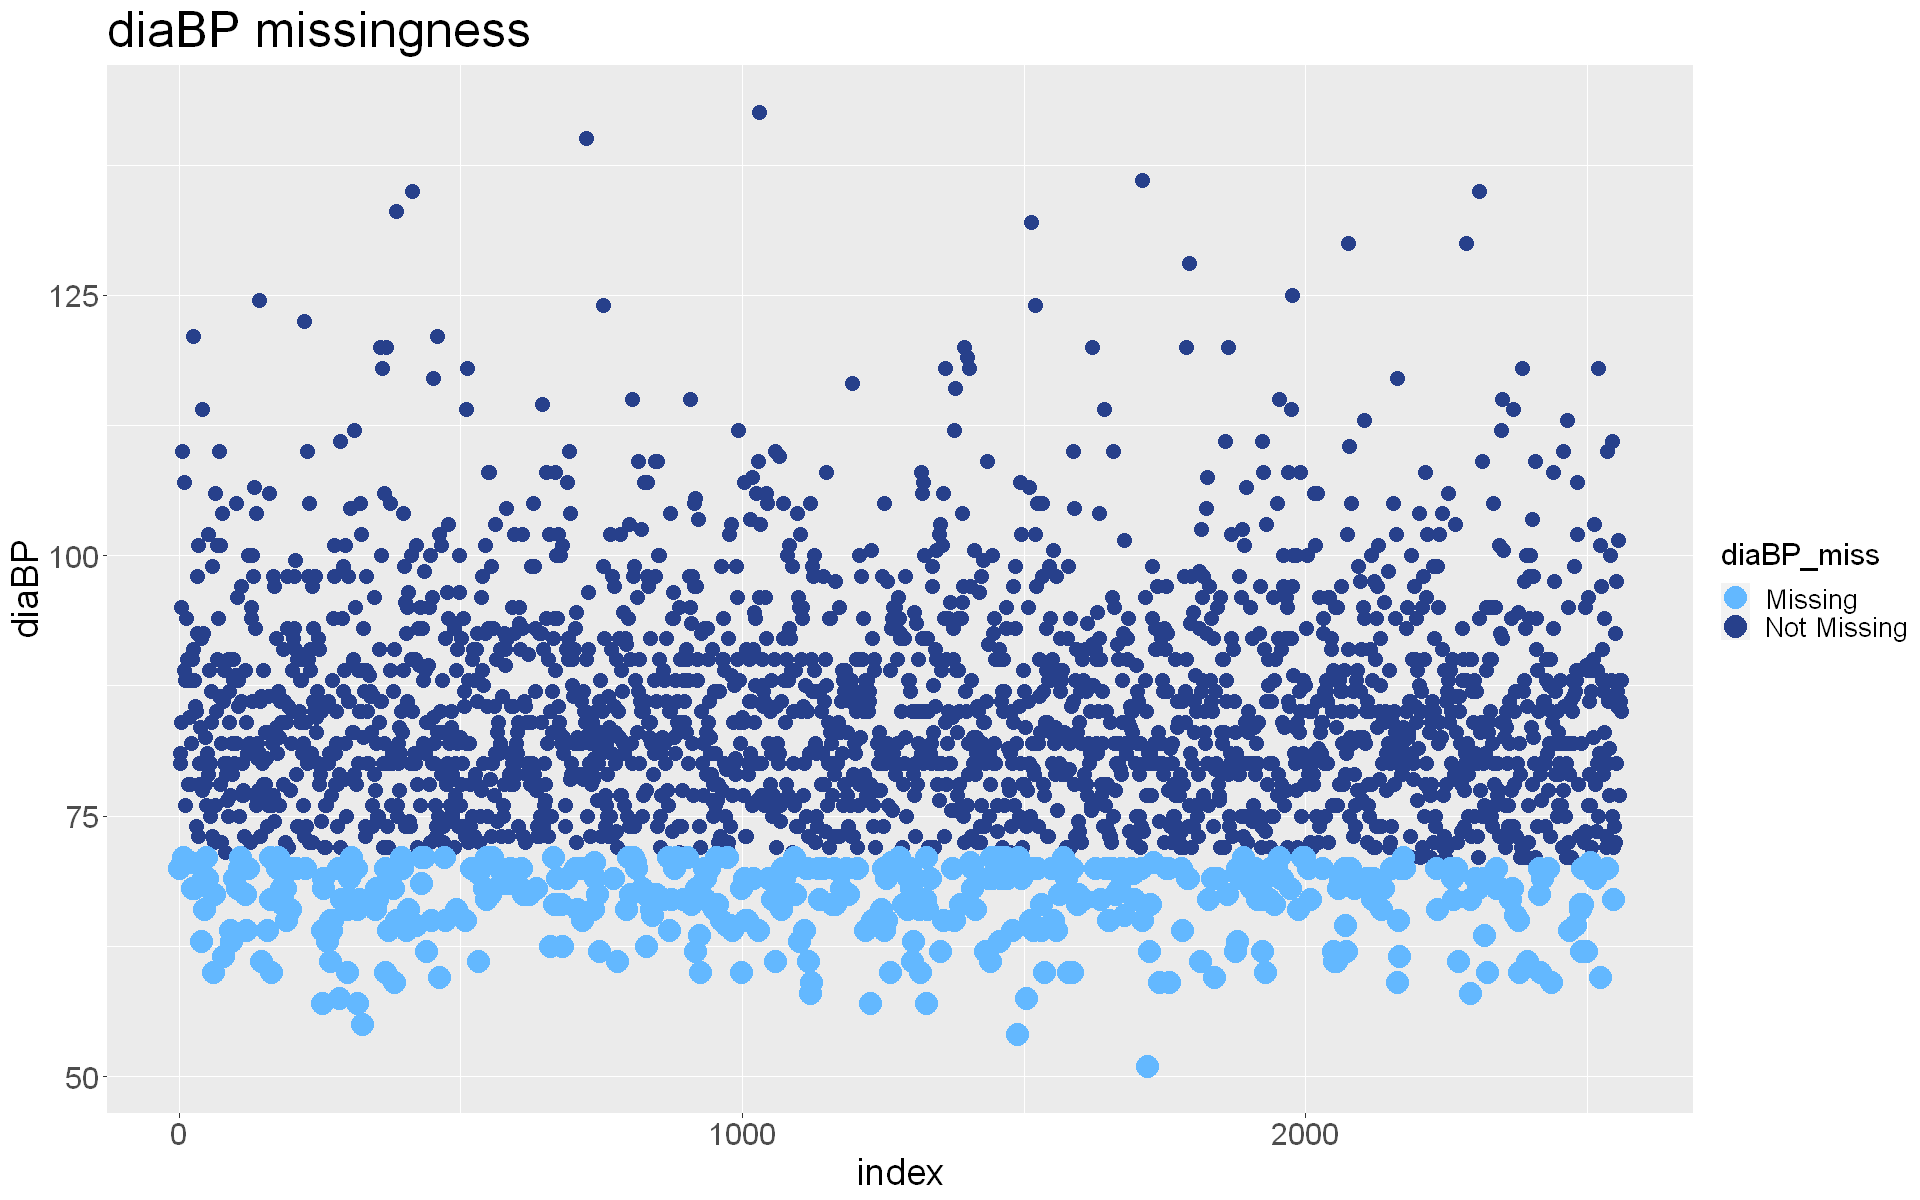

In [94]:
missPlotCont(fram, "diaBP_miss", "index", "diaBP", "diaBP missingness")

`summarise()` has grouped output by 'diabetes'. You can override using the
`.groups` argument.


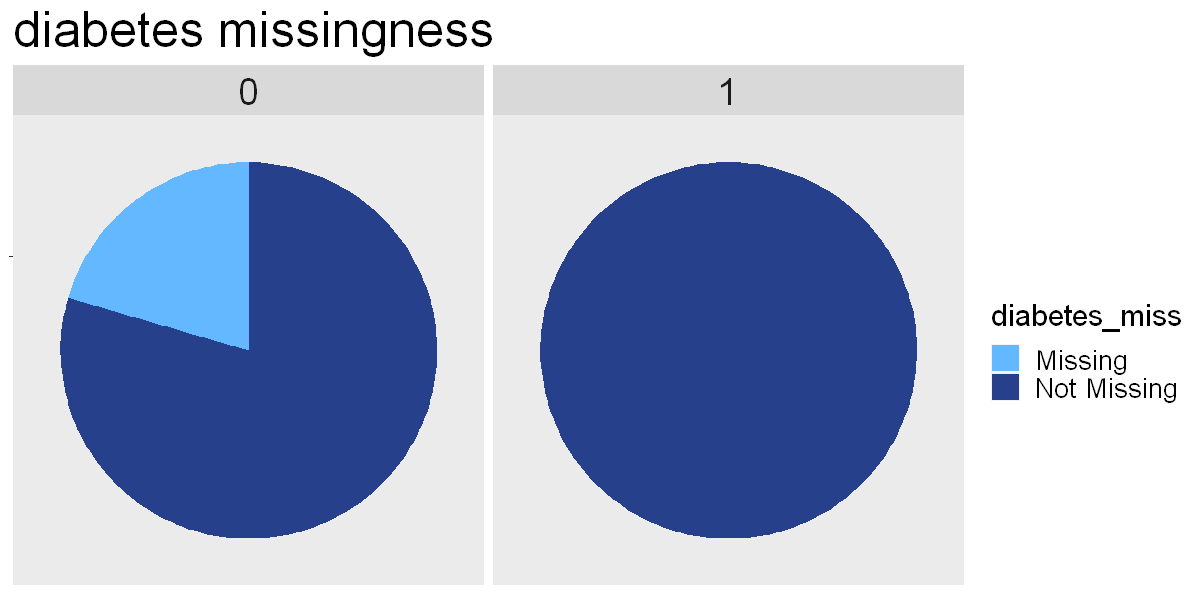

In [99]:
options(repr.plot.width = 10, repr.plot.height = 5)

diabetes_freq <- fram %>%
    group_by(diabetes, diabetes_miss) %>%
    summarize(count = n()) %>%
    mutate(freq = count/sum(count))

missPlotCat(diabetes_freq, "diabetes_miss", "freq", "diabetes", "diabetes missingness", 2)

`summarise()` has grouped output by 'currentSmoker'. You can override using the
`.groups` argument.


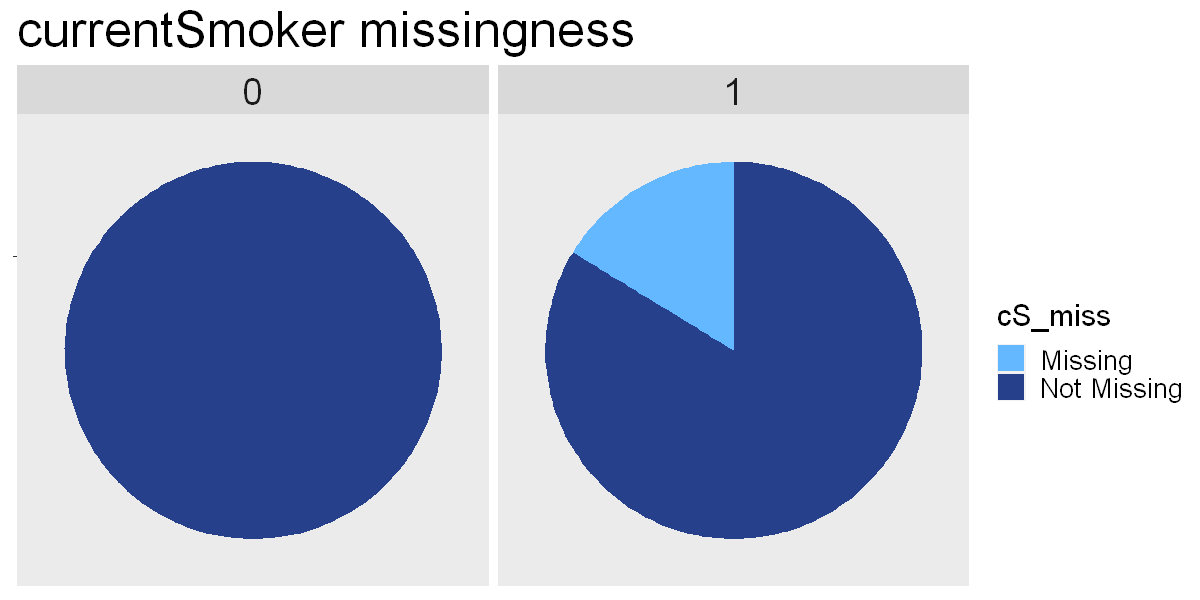

In [100]:
cS_freq <- fram %>%
    group_by(currentSmoker, cS_miss) %>%
    summarize(count = n()) %>%
    mutate(freq = count/sum(count))

missPlotCat(cS_freq, "cS_miss", "freq", "currentSmoker", "currentSmoker missingness", 2)

In [96]:
fram <- fram[, !(names(fram) %in% c("cS_miss", "diabetes_miss", "sysBP_miss", "diaBP_miss", "cPD_miss", "index"))]

#### MNAR 2

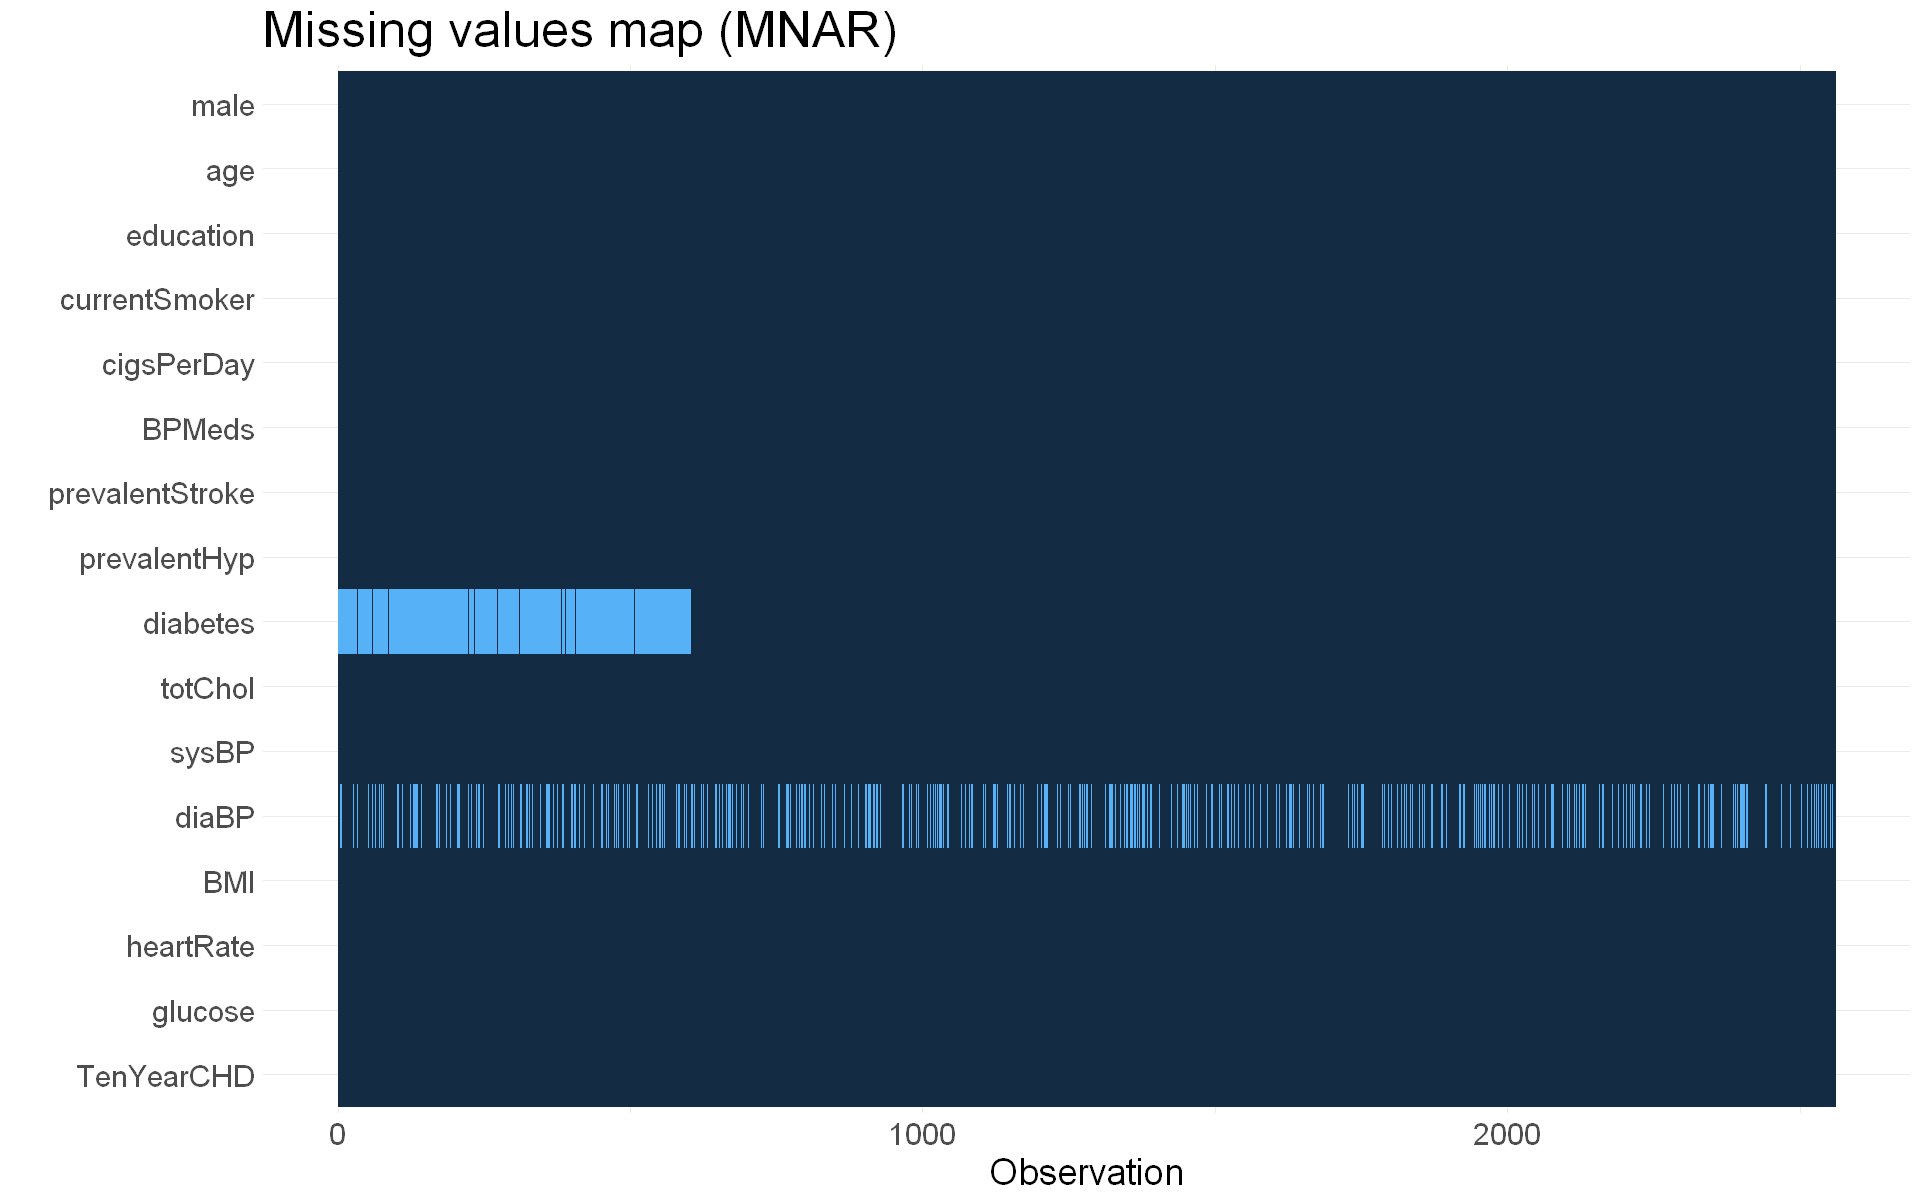

In [7]:
options(repr.plot.width = 16, repr.plot.height = 10)

mnar_plot2 <- fram_mnar2 %>% missing_plot()

mnar_plot2 <- mnar_plot2 +
    theme(
        plot.title = element_text(size = 30),         
        axis.title = element_text(size = 22),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18)) +
    labs(title = "Missing values map (MNAR)")
 
mnar_plot2

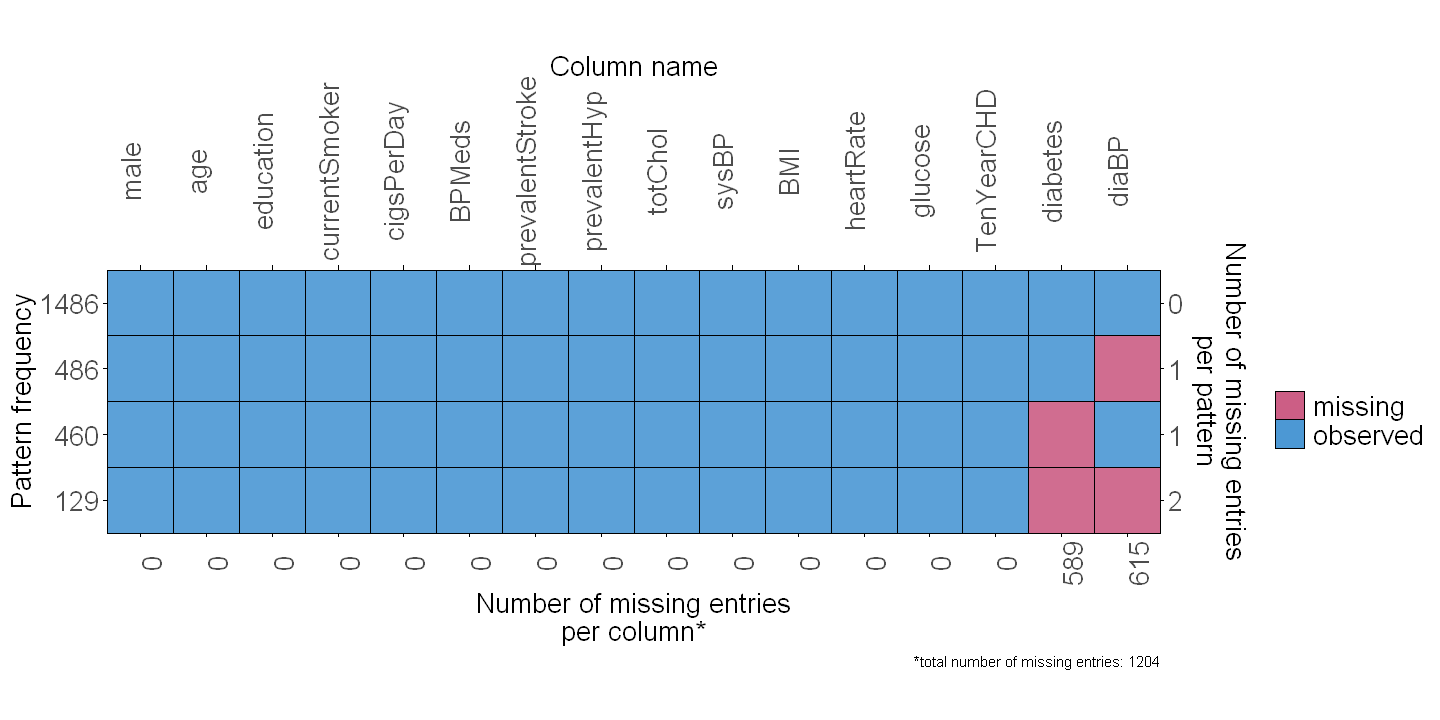

In [37]:
options(repr.plot.width = 12, repr.plot.height = 6)
plot_pattern(fram_mnar2, rotate = TRUE) +
        theme(
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 16),         
        axis.text.x = element_text(size = 16),        
        axis.text.y = element_text(size = 16),
        legend.text = element_text(size = 16),        
        legend.title = element_text(size = 16),
        legend.position = "right"
        )

In [11]:
fram$diabp_miss <- ifelse(is.na(fram_mnar2$diaBP), "Missing", "Not Missing")
fram$diabetes_miss <- ifelse(is.na(fram_mnar2$diabetes), "Missing", "Not Missing")
fram$index <- as.numeric(row.names(fram))

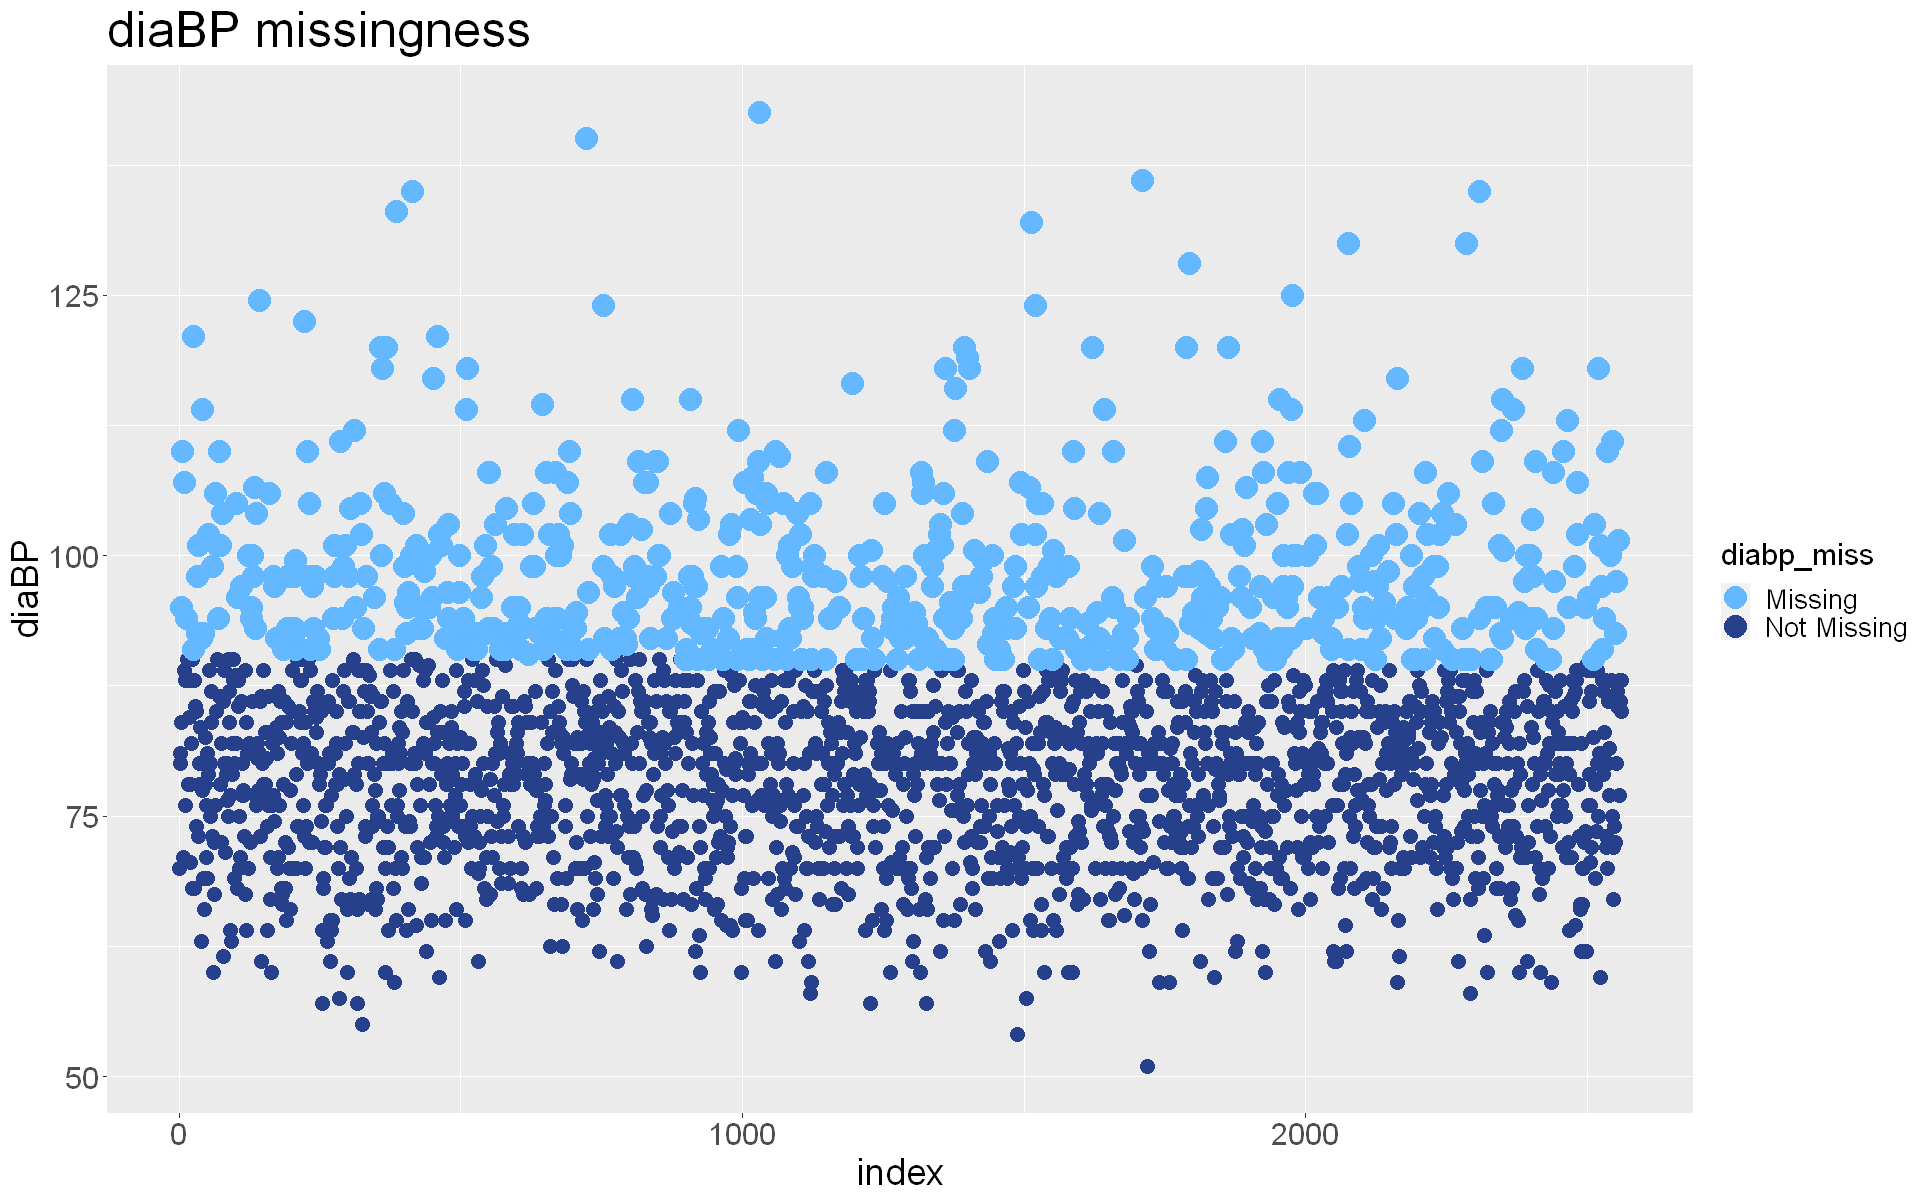

In [16]:
options(repr.plot.width = 16, repr.plot.height = 10)
missPlotCont(fram, "diabp_miss", "index", "diaBP", "diaBP missingness")

`summarise()` has grouped output by 'diabetes'. You can override using the
`.groups` argument.


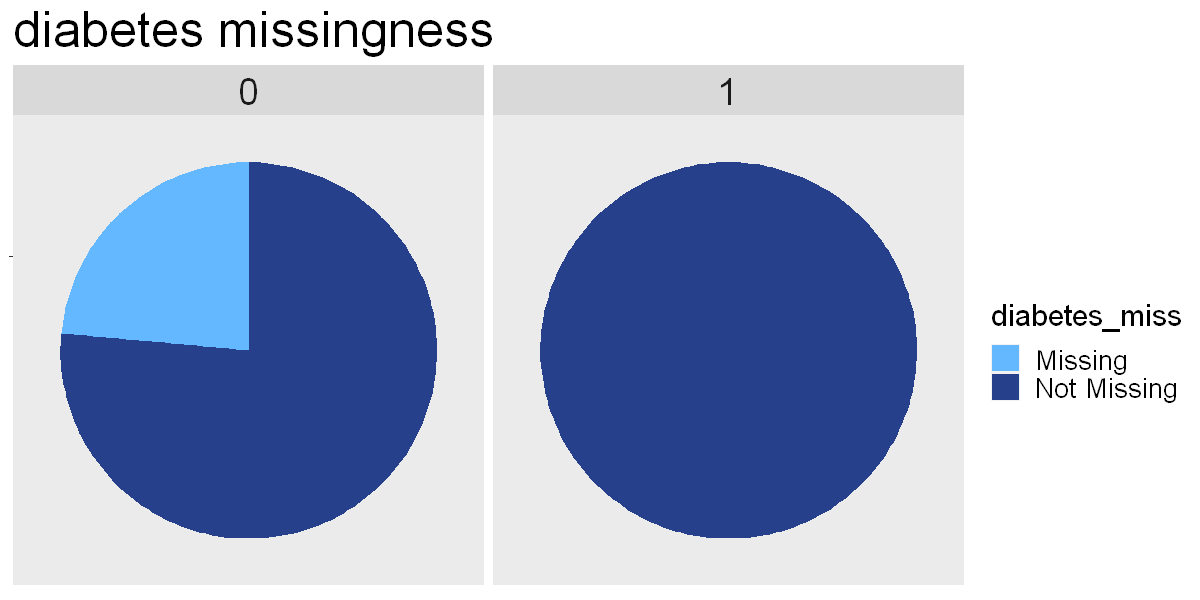

In [17]:
options(repr.plot.width = 10, repr.plot.height = 5)

diabetes_freq <- fram %>%
    group_by(diabetes, diabetes_miss) %>%
    summarize(count = n()) %>%
    mutate(freq = count/sum(count))

missPlotCat(diabetes_freq, "diabetes_miss", "freq", "diabetes", "diabetes missingness",2)

In [18]:
fram <- fram[, !(names(fram) %in% c("diabetes_miss", "cPD_miss", "index"))]